In [43]:
import tensorflow as tf
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
import os

# Aim
1. load the files
2. Make them equal length say 3 seconds or 2 seconds
3. Padding or trimming the audio
4. Extract the MFCCs and mel spectrogrogrms
5. Train the NN on them and also extract the features for DNN for the Feature.csv file

In [28]:
DIR_PATH = "../../Dataset/Audio/"
def make_same_length(file):
    AUDIO_LENGTH = 110553 # no of samples
    signal, sample_rate = librosa.load(os.path.join(file))
    # find the mean length and then apply that length to all the files - 110553. which is 5 second audio
    signal = tf.convert_to_tensor(signal)
    if len(signal) < 110553:
        # print([AUDIO_LENGTH] - tf.shape(signal))
        padded_zeros = tf.zeros([AUDIO_LENGTH] - tf.shape(signal), dtype=tf.float32)
        # signal = tf.cast(signal, tf.float32)
        # print(padded_zeros)
        signal = tf.concat([signal, padded_zeros], 0)
    else:
        signal = signal[:AUDIO_LENGTH]

    # print(signal)
    #         print(len(signal))
    signal = signal.numpy()
    # print(np.array(lengths).mean())
    return signal, sample_rate

In [48]:
# MFCC
def get_mfccs(signal_data, sample_rate):
    mfcc13 = librosa.feature.mfcc(signal_data, sample_rate,n_mfcc=13)
    mfcc24 = librosa.feature.mfcc(signal_data, sample_rate,n_mfcc=24)
    mfcc48 = librosa.feature.mfcc(signal_data, sample_rate,n_mfcc=48)
    return (mfcc13, mfcc24,mfcc48)


def save_mfccs(mfccs):
    mfcc13, mfcc24, mfcc48 = mfccs
    librosa.display.specshow(mfcc13, y_axis='log', x_axis='time')
    plt.axis("off")
    plt.show()

In [53]:
def get_mel_spectrograms(signal_data):
    cmap = plt.get_cmap()
    mel_spec = librosa.feature.melspectrogram(signal_data)
    librosa.display.specshow(mel_spec, x_axis="time", y_axis="log", cmap=cmap)
    plt.show()

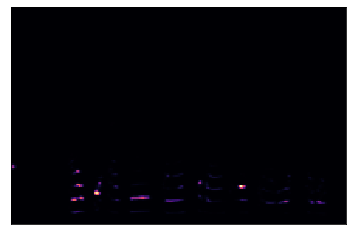

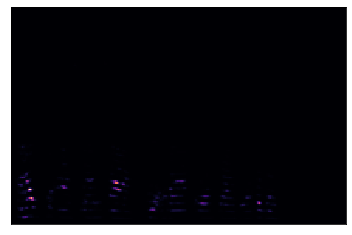

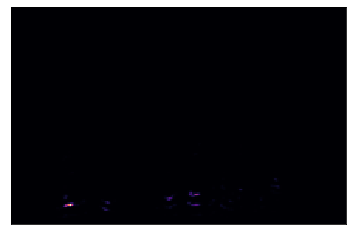

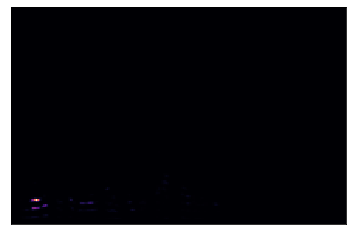

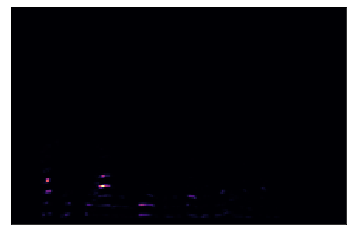

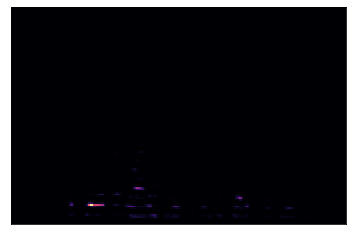

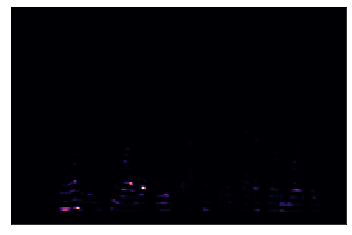

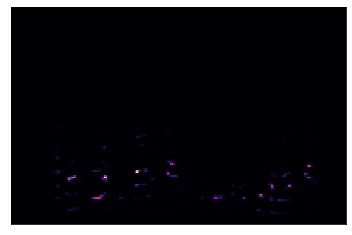

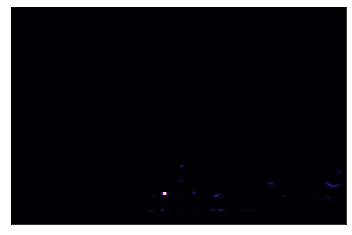

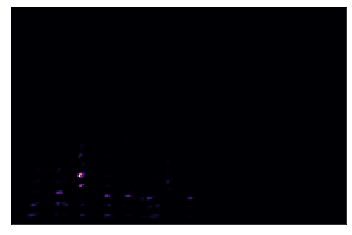

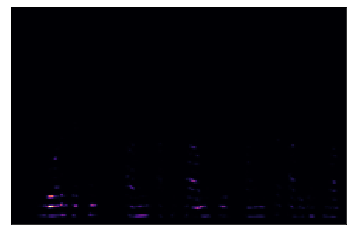

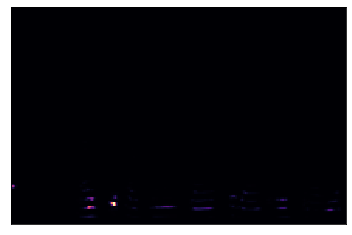

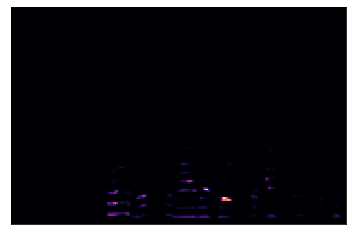

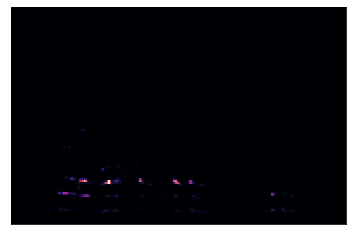

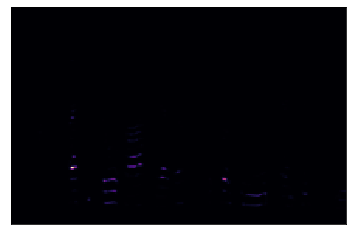

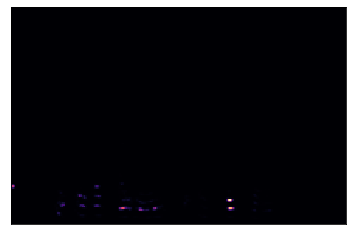

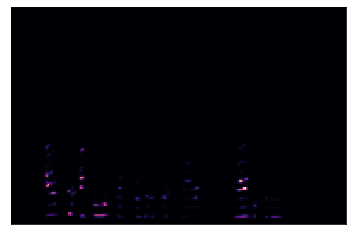

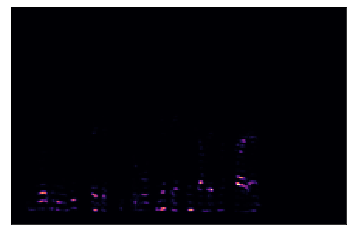

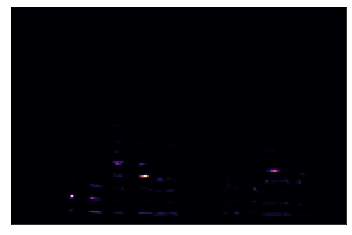

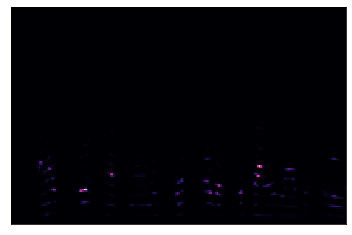

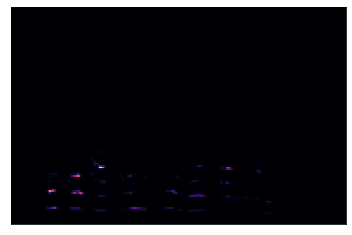

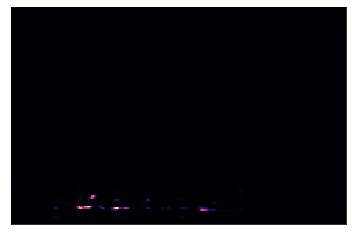

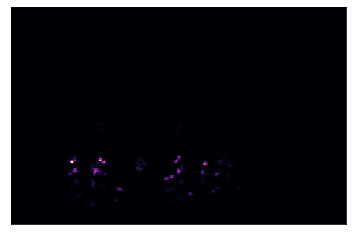

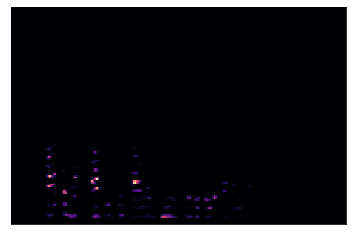

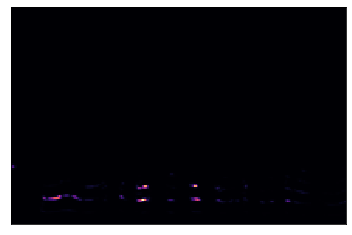

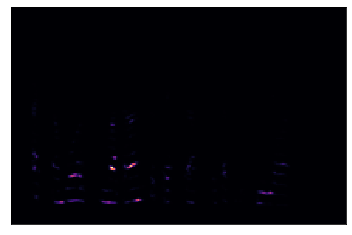

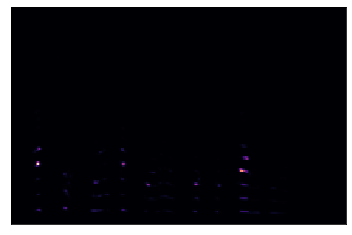

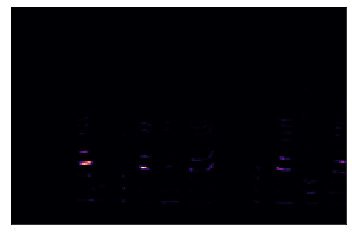

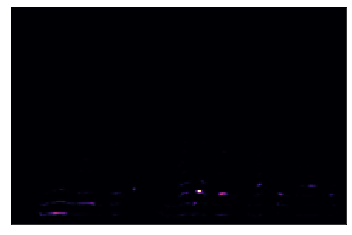

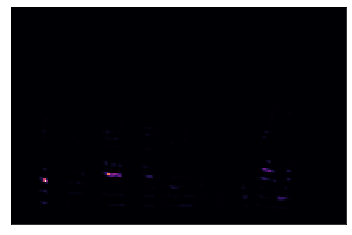

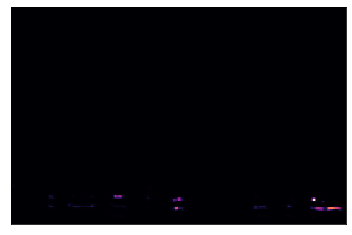

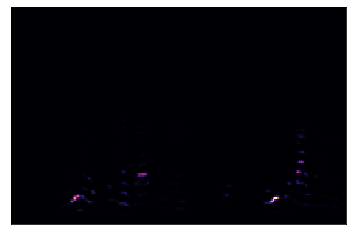

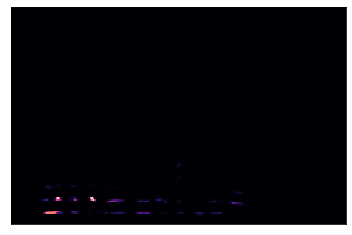

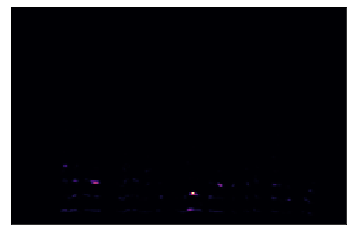

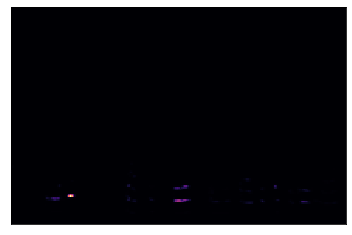

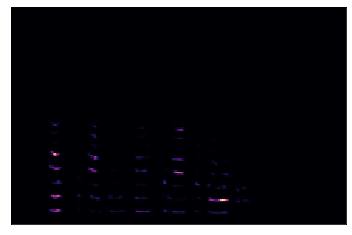

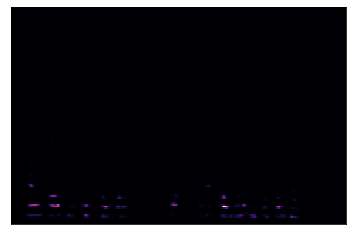

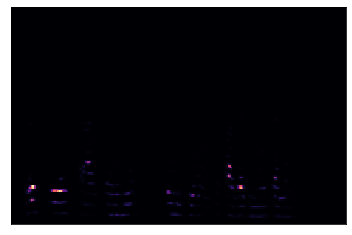

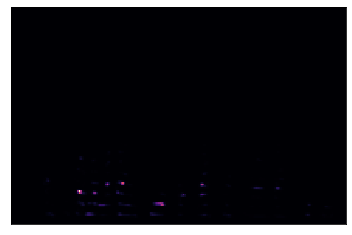

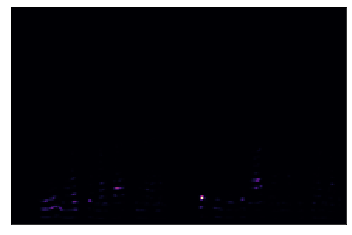

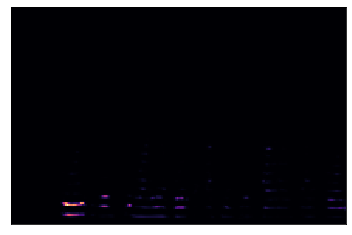

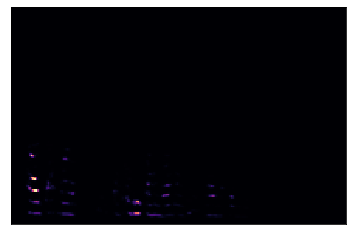

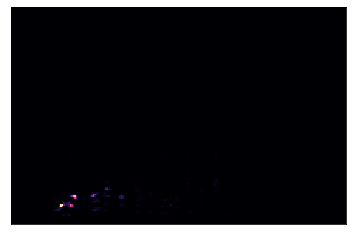

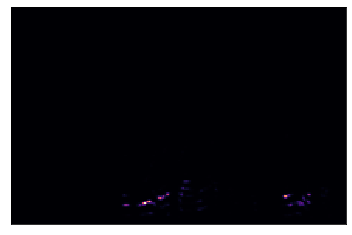

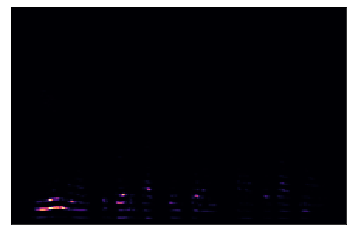

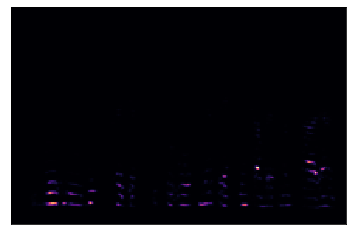

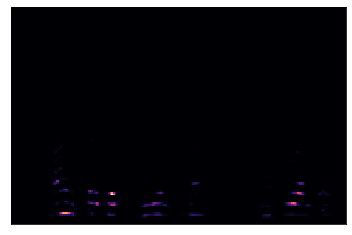

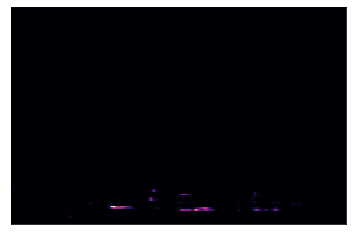

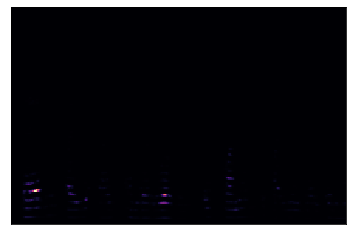

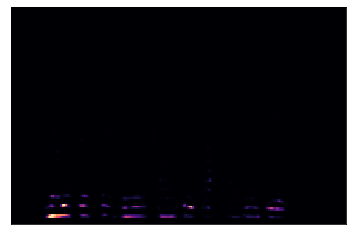

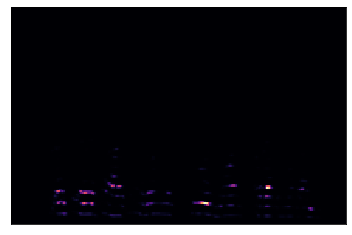

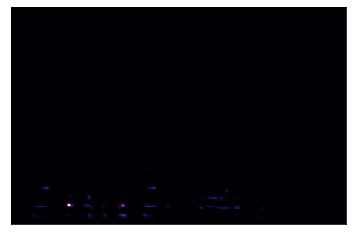

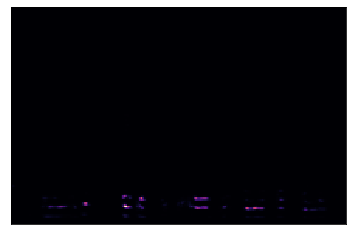

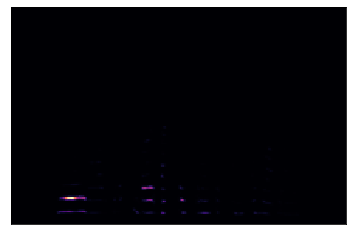

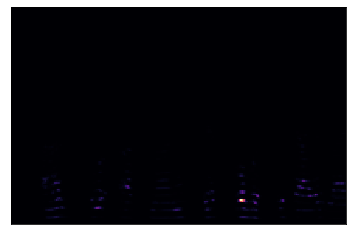

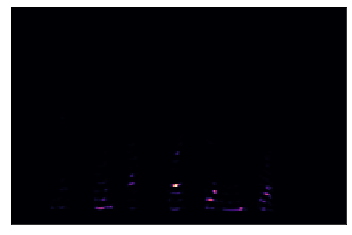

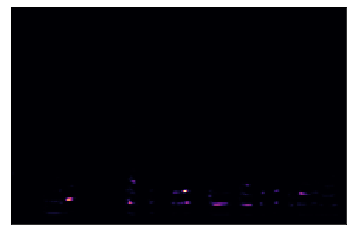

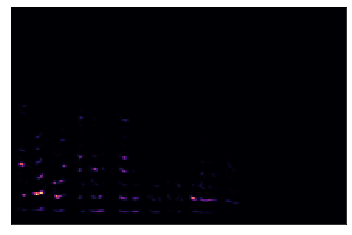

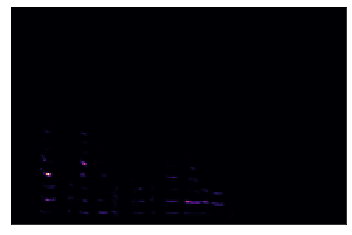

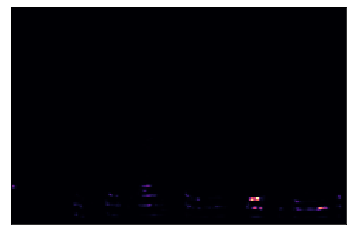

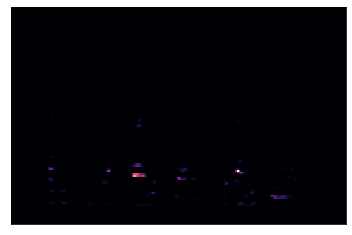

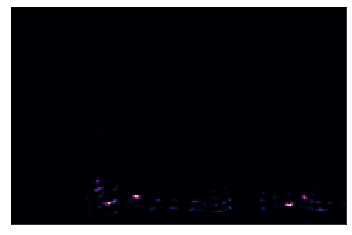

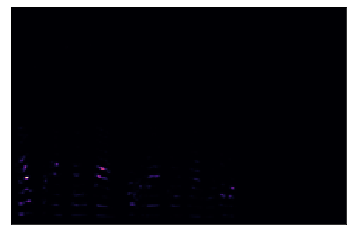

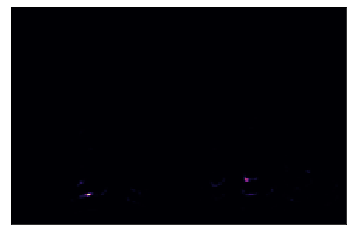

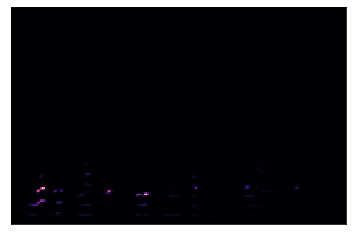

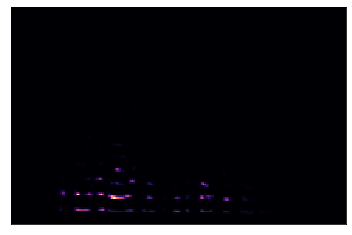

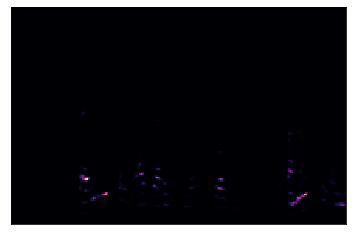

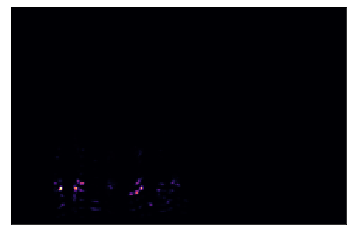

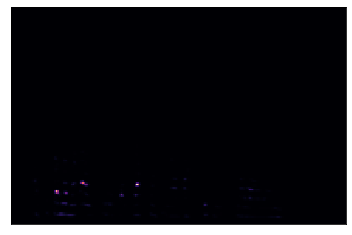

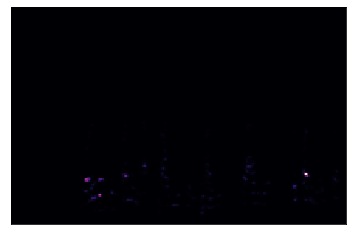

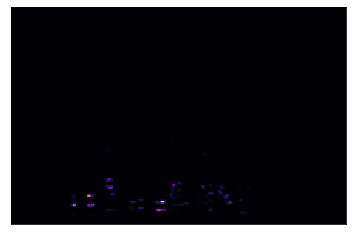

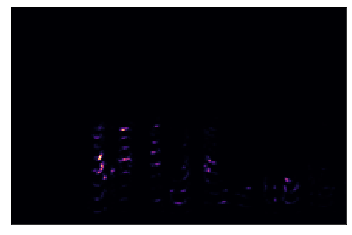

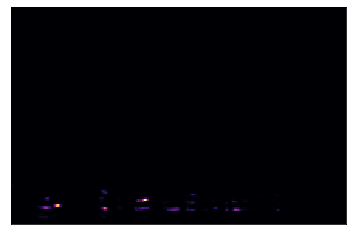

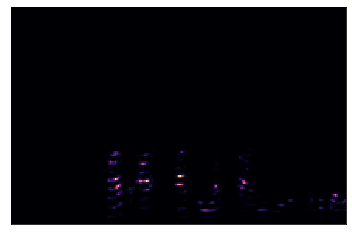

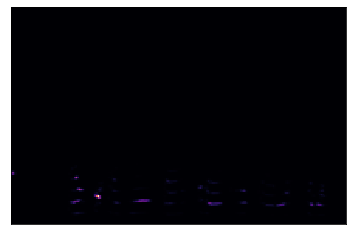

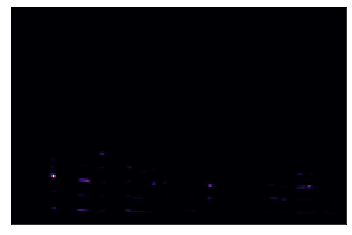

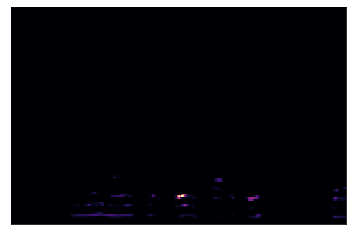

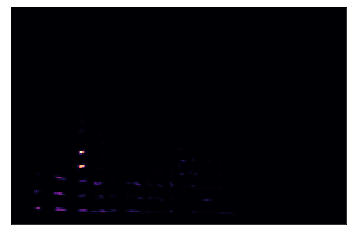

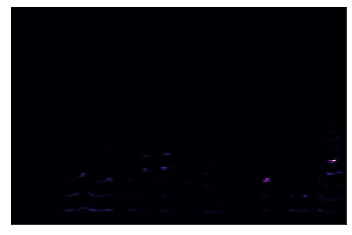

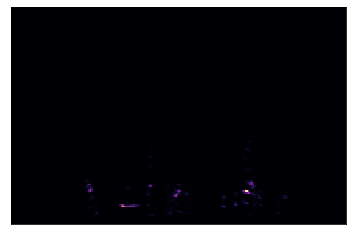

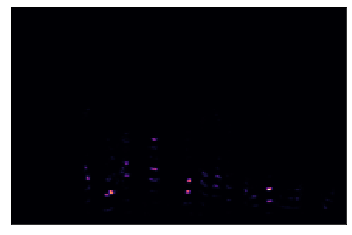

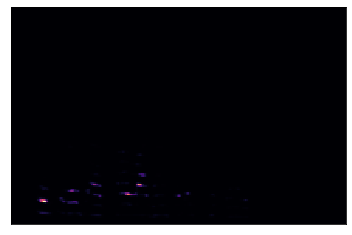

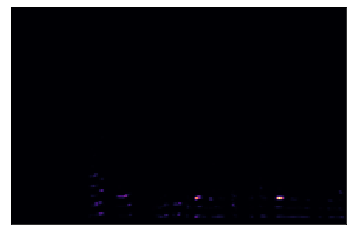

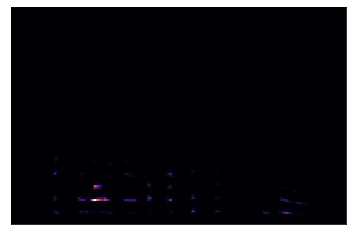

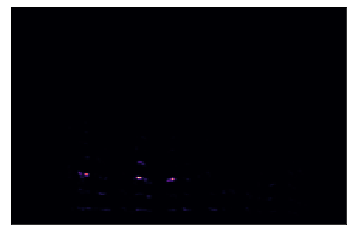

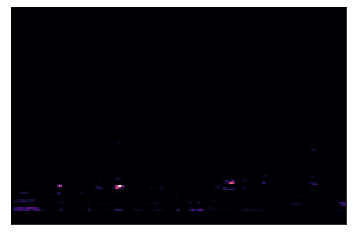

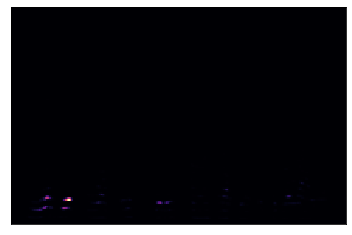

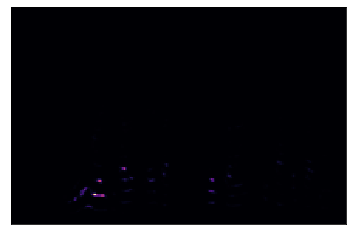

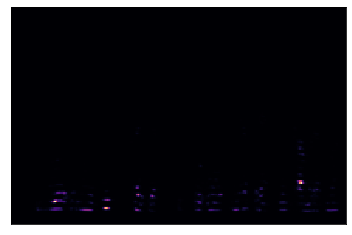

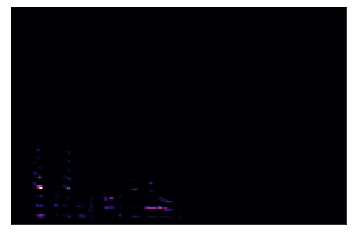

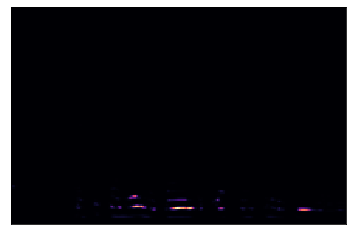

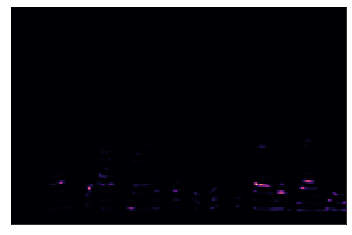

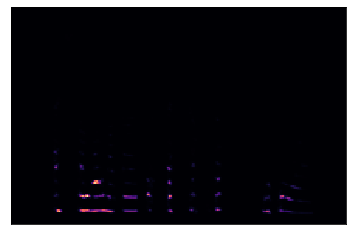

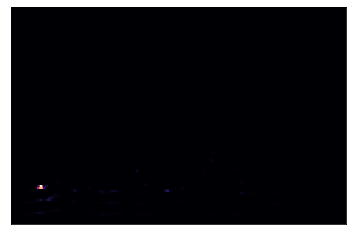

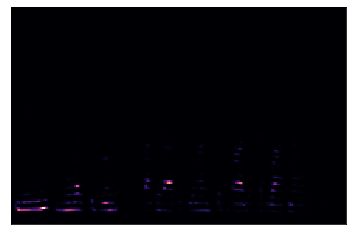

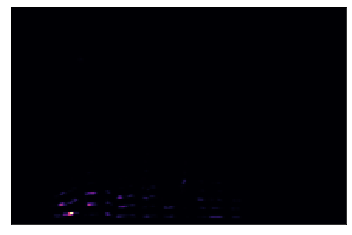

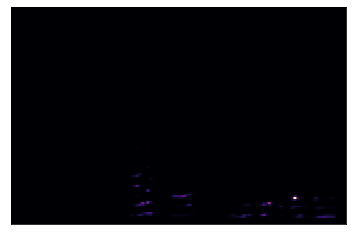

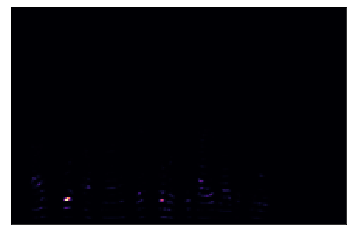

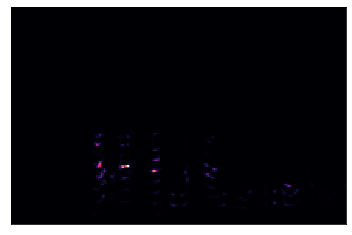

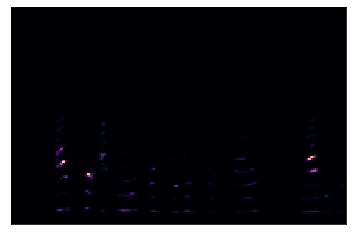

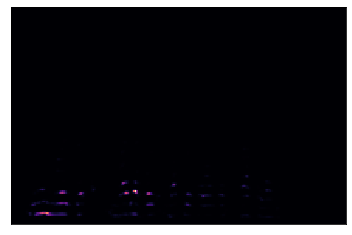

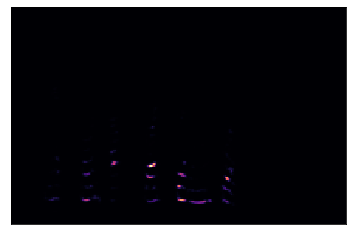

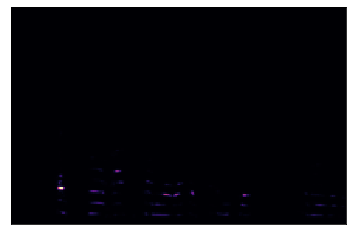

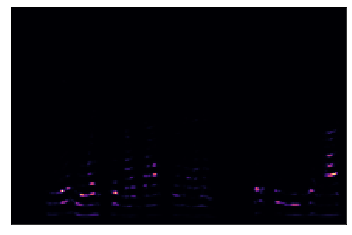

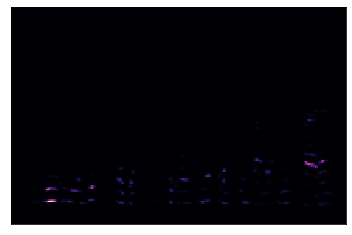

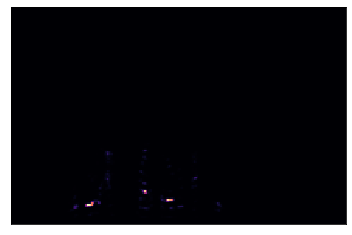

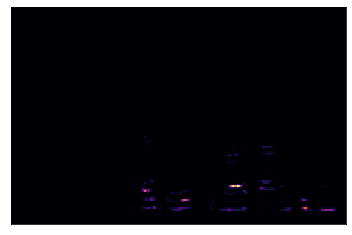

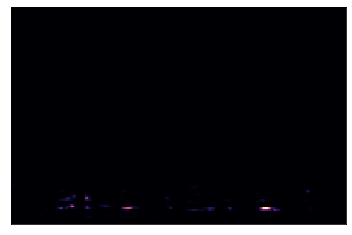

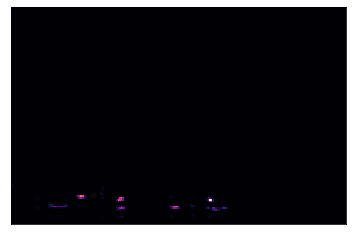

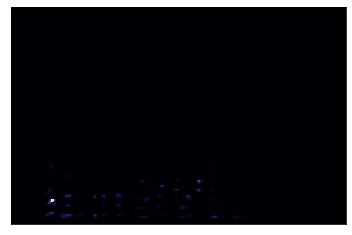

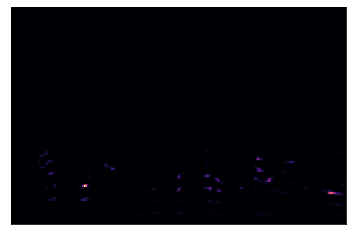

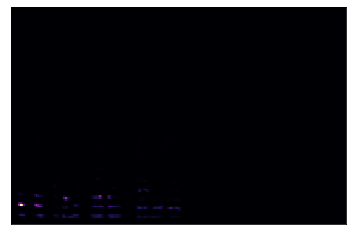

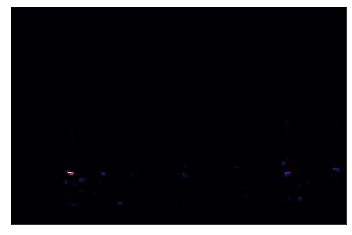

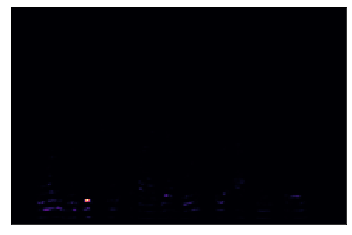

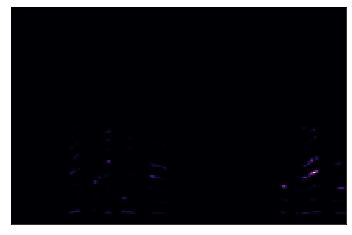

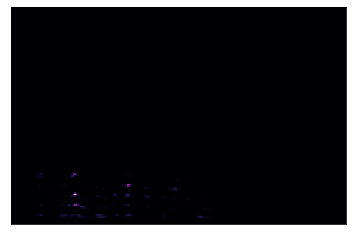

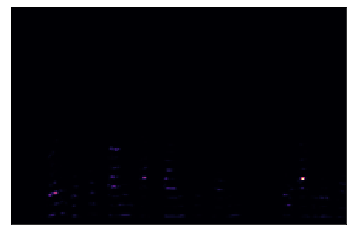

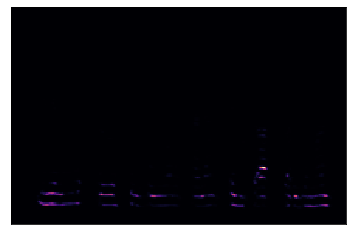

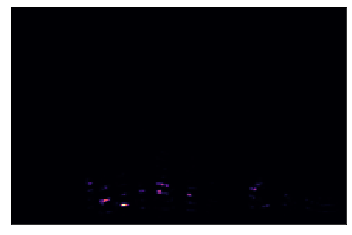

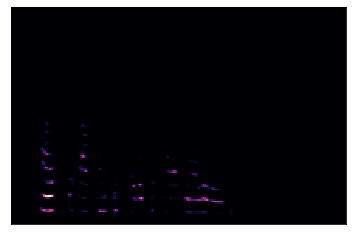

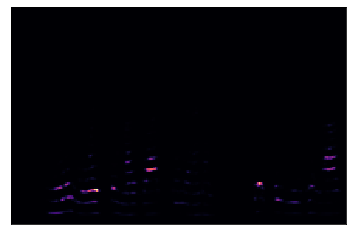

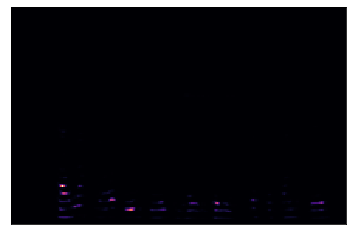

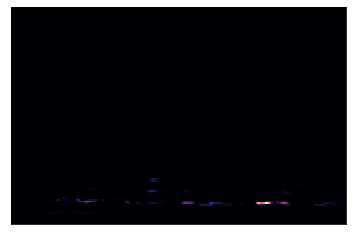

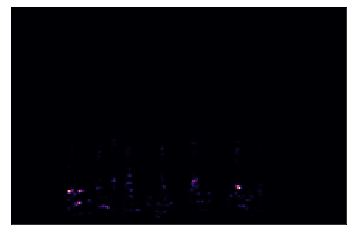

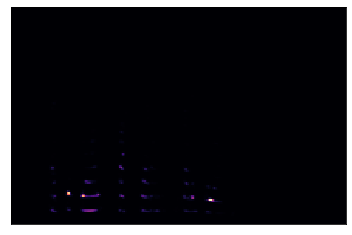

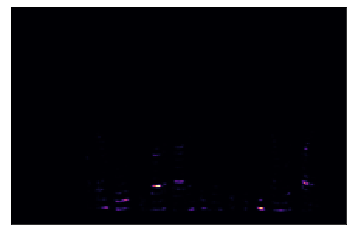

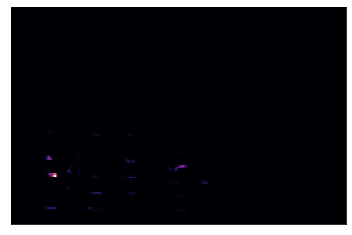

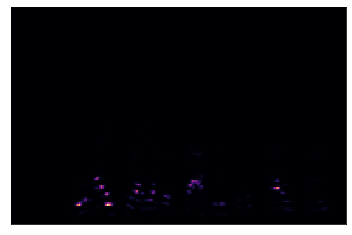

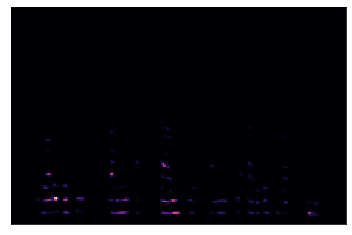

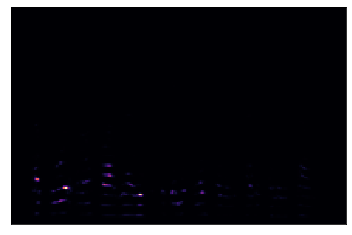

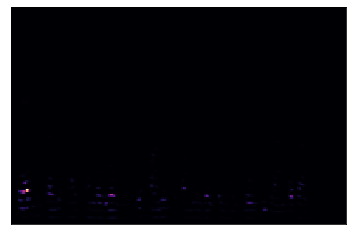

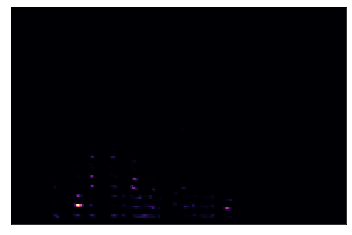

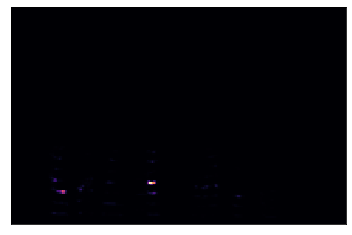

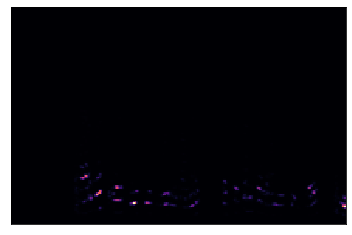

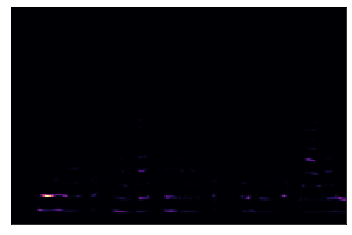

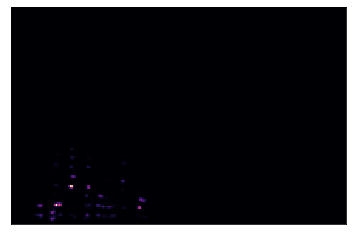

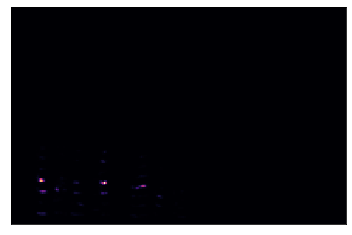

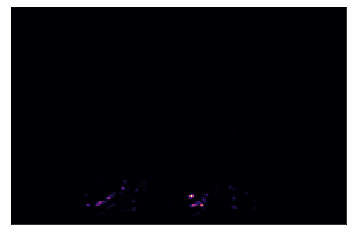

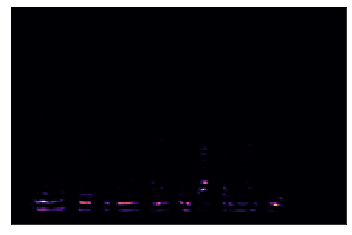

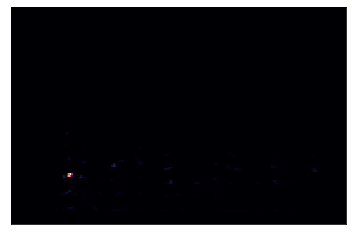

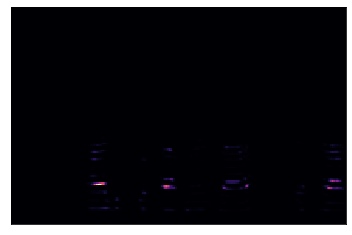

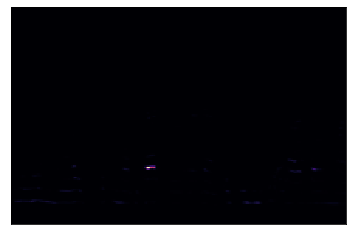

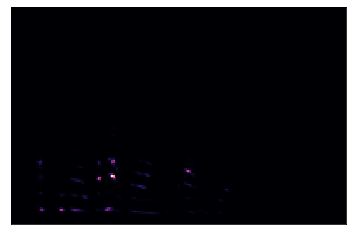

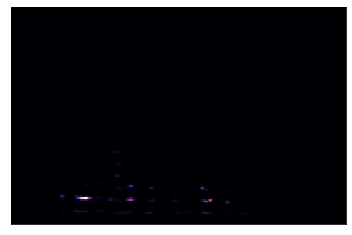

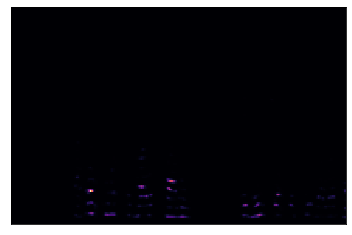

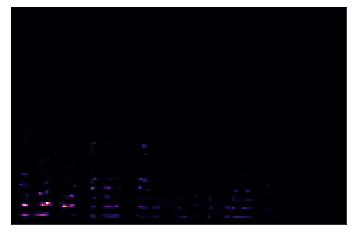

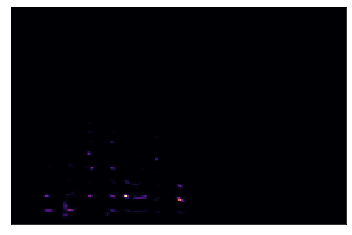

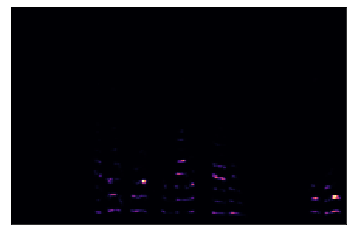

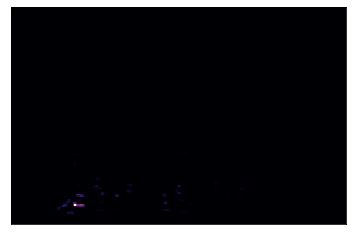

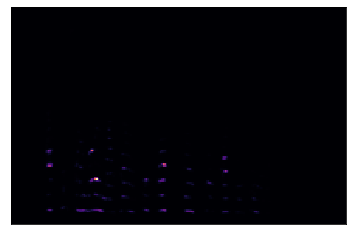

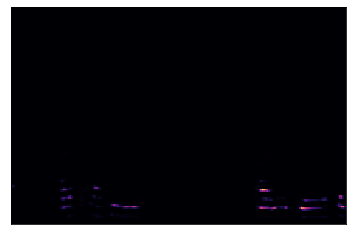

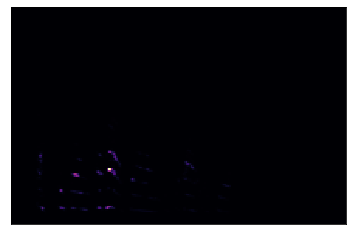

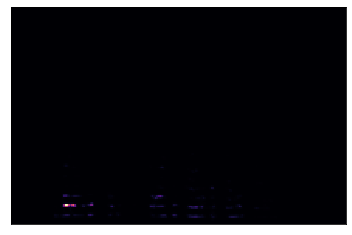

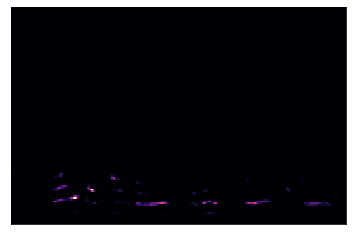

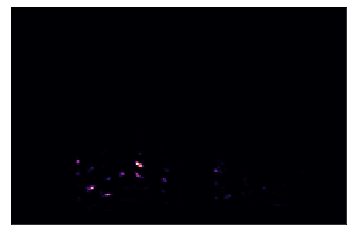

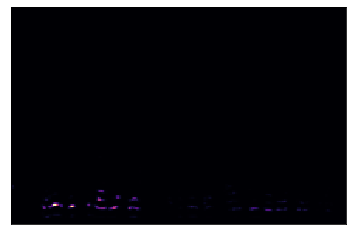

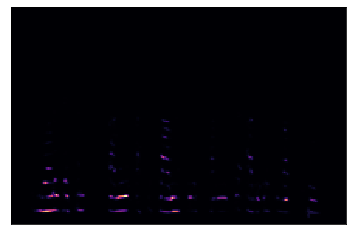

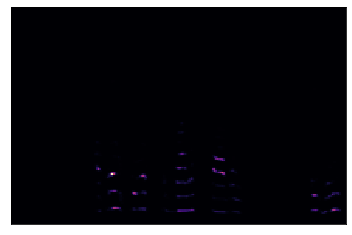

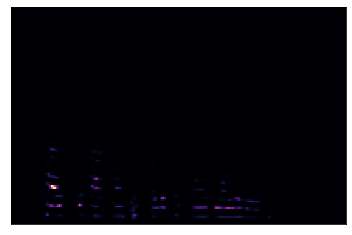

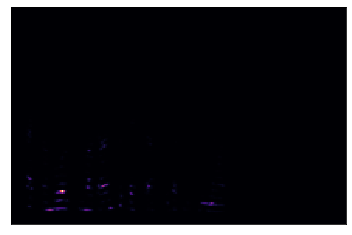

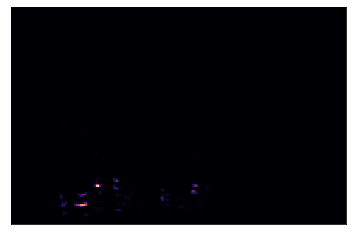

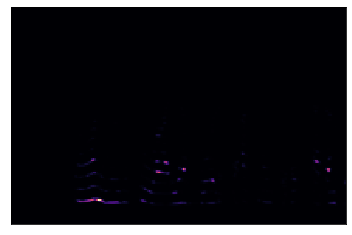

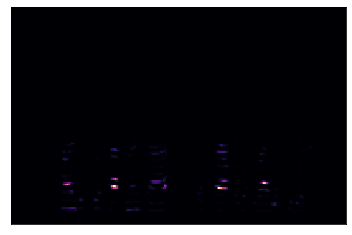

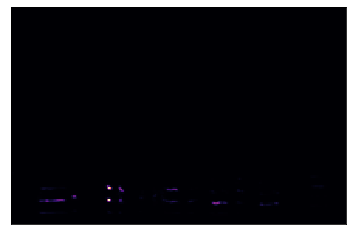

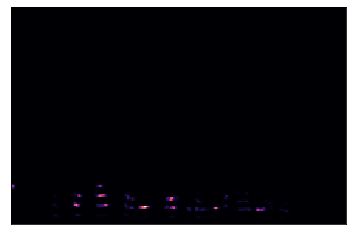

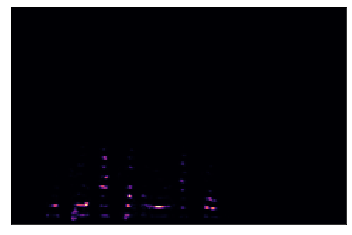

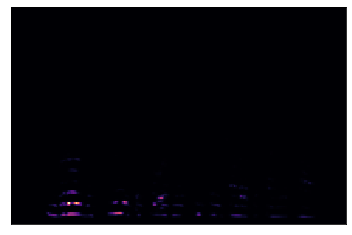

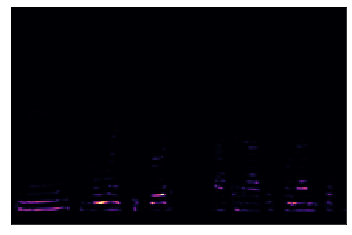

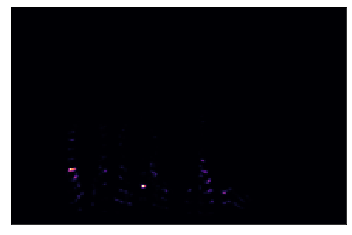

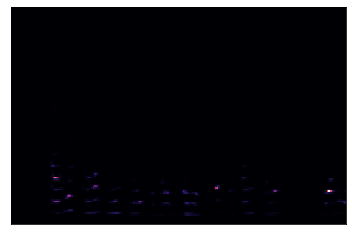

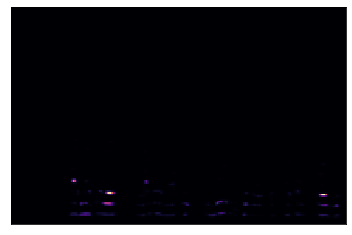

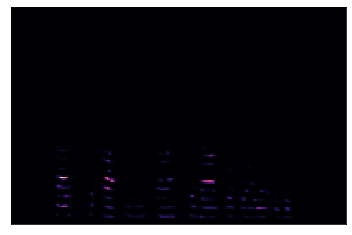

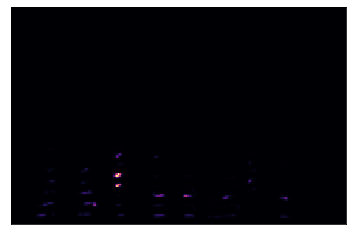

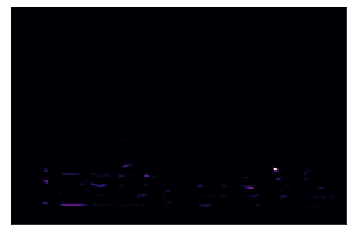

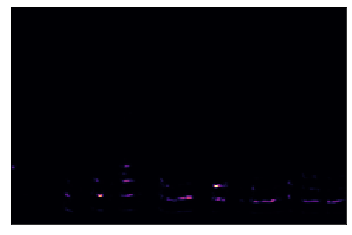

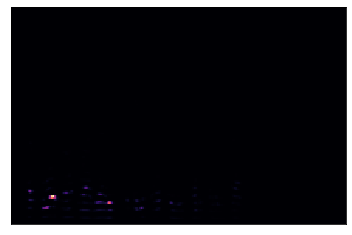

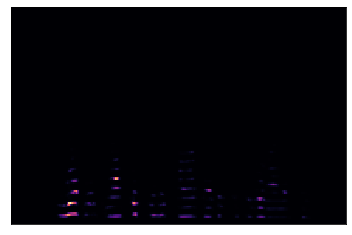

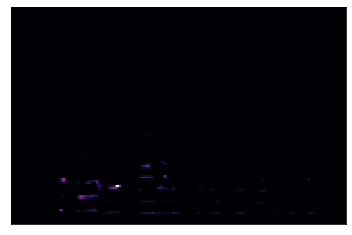

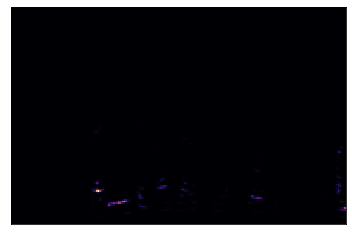

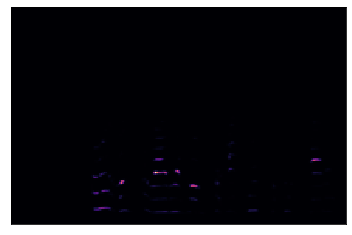

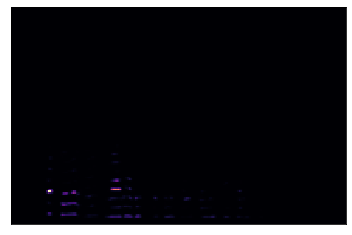

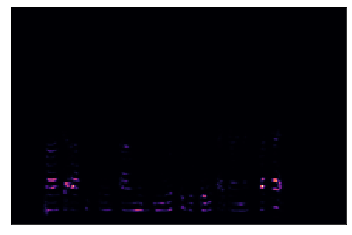

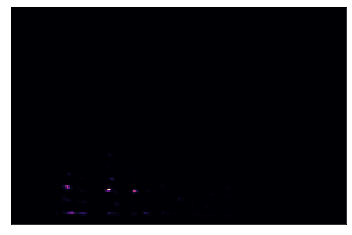

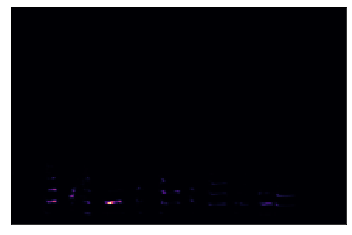

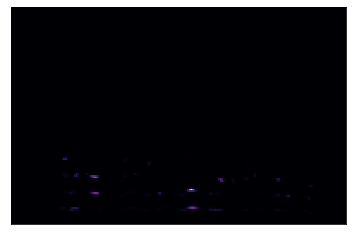

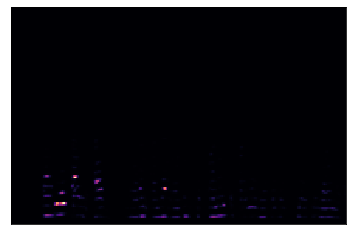

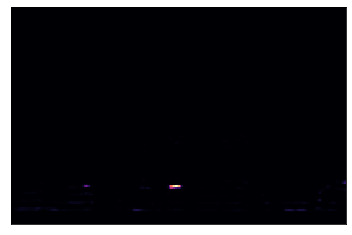

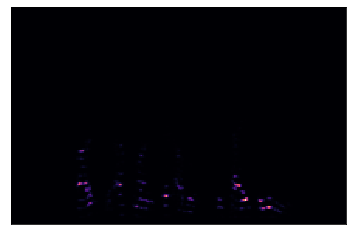

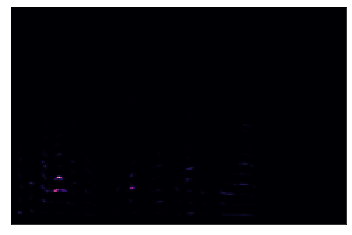

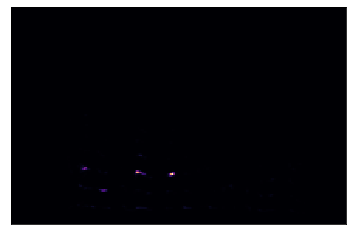

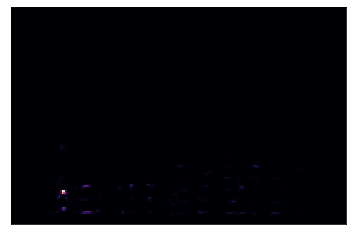

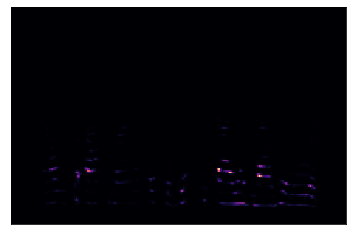

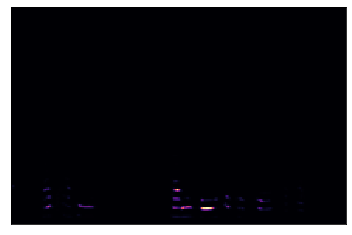

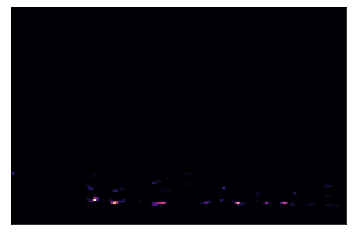

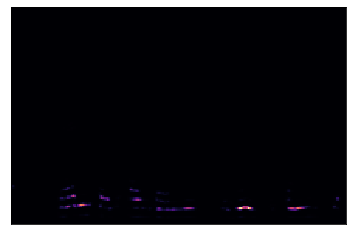

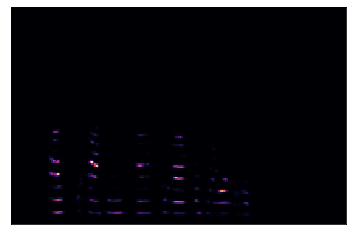

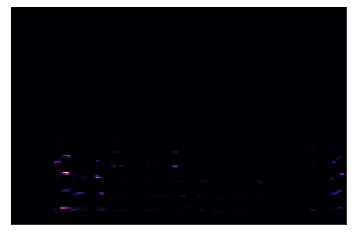

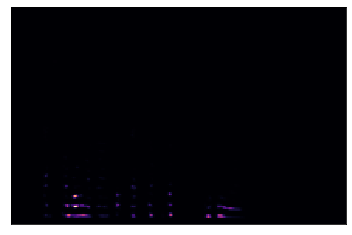

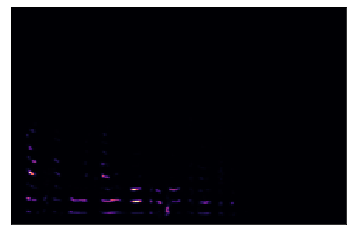

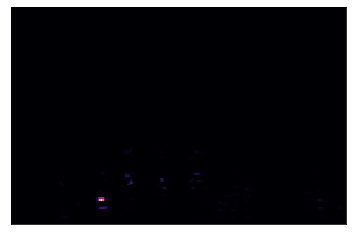

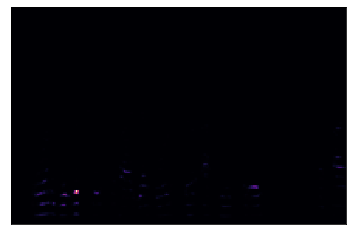

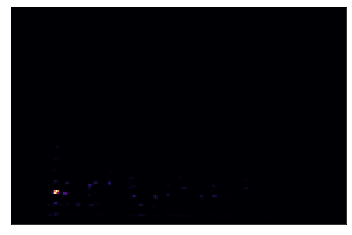

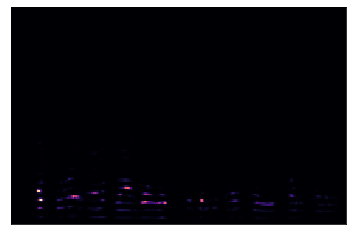

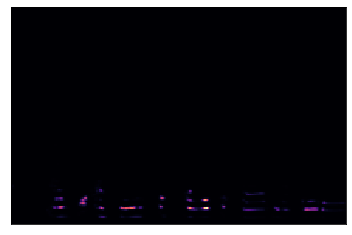

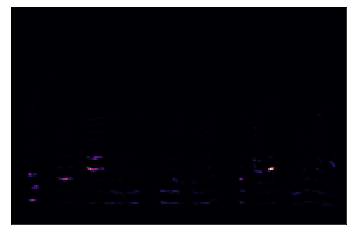

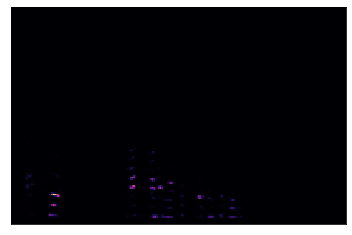

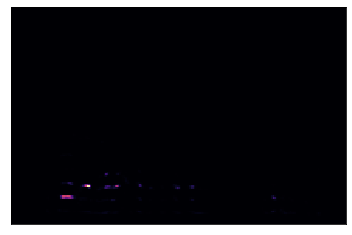

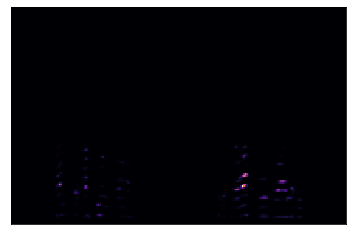

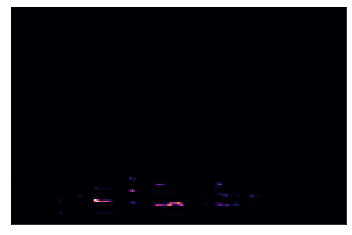

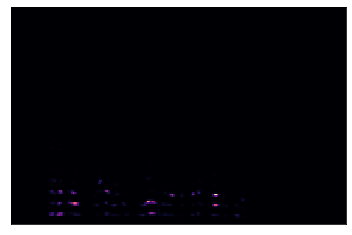

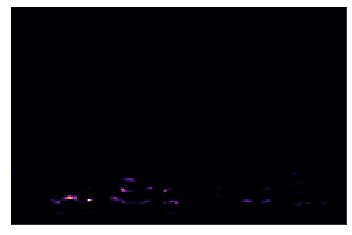

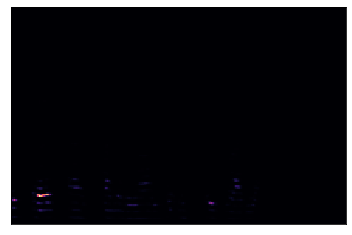

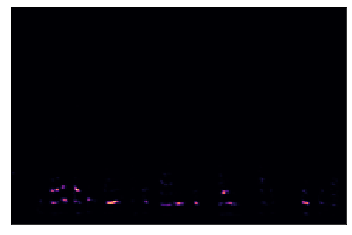

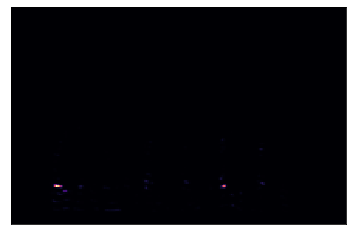

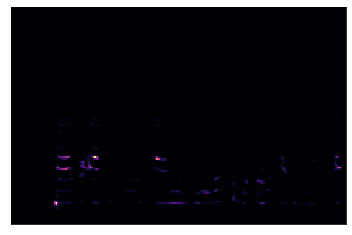

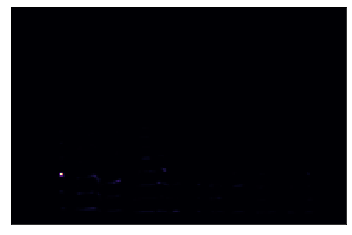

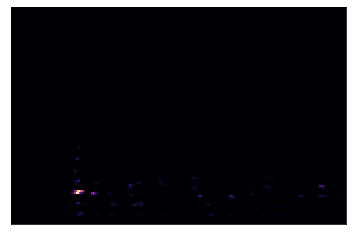

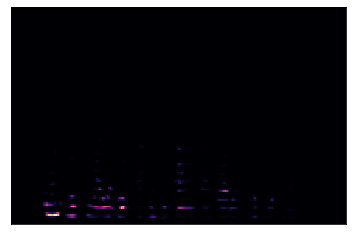

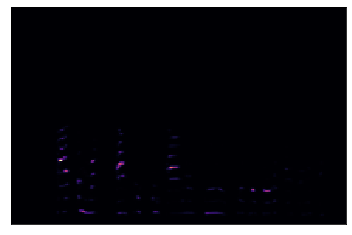

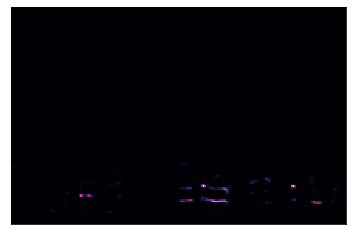

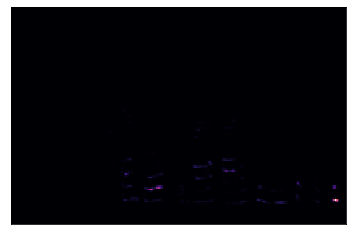

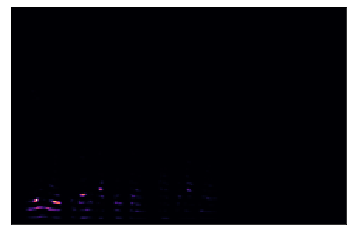

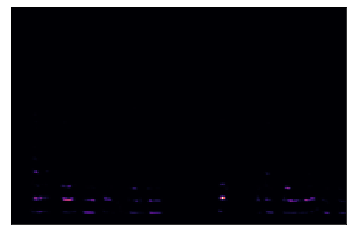

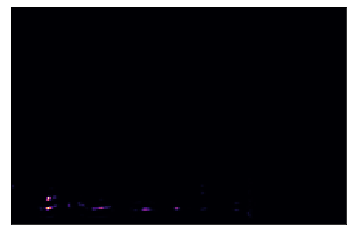

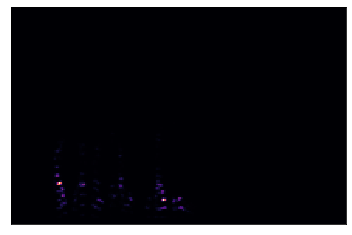

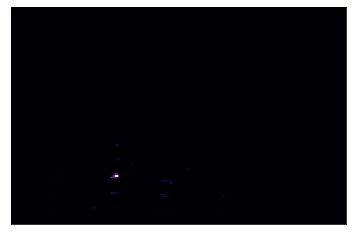

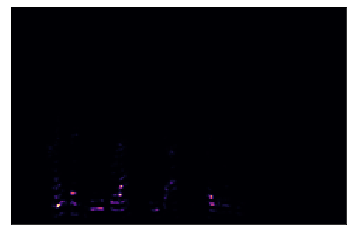

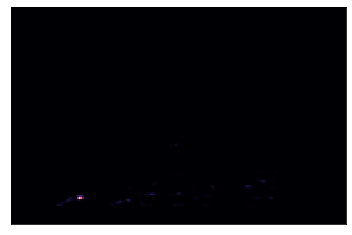

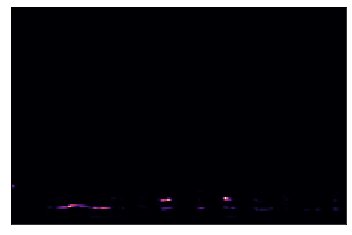

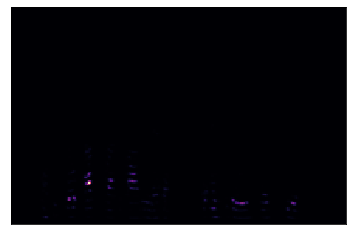

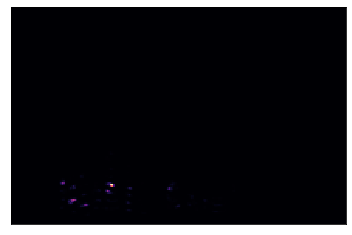

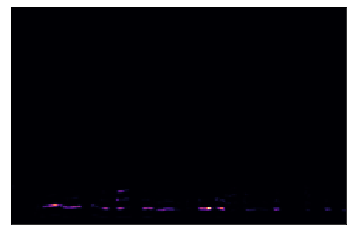

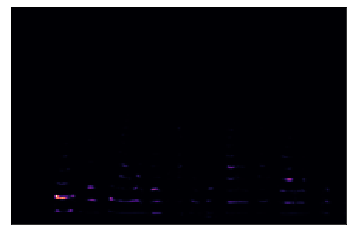

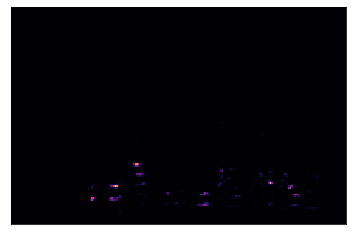

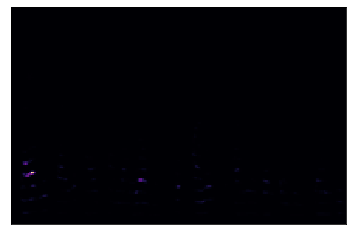

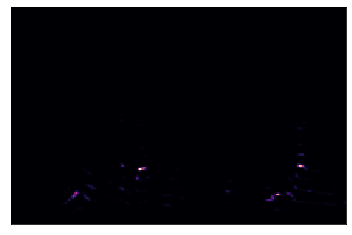

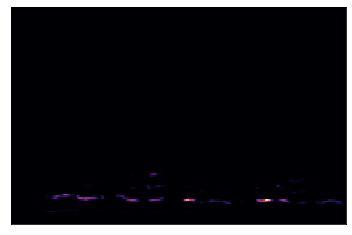

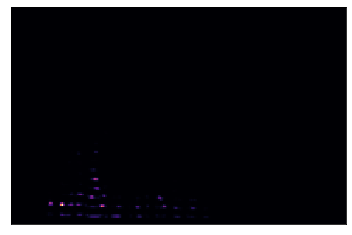

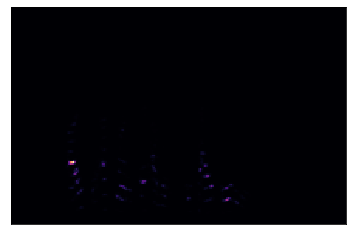

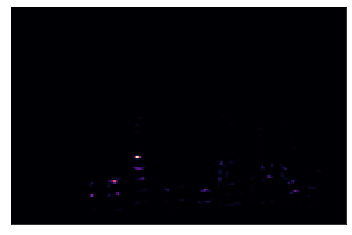

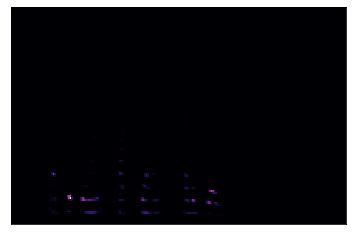

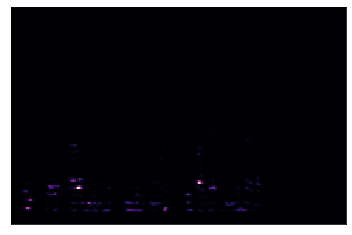

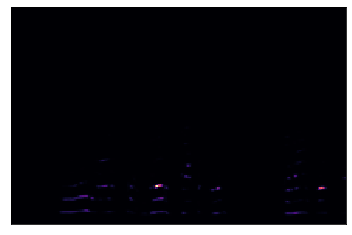

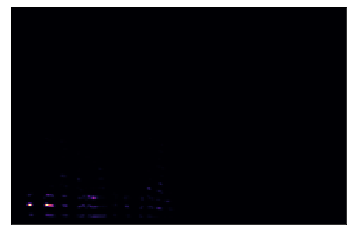

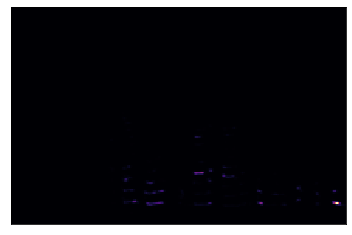

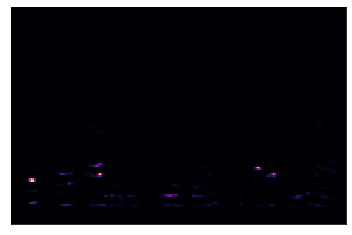

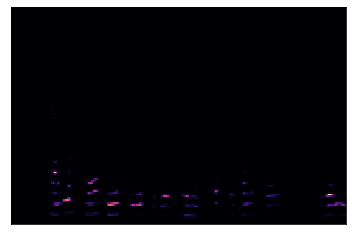

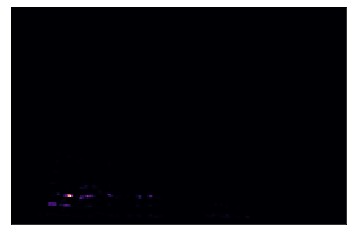

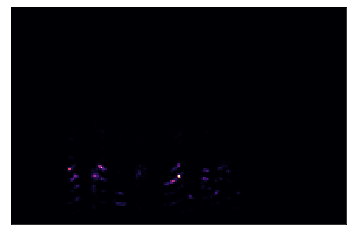

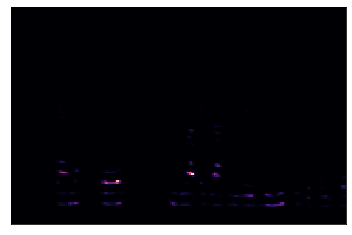

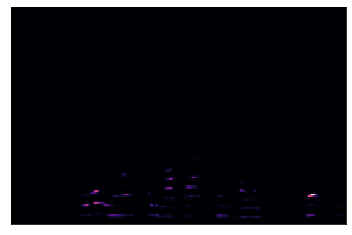

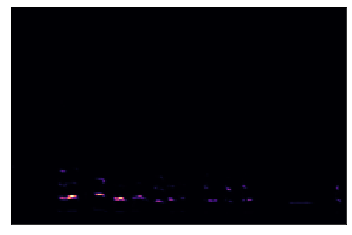

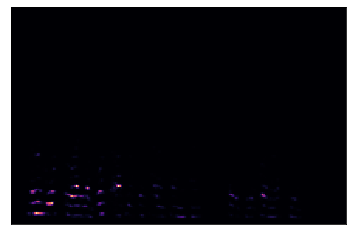

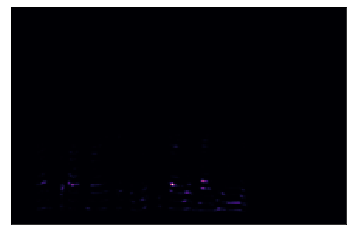

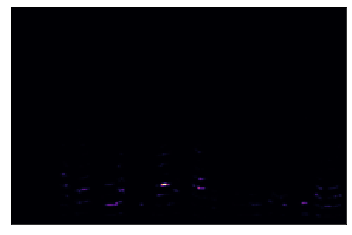

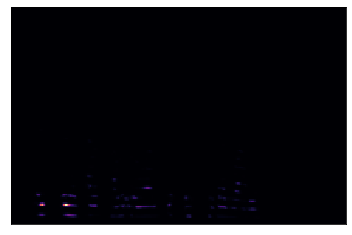

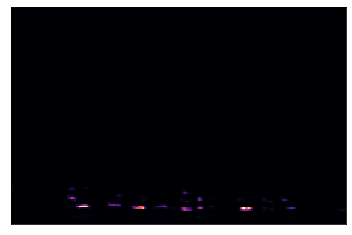

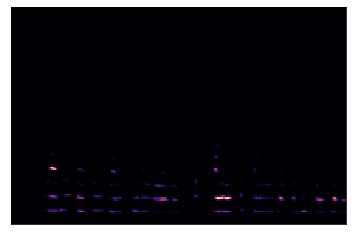

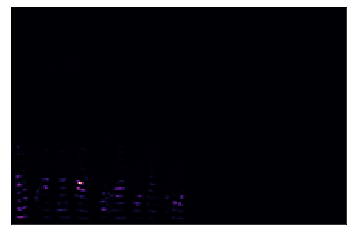

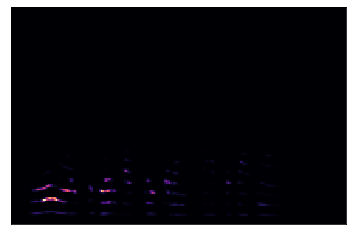

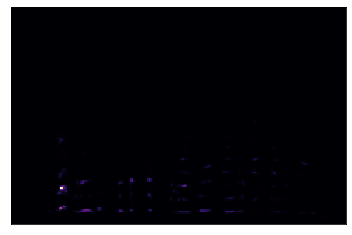

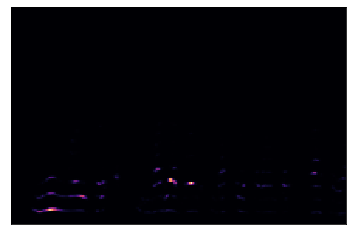

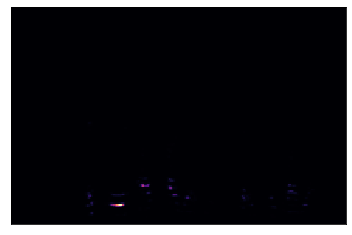

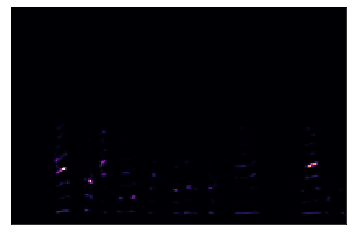

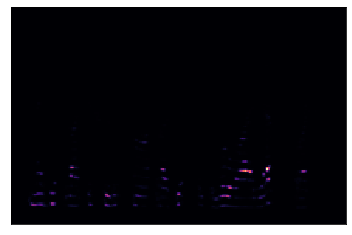

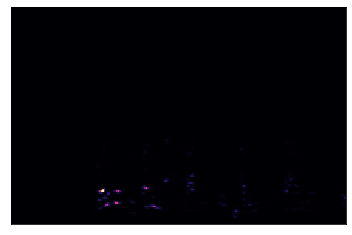

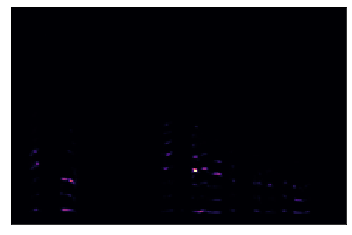

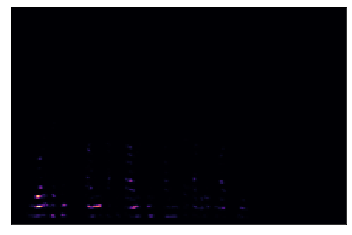

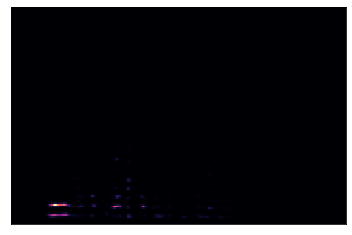

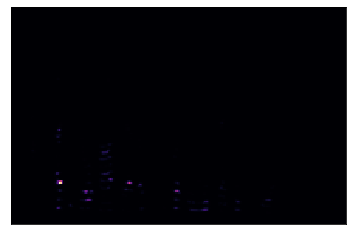

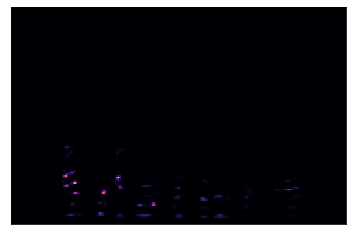

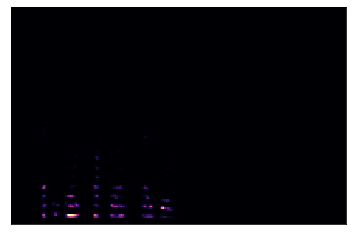

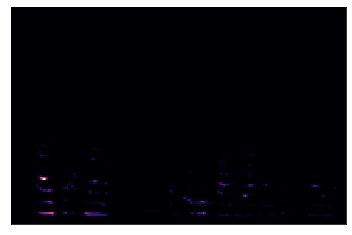

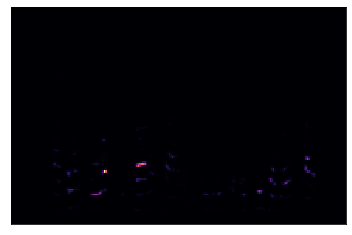

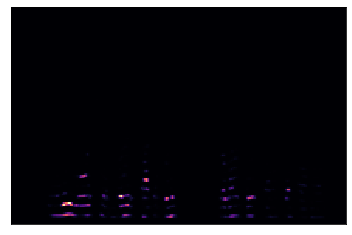

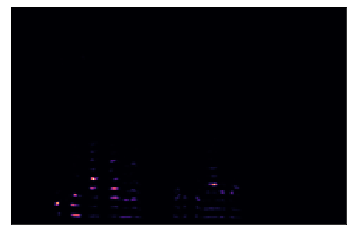

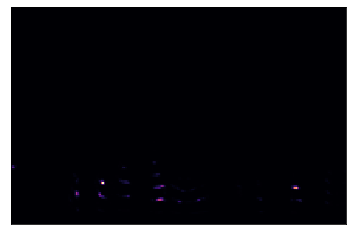

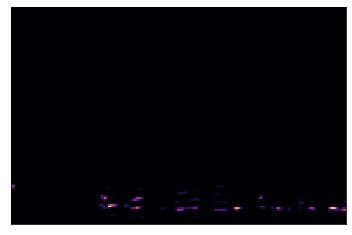

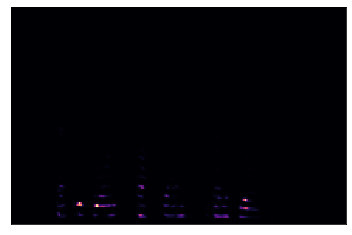

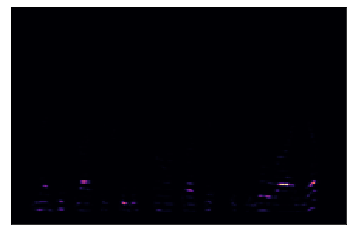

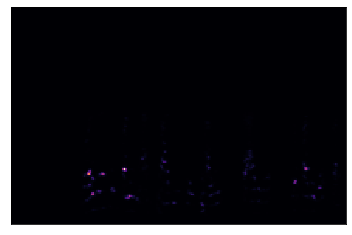

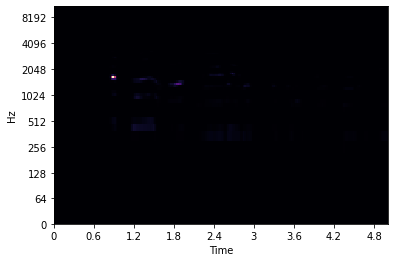

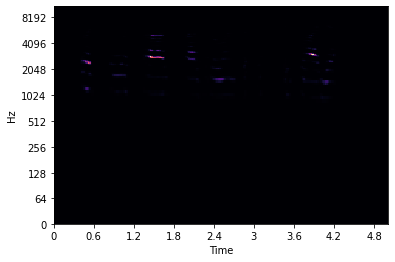

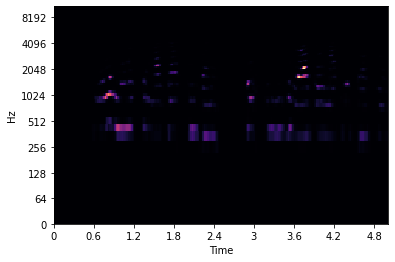

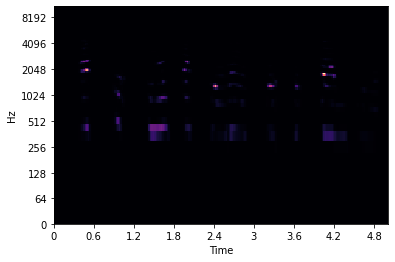

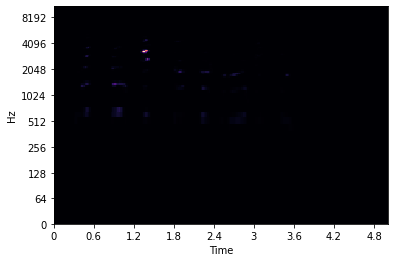

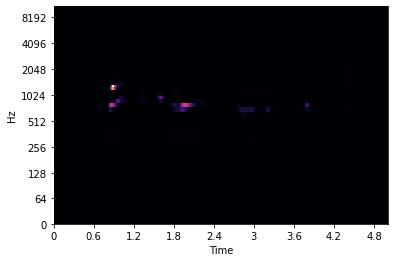

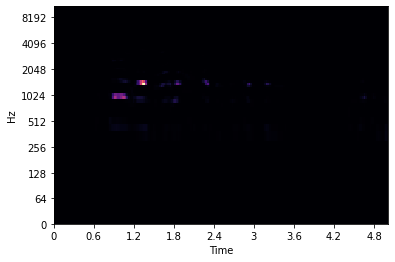

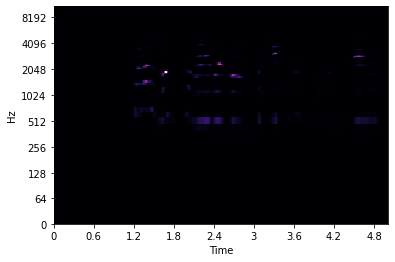

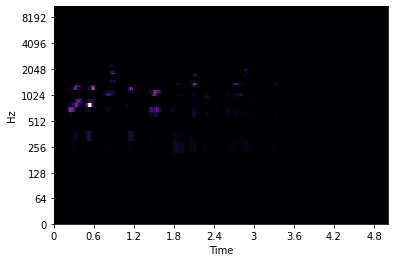

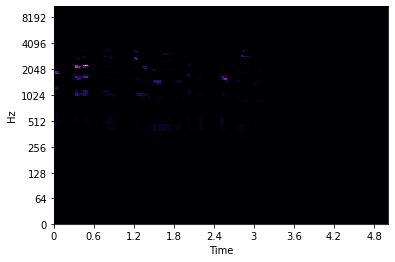

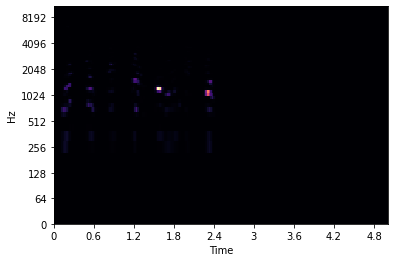

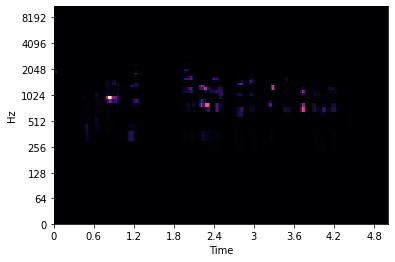

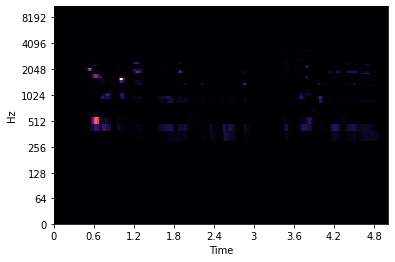

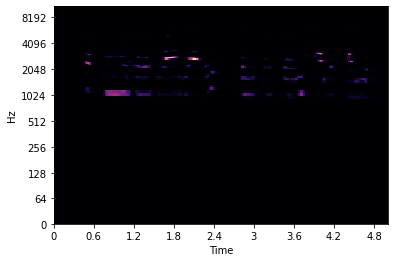

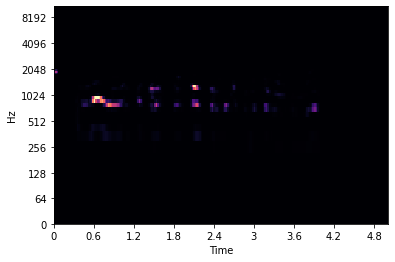

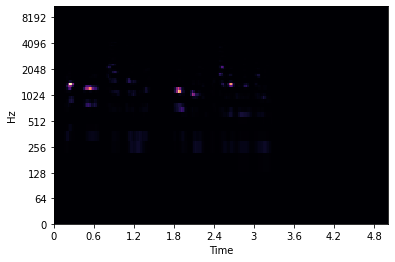

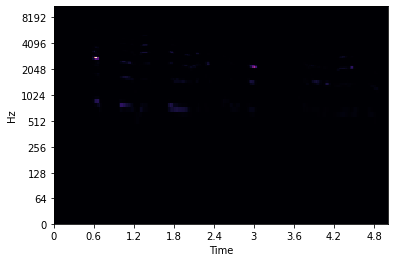

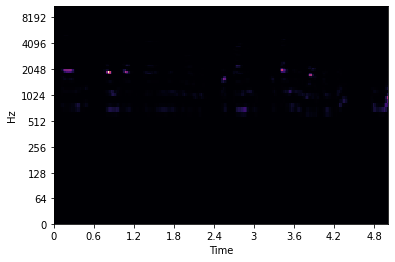

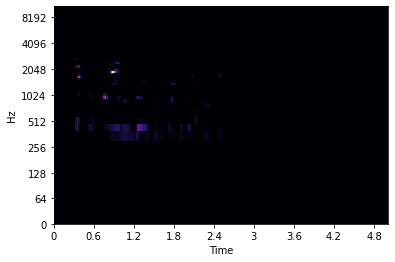

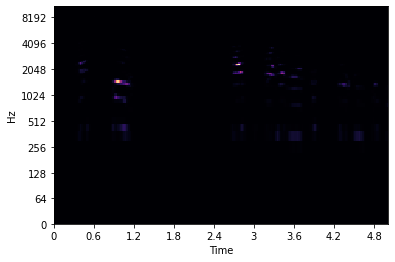

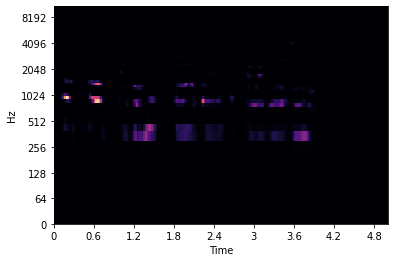

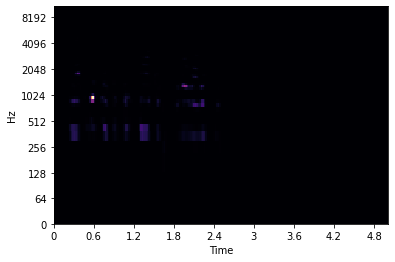

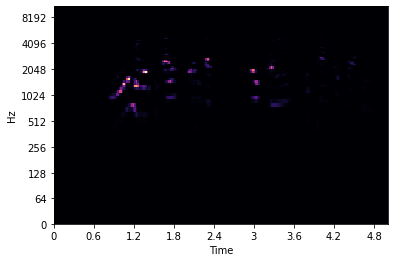

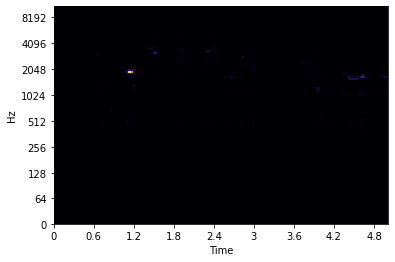

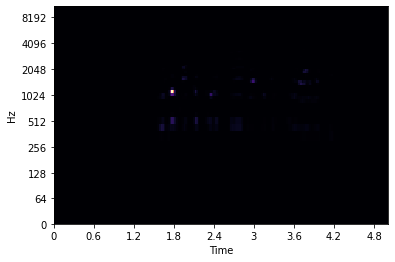

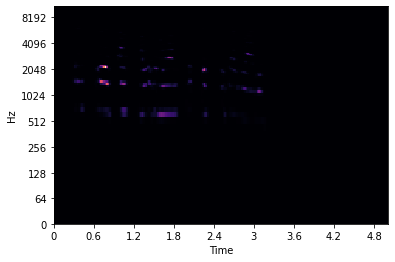

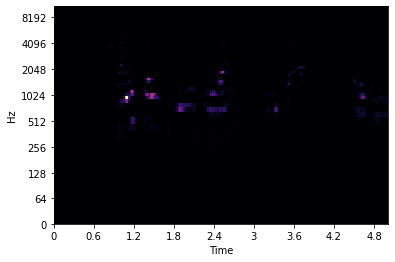

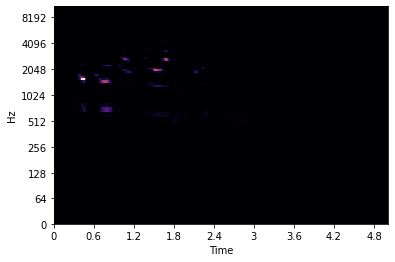

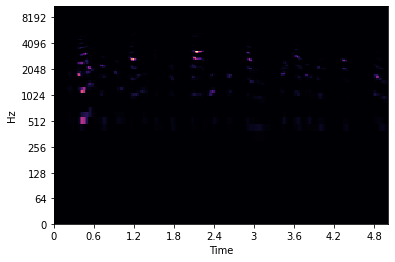

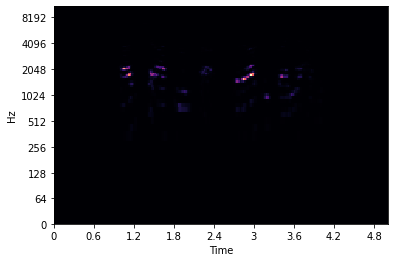

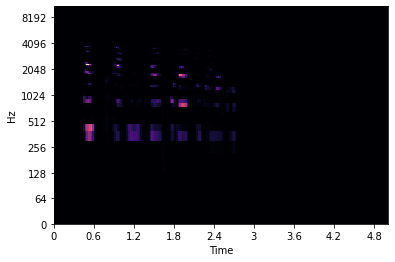

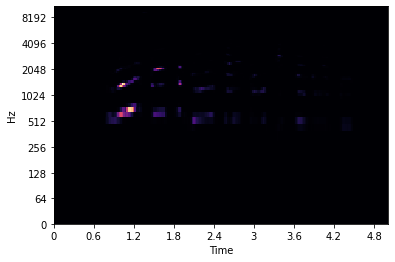

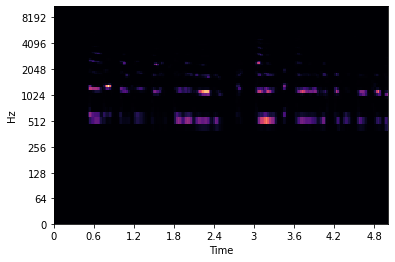

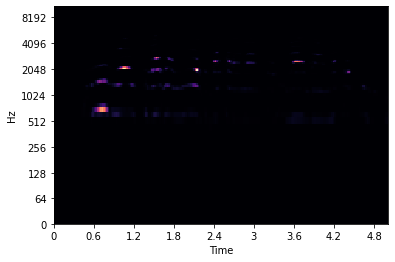

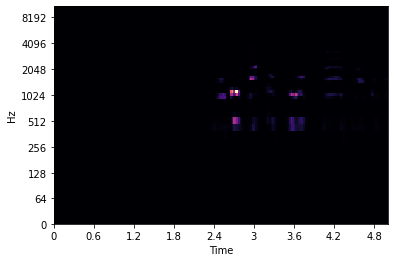

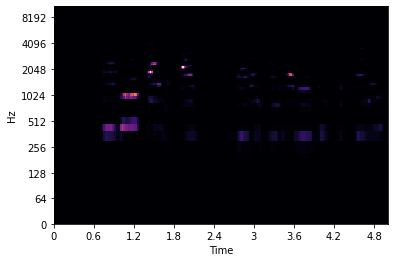

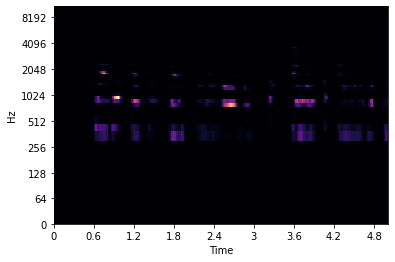

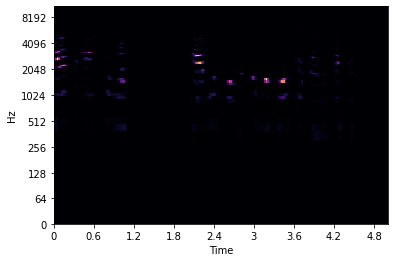

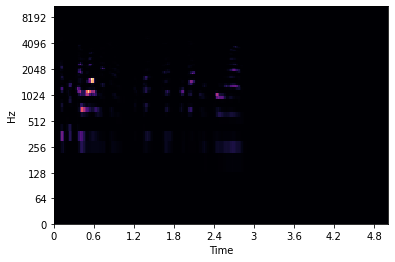

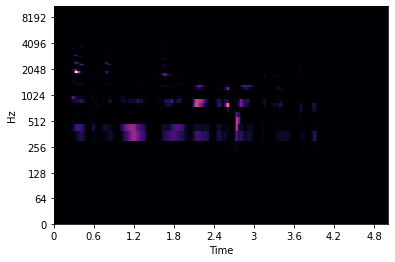

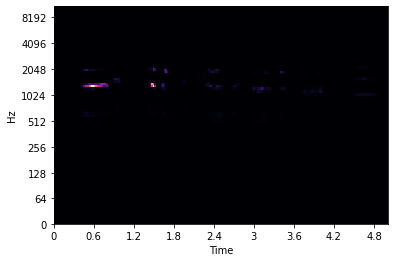

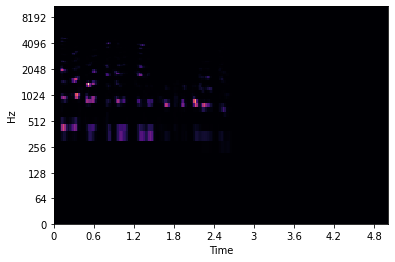

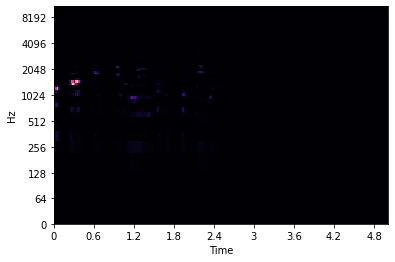

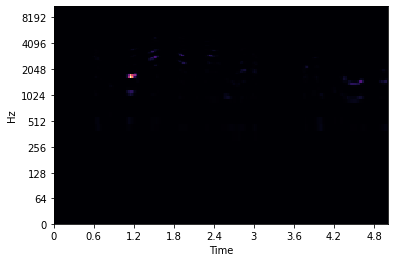

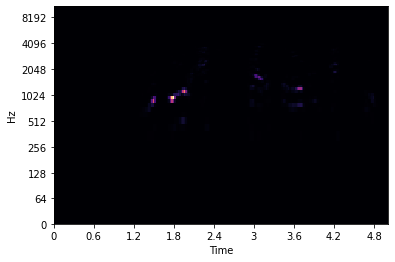

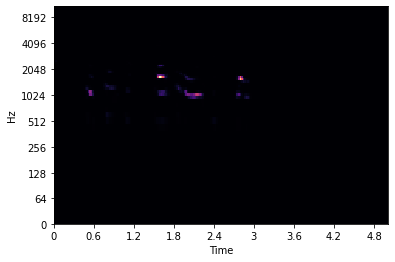

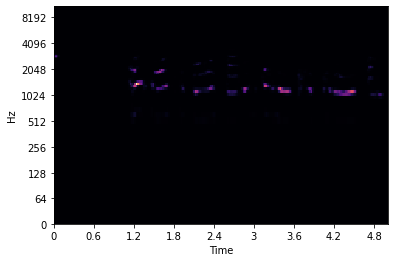

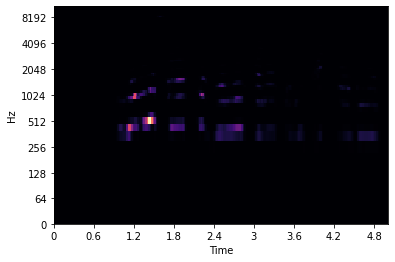

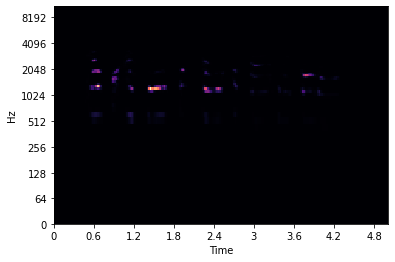

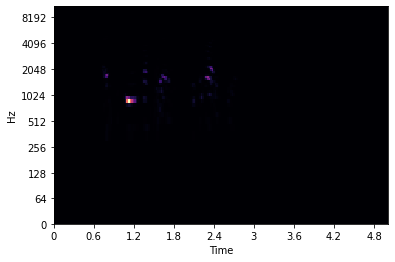

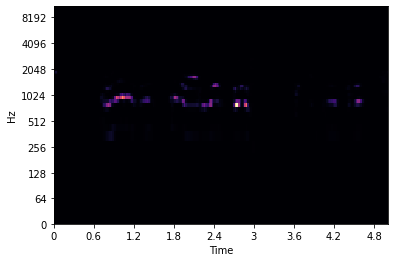

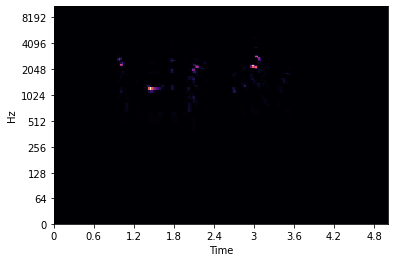

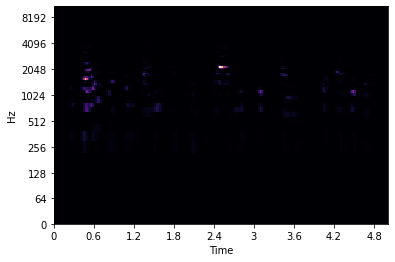

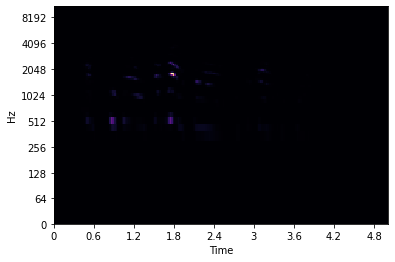

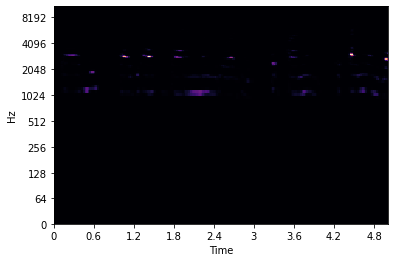

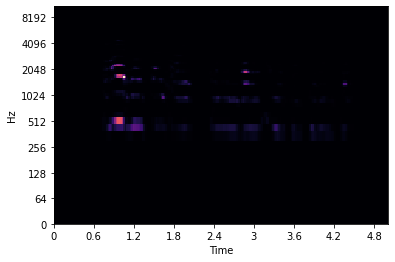

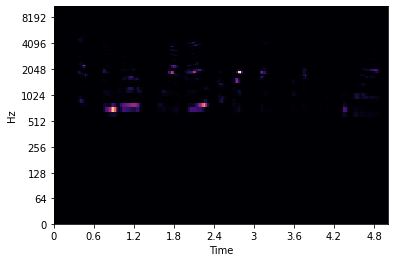

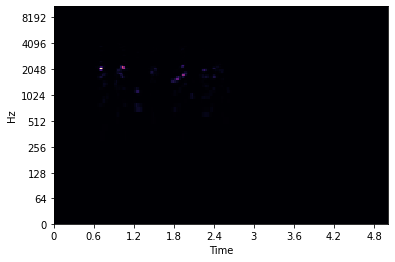

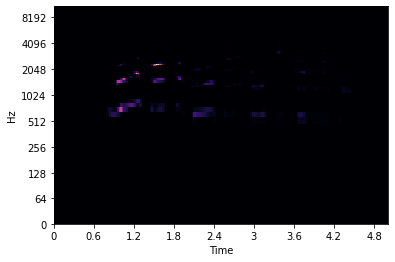

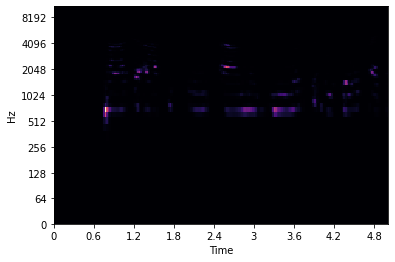

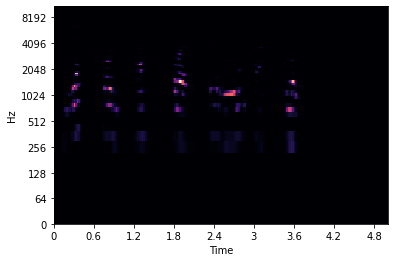

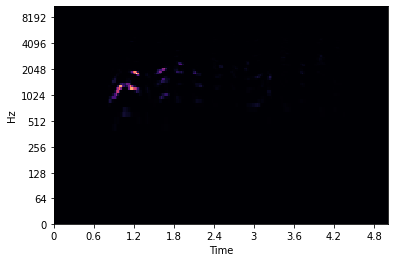

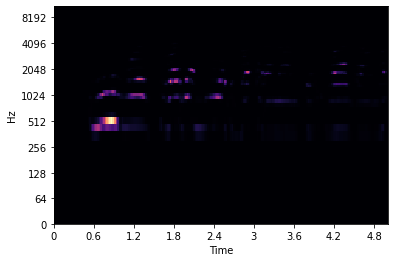

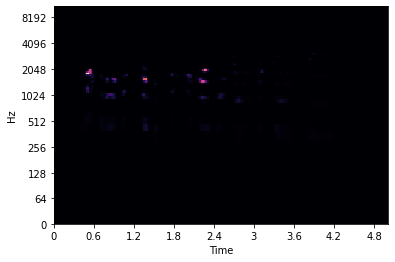

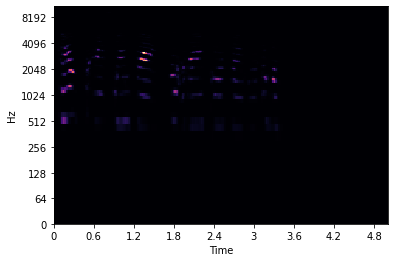

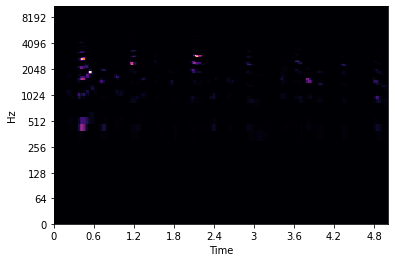

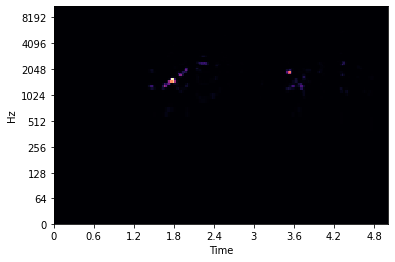

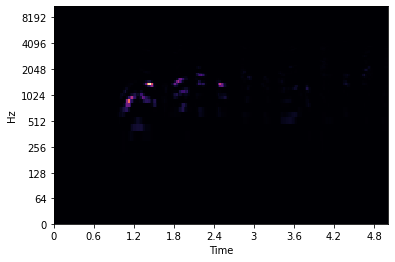

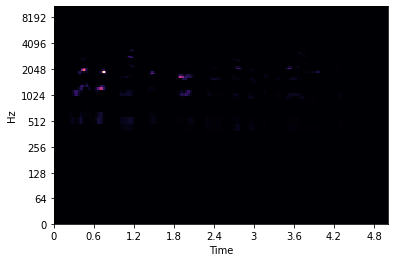

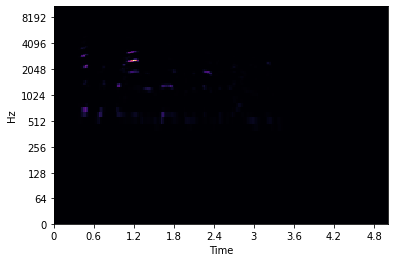

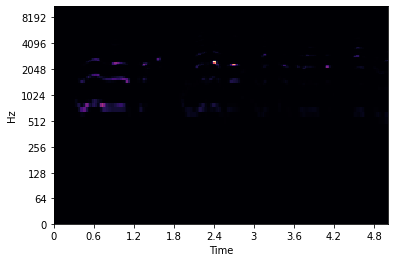

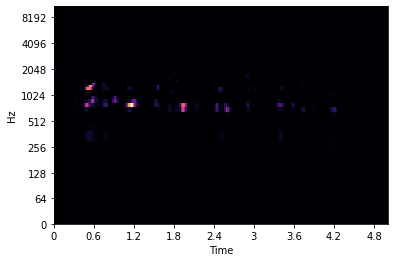

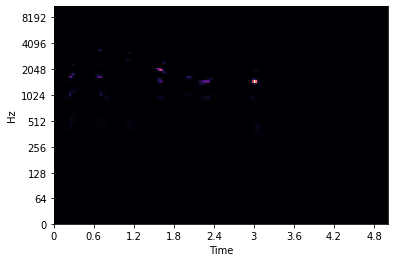

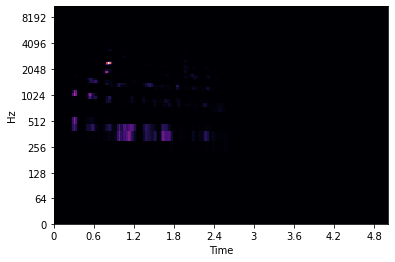

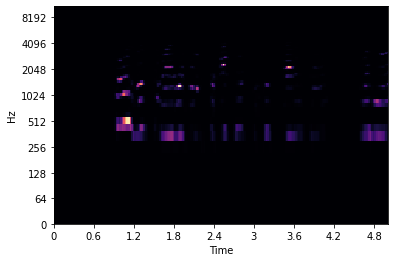

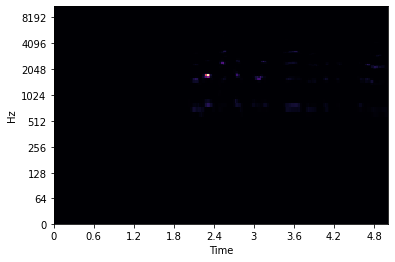

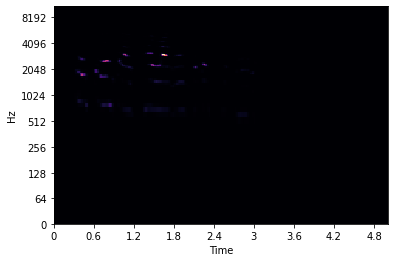

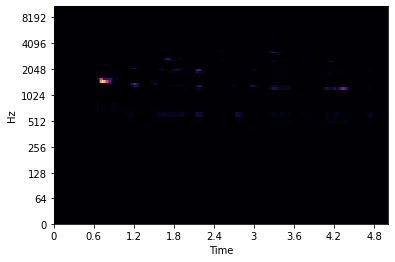

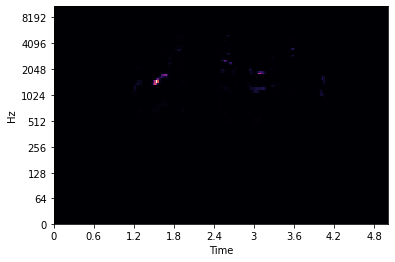

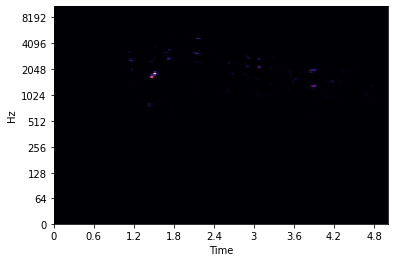

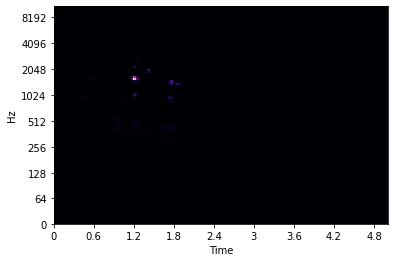

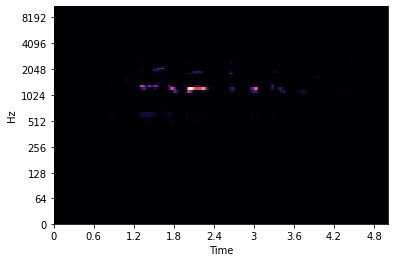

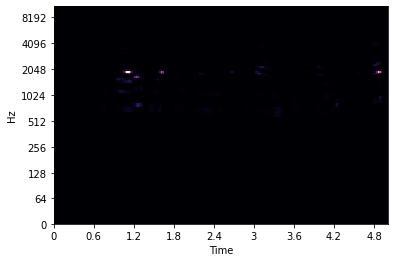

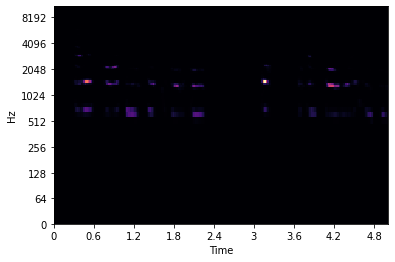

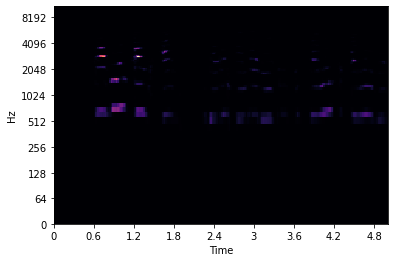

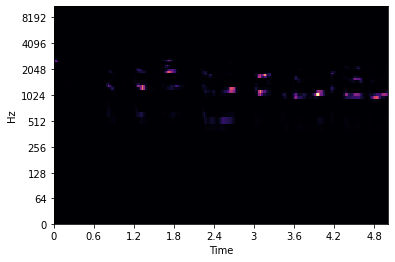

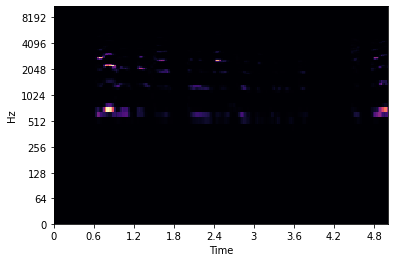

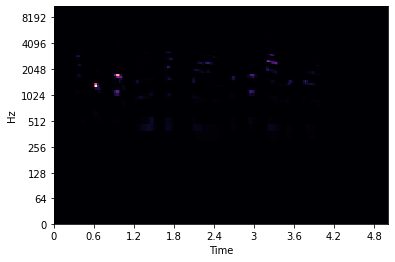

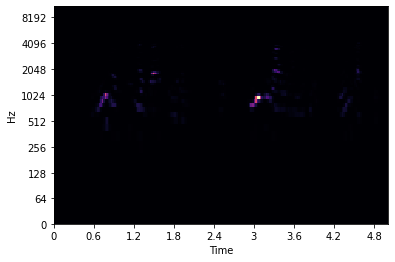

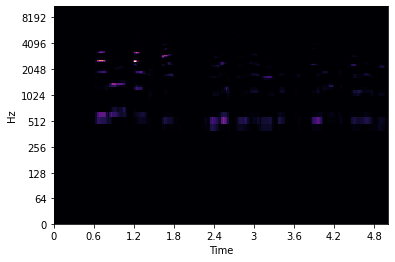

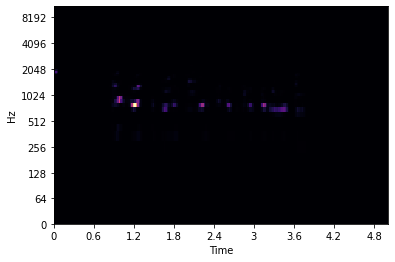

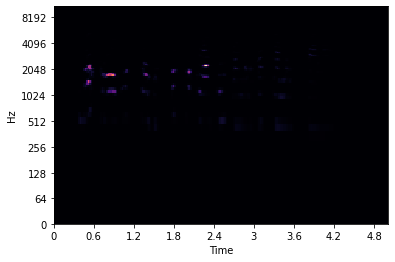

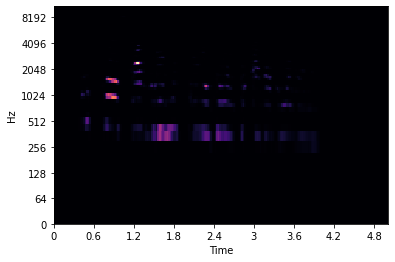

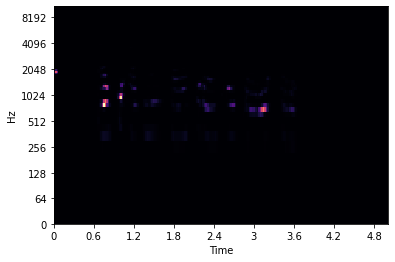

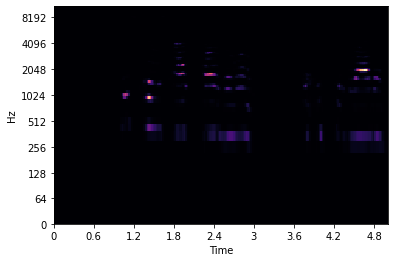

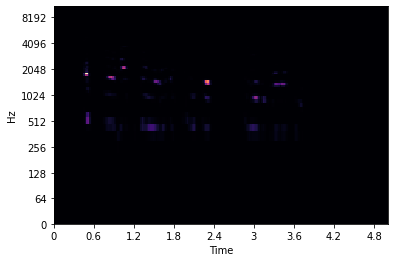

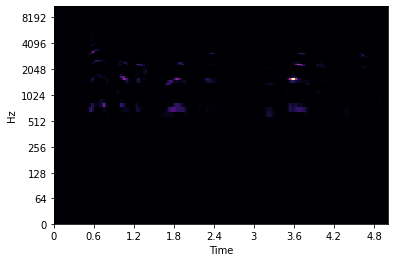

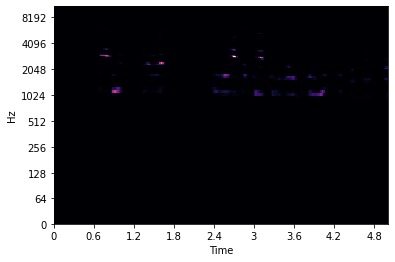

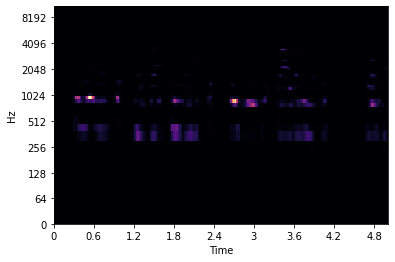

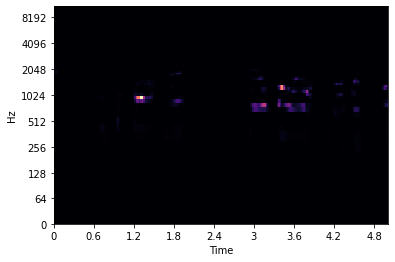

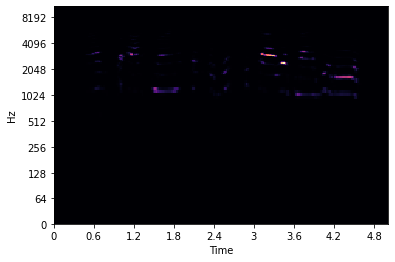

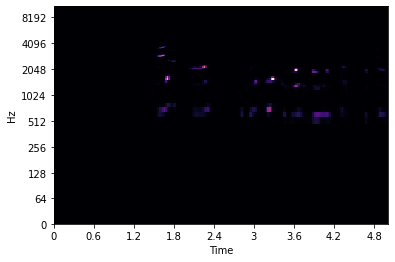

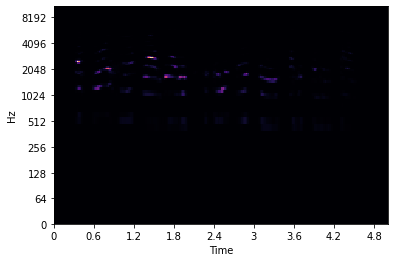

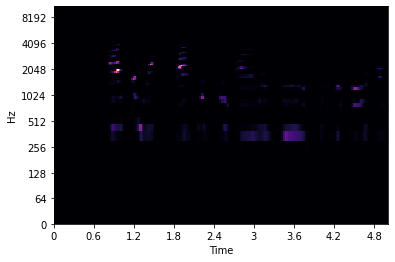

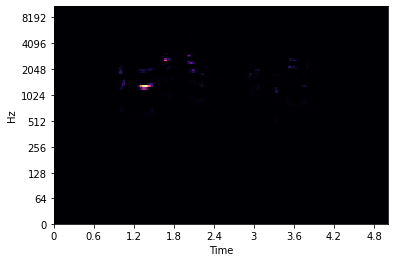

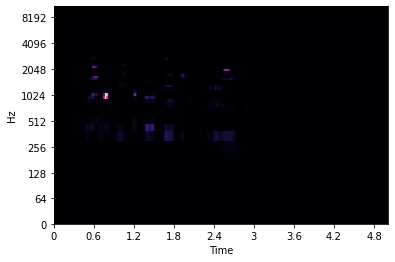

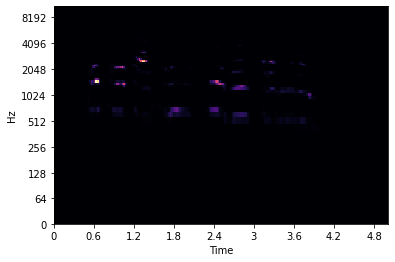

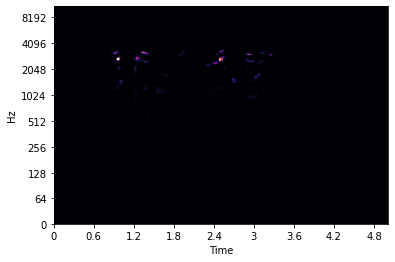

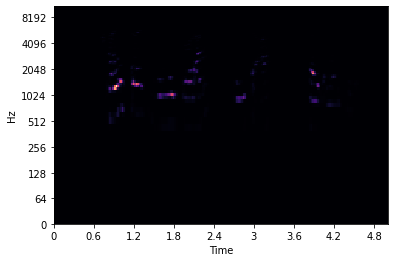

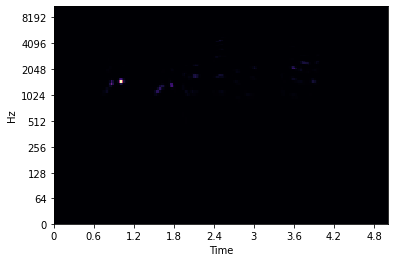

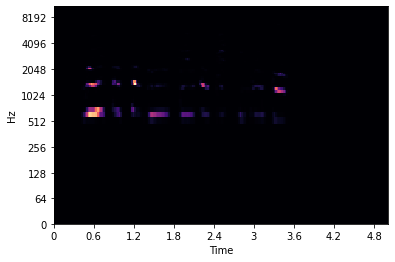

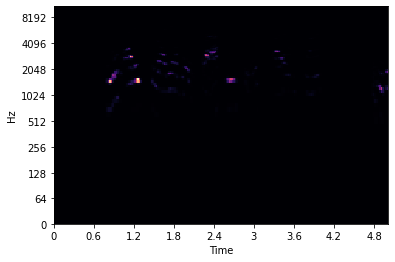

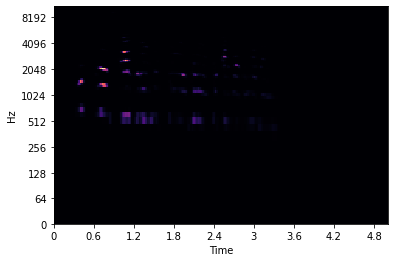

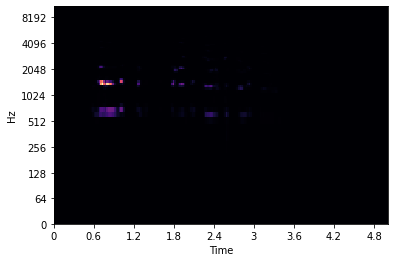

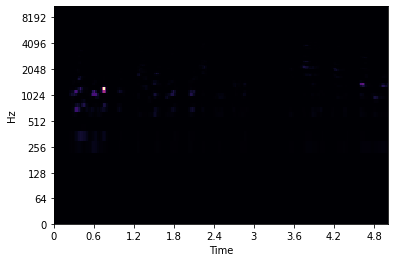

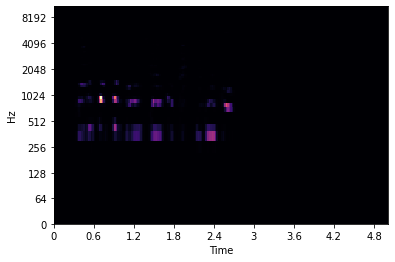

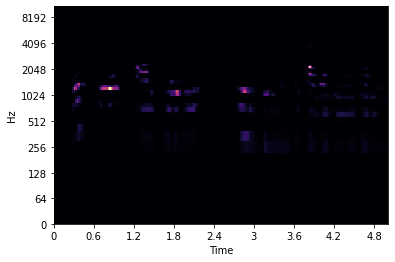

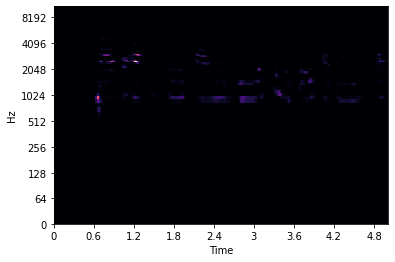

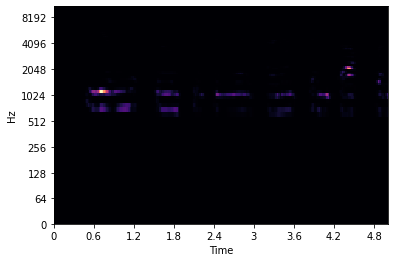

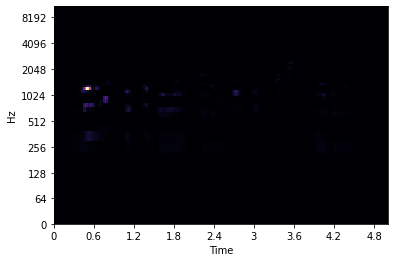

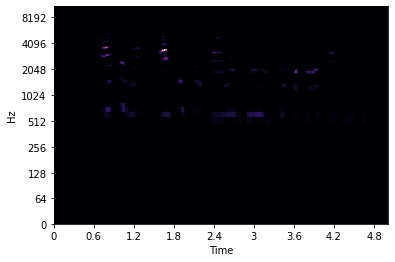

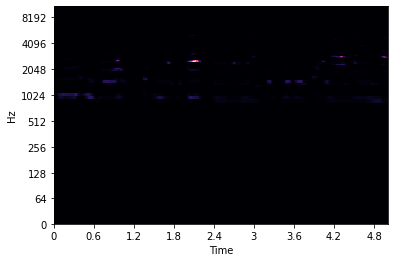

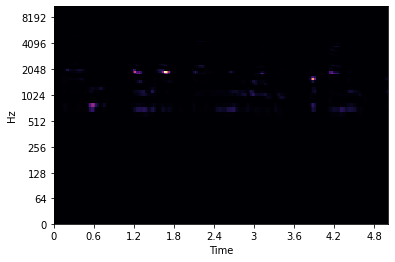

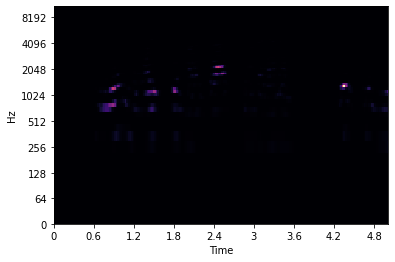

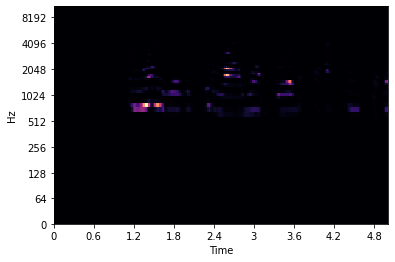

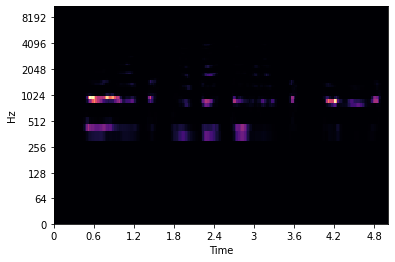

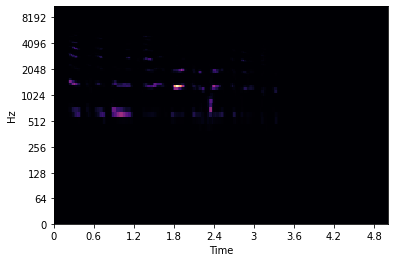

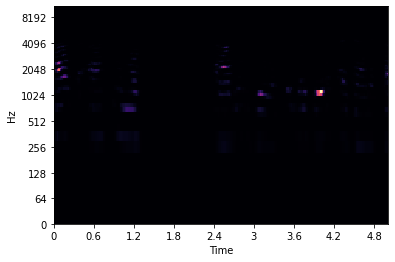

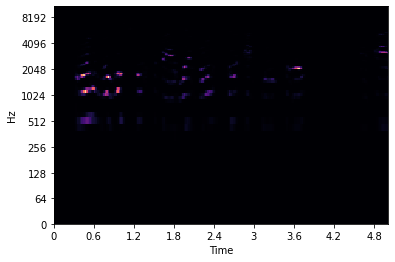

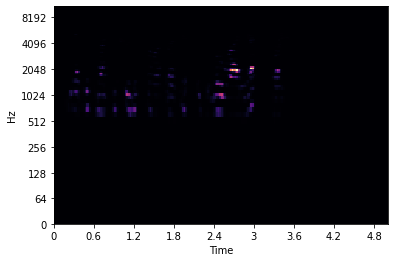

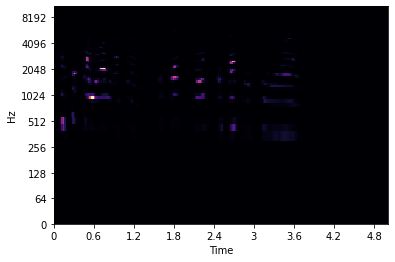

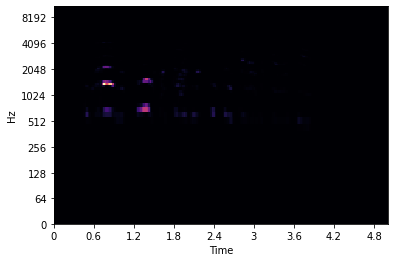

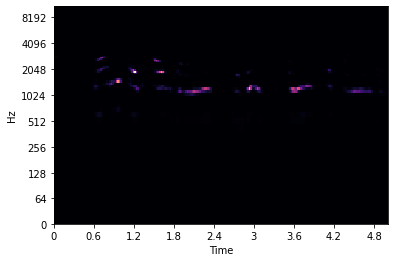

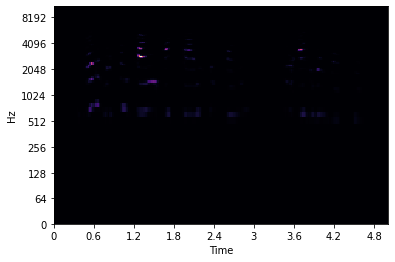

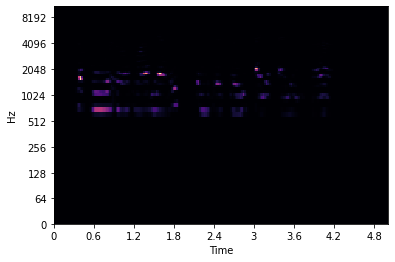

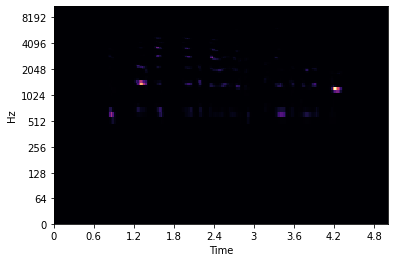

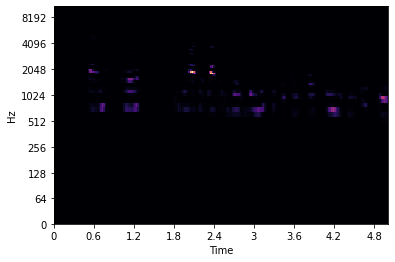

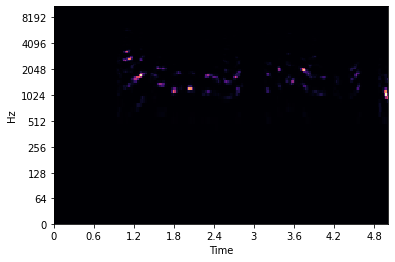

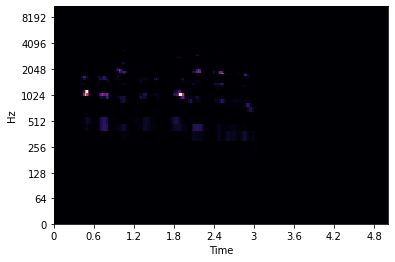

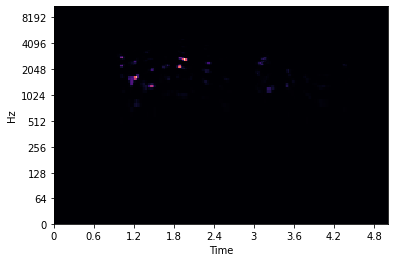

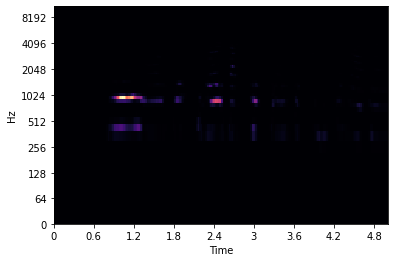

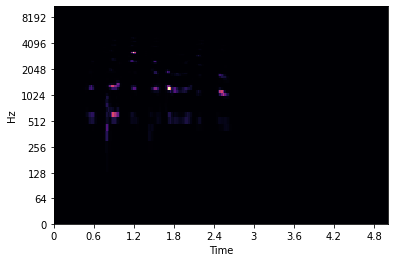

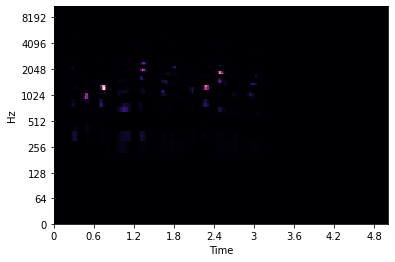

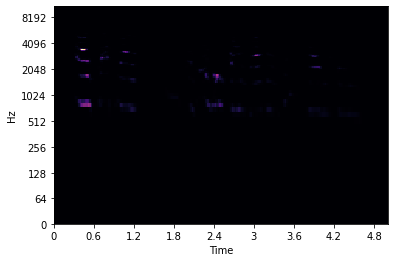

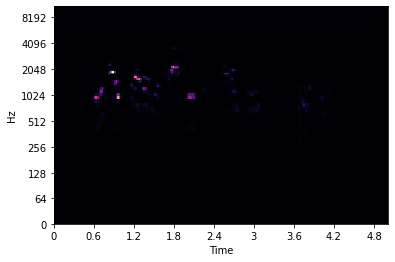

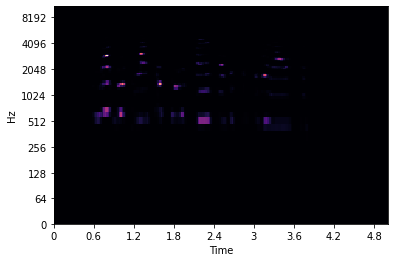

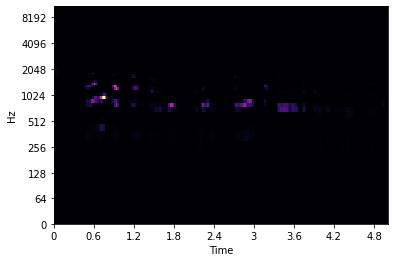

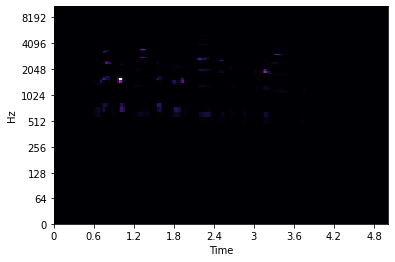

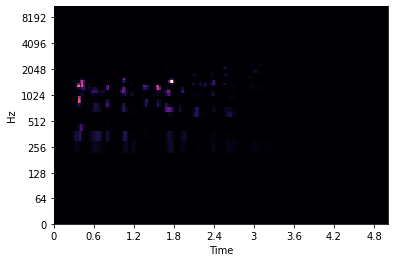

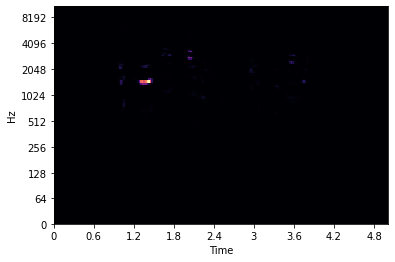

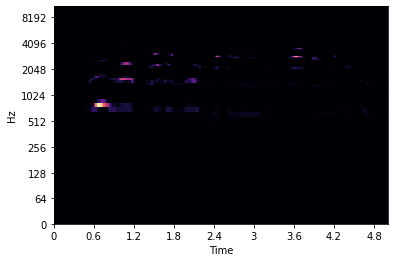

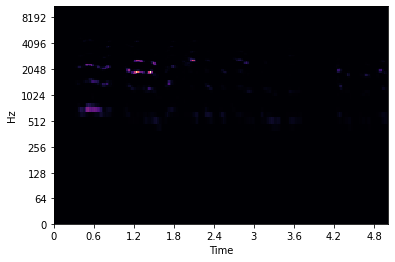

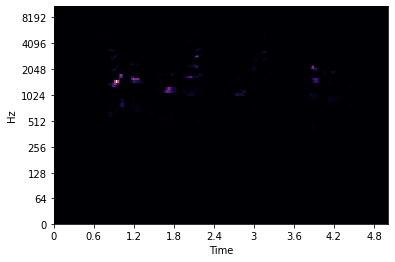

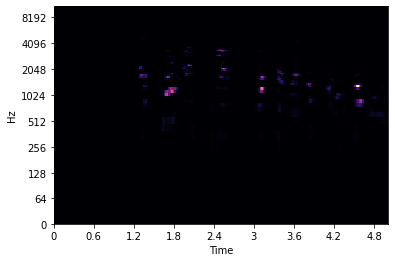

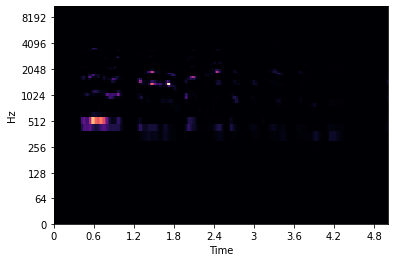

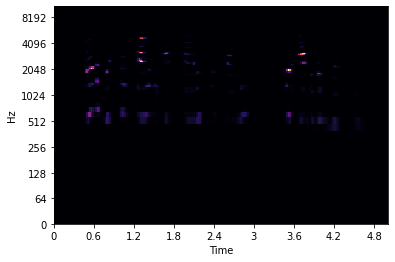

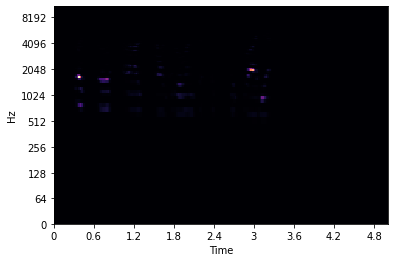

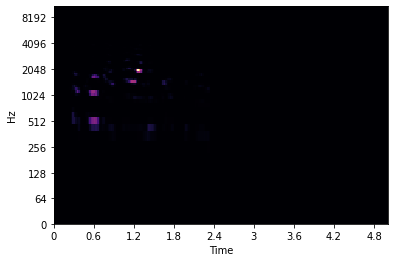

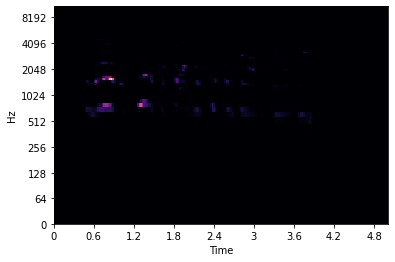

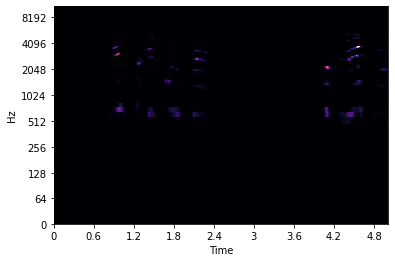

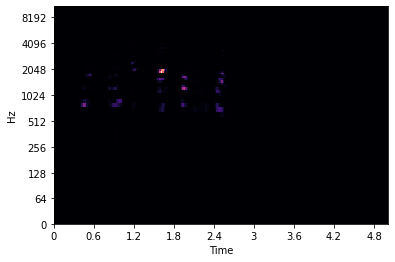

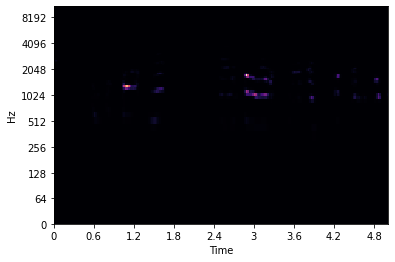

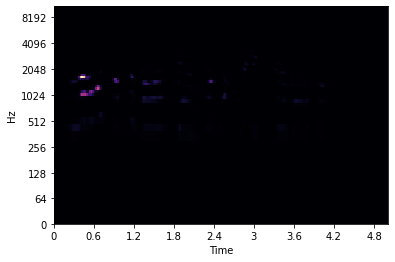

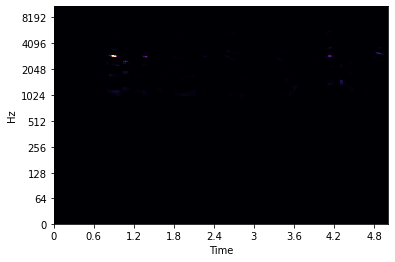

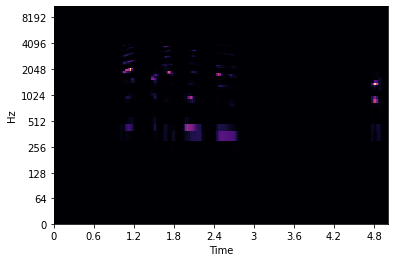

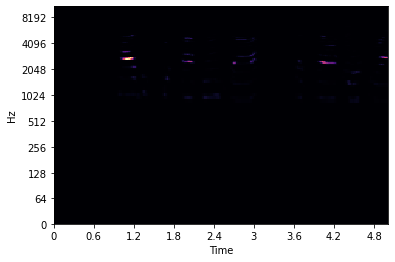

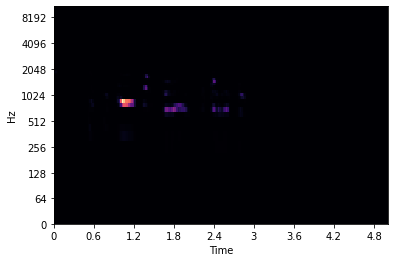

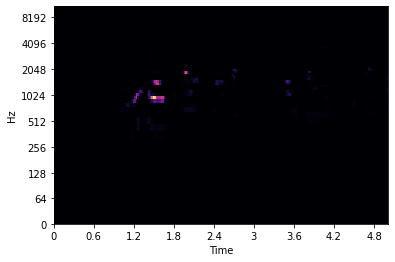

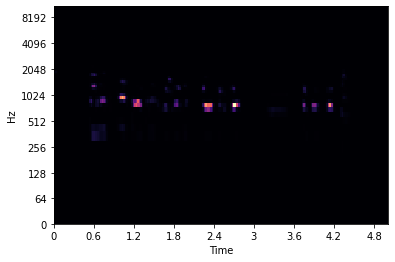

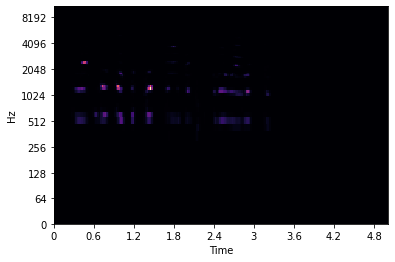

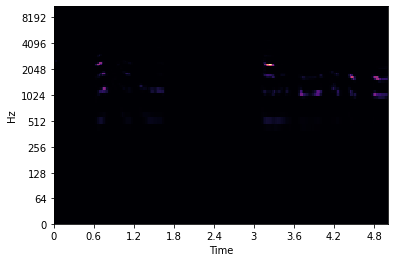

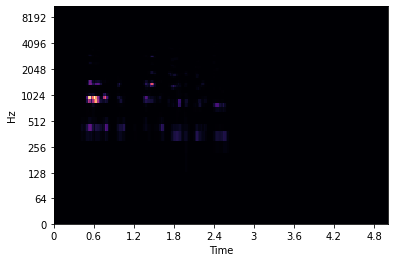

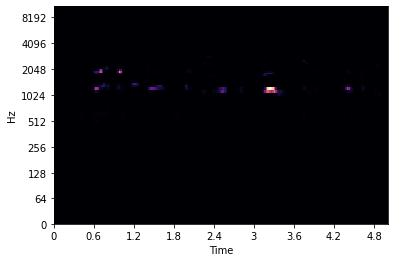

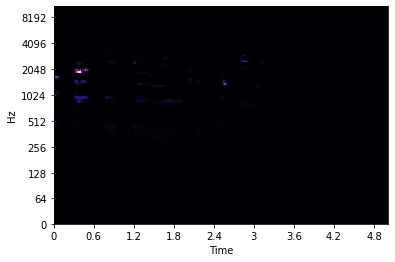

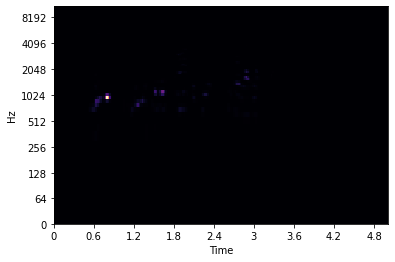

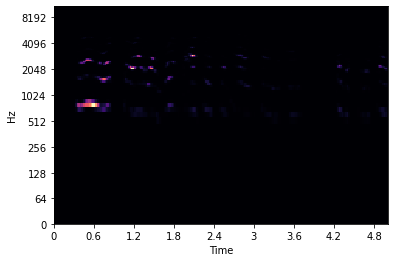

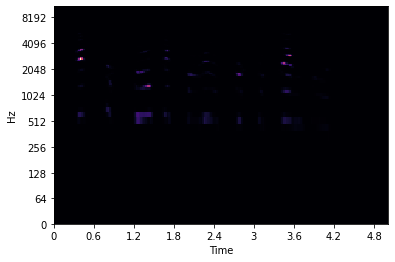

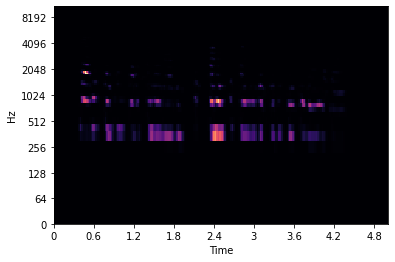

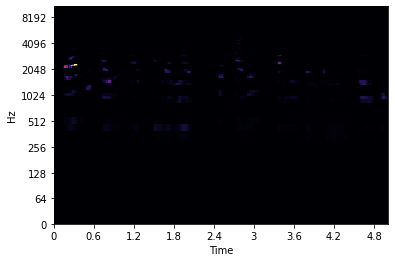

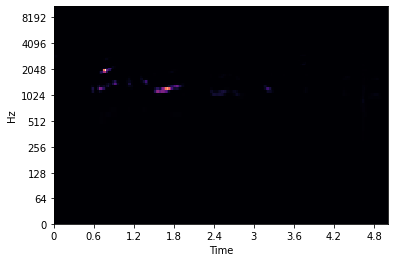

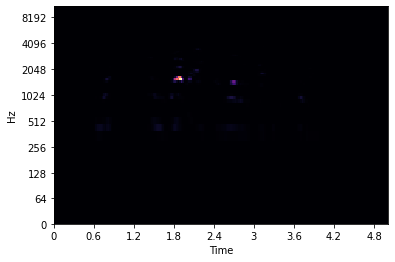

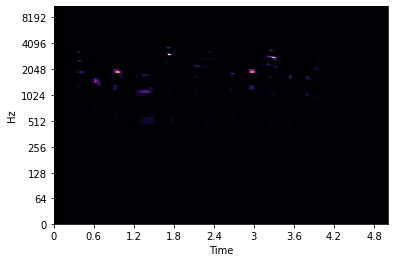

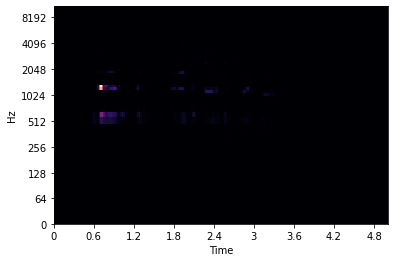

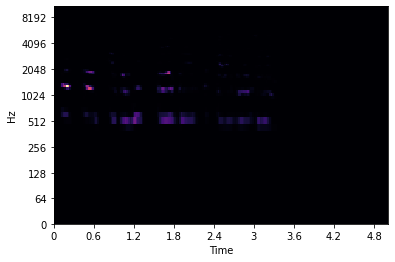

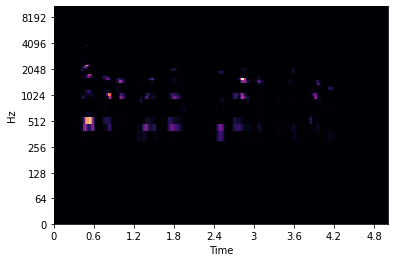

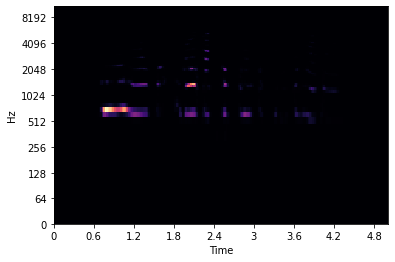

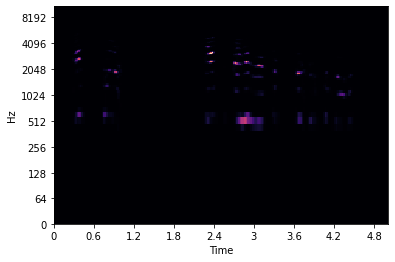

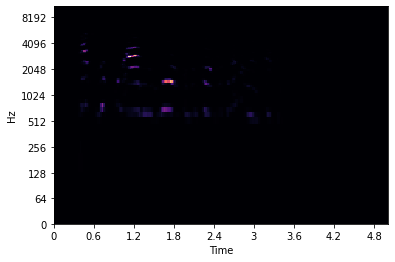

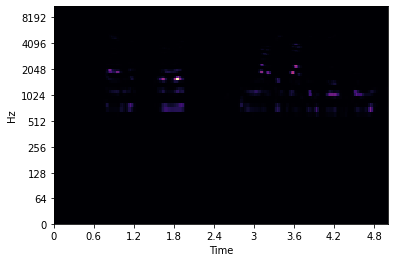

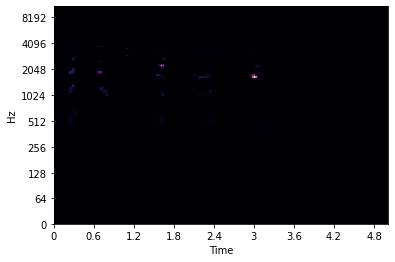

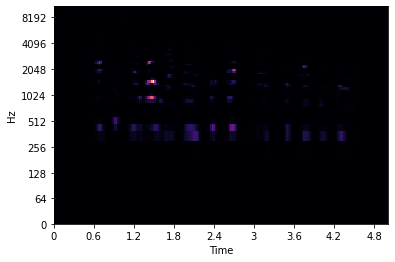

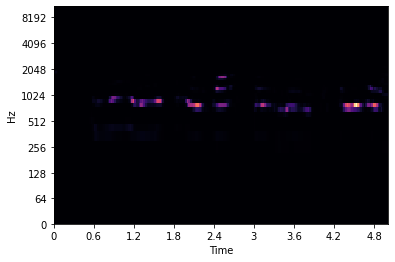

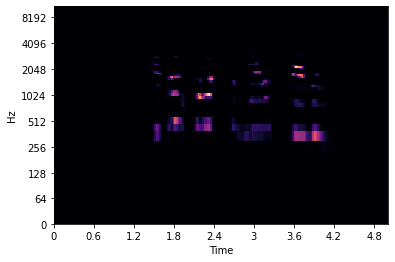

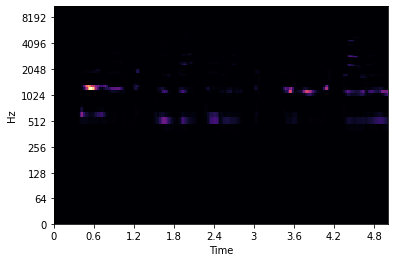

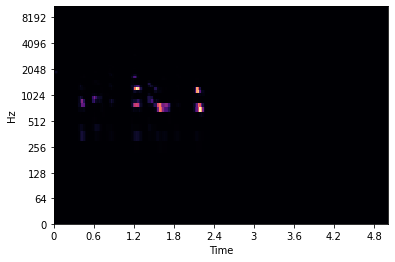

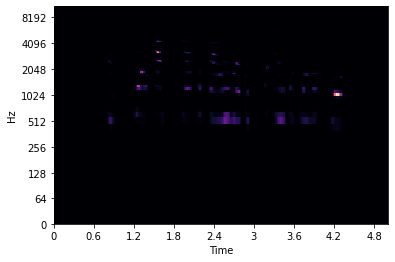

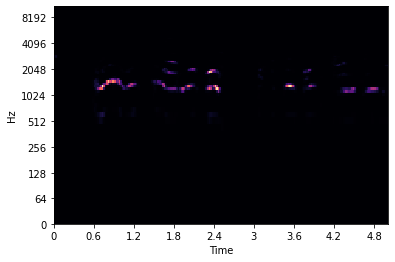

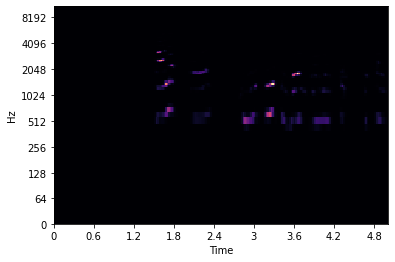

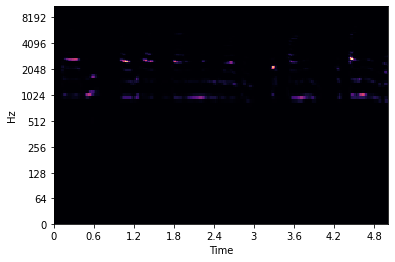

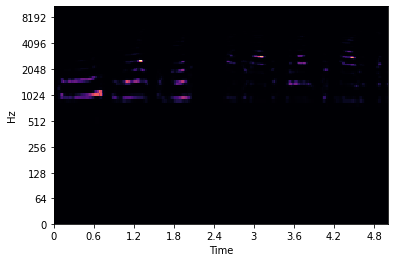

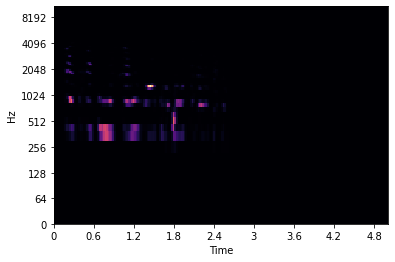

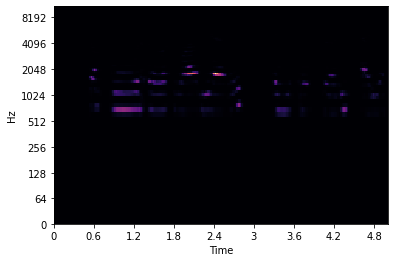

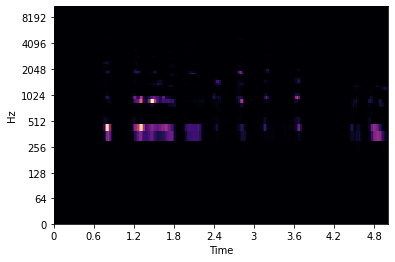

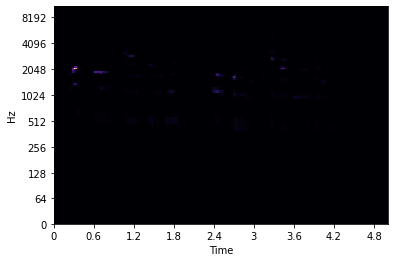

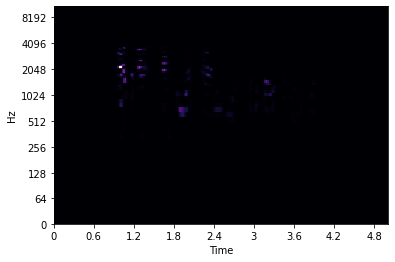

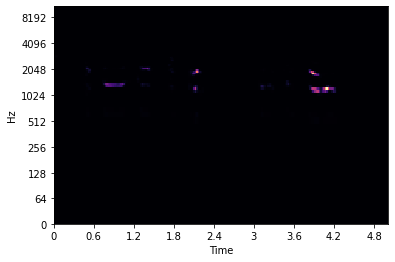

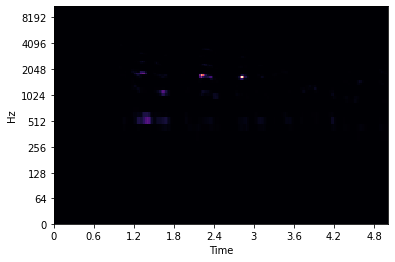

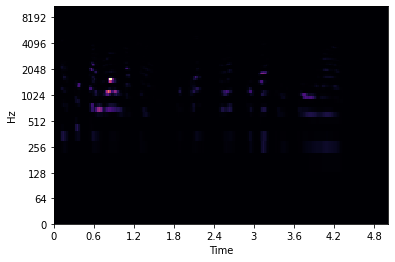

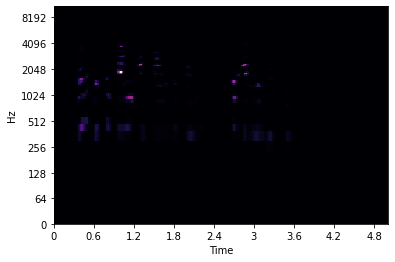

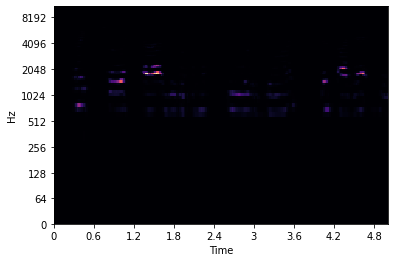

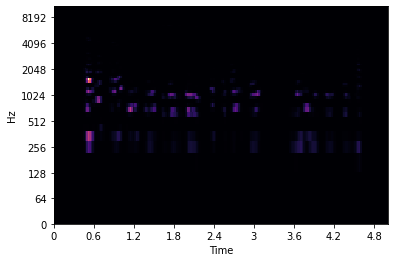

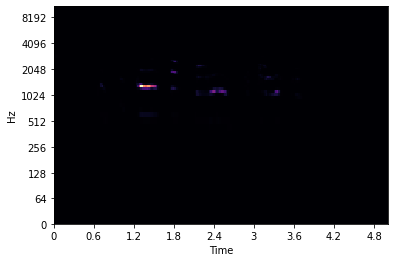

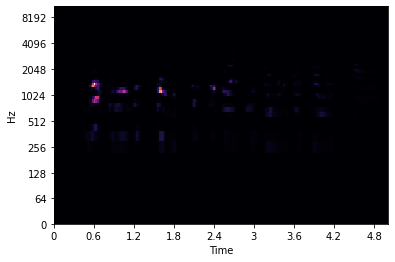

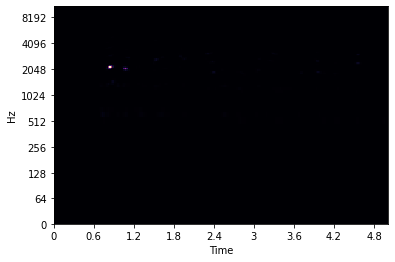

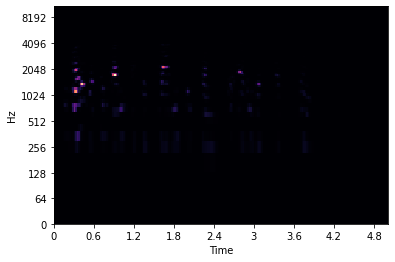

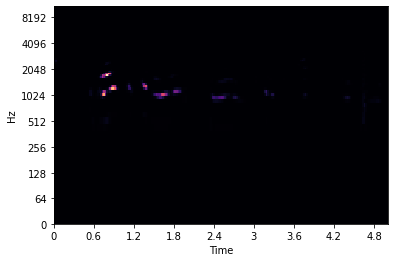

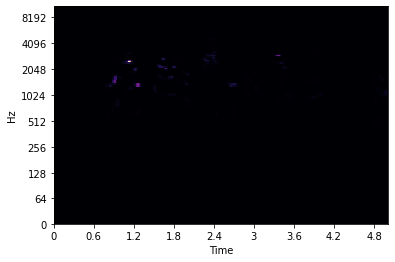

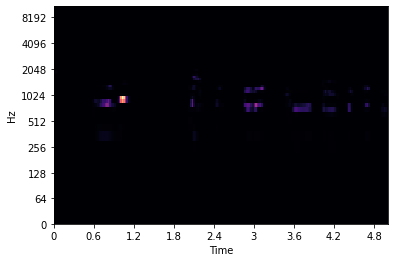

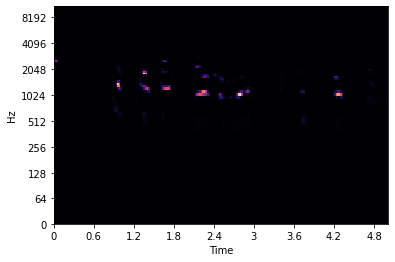

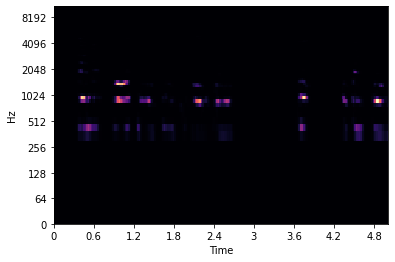

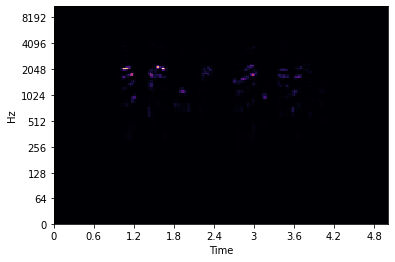

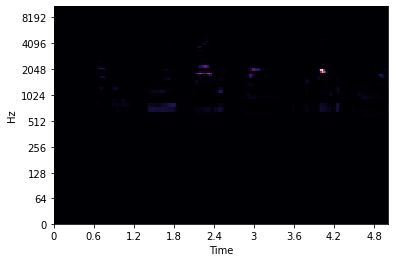

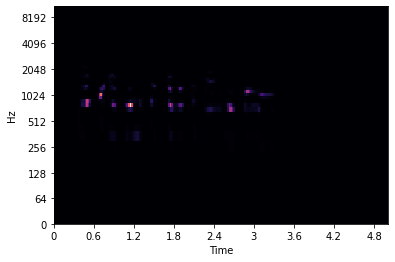

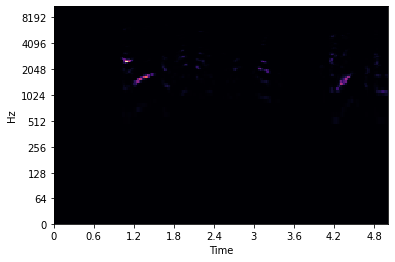

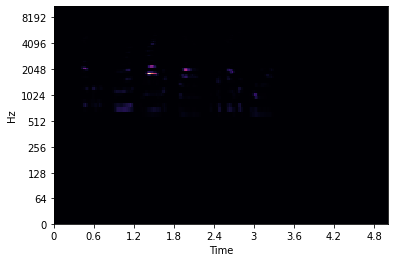

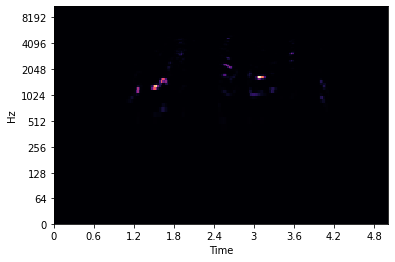

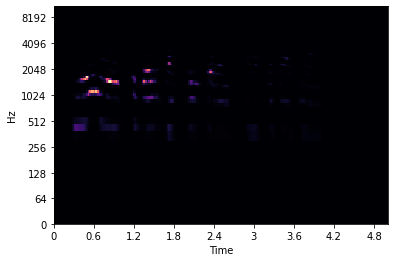

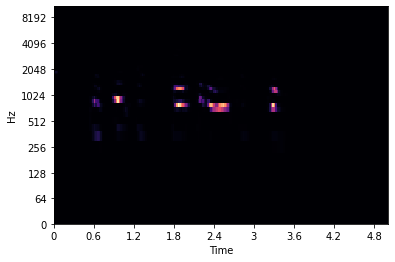

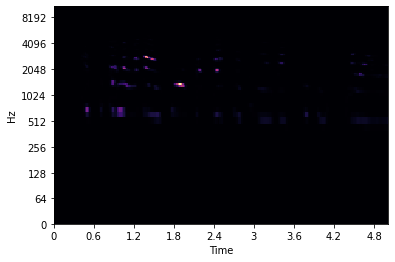

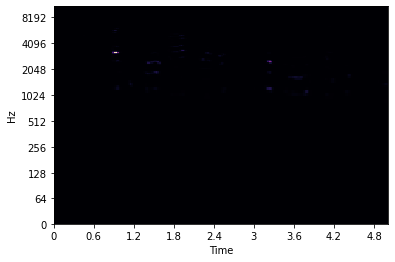

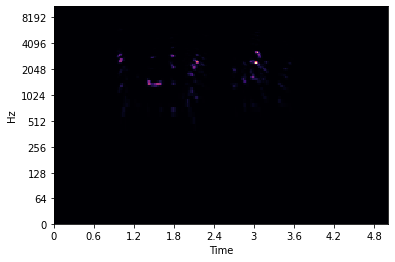

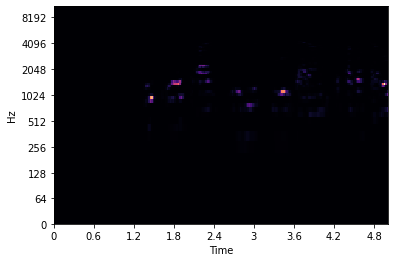

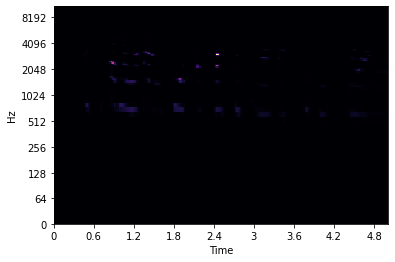

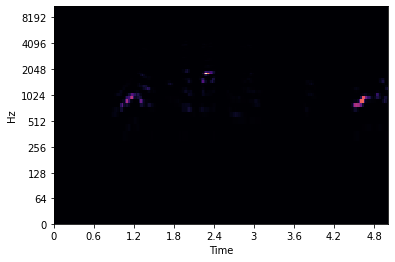

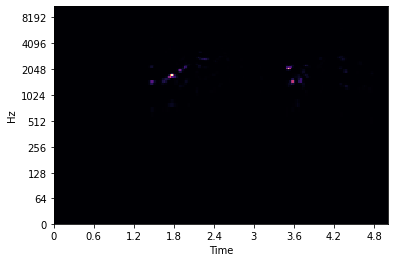

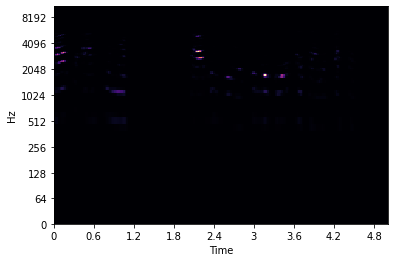

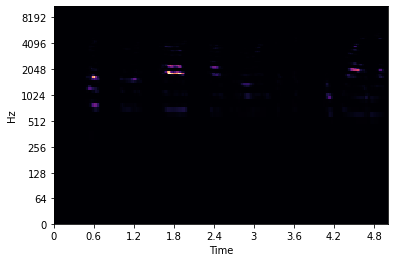

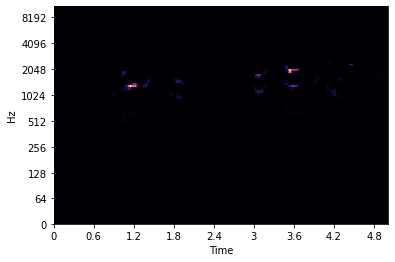

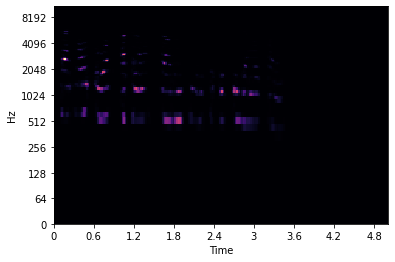

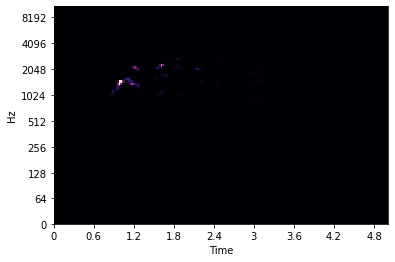

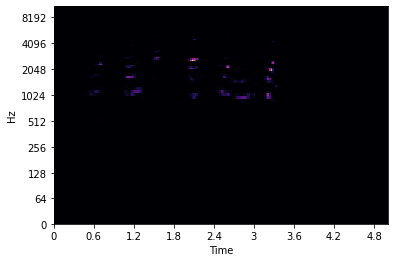

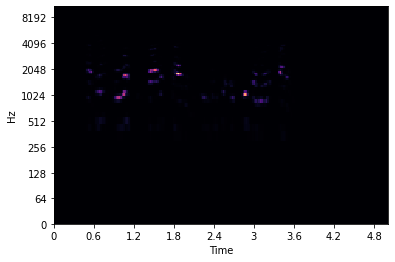

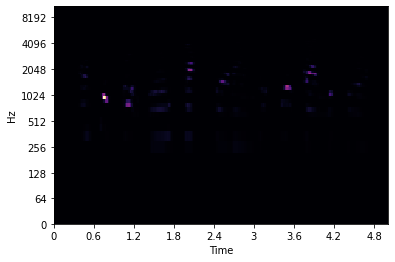

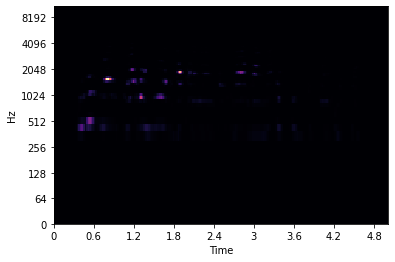

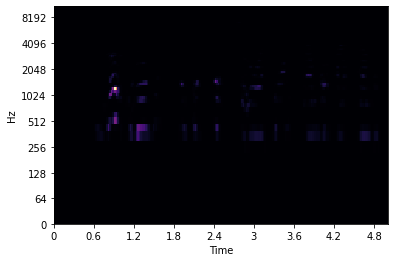

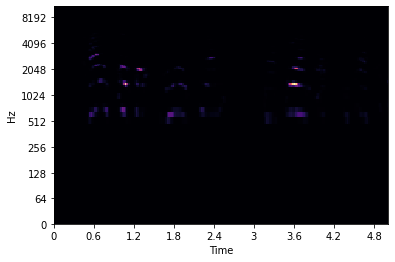

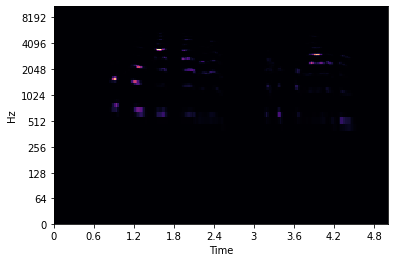

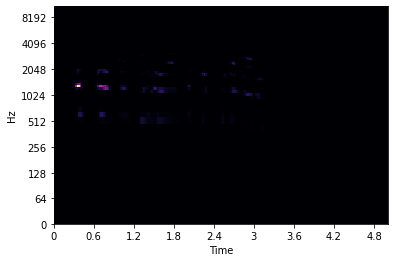

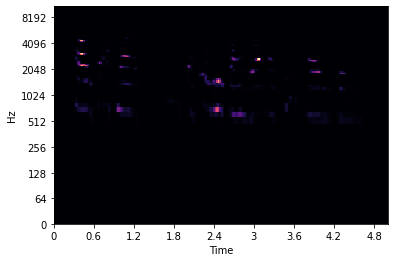

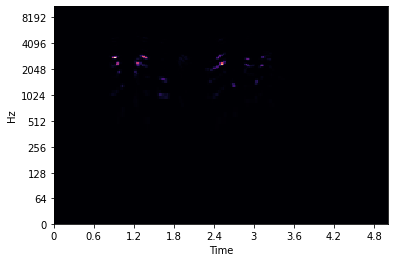

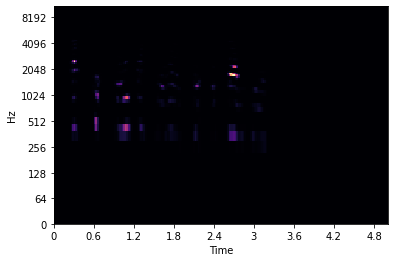

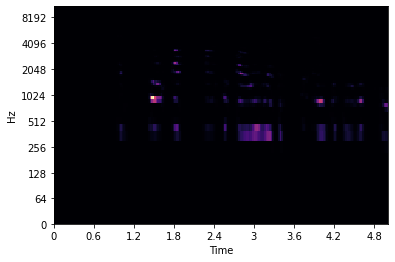

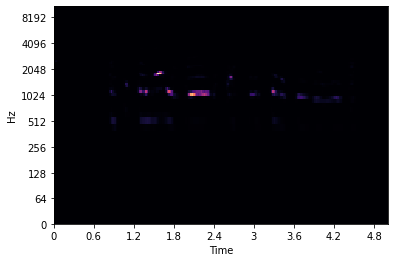

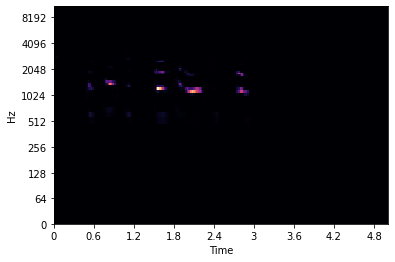

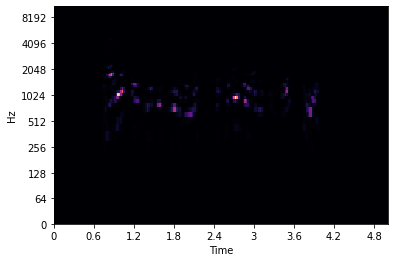

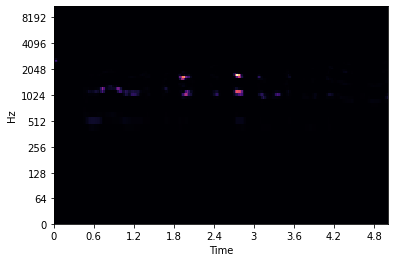

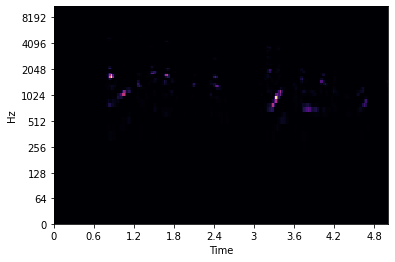

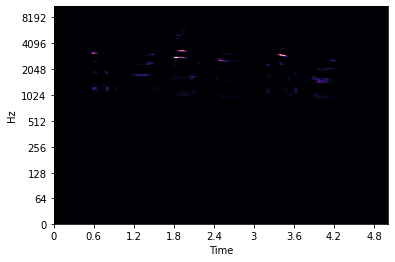

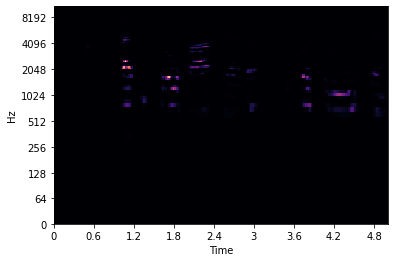

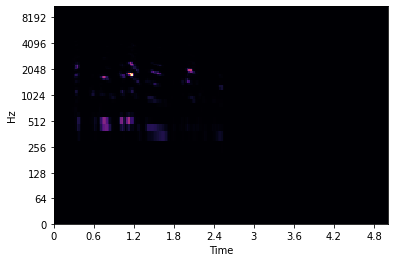

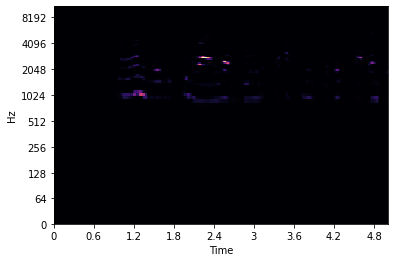

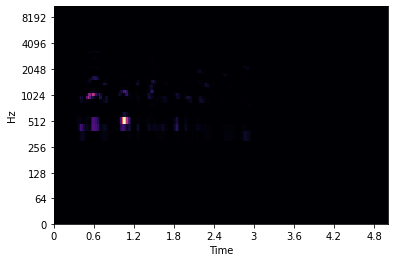

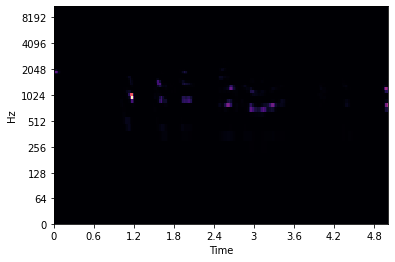

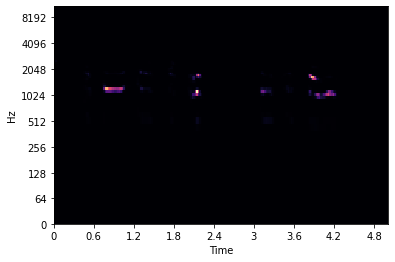

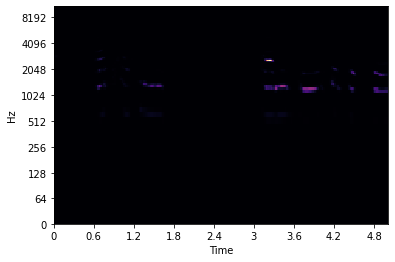

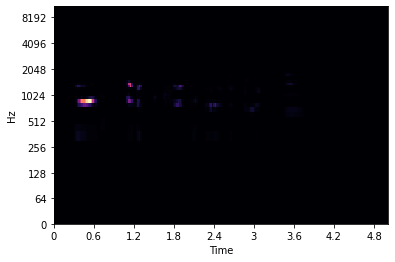

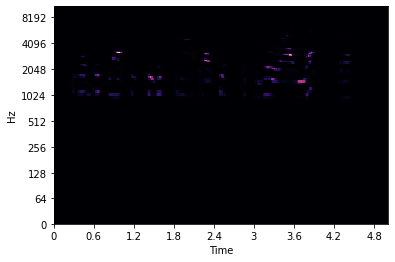

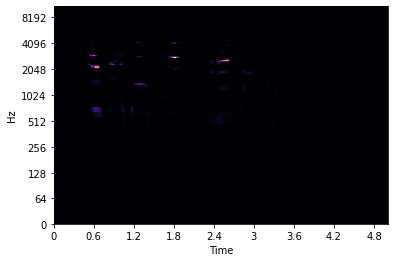

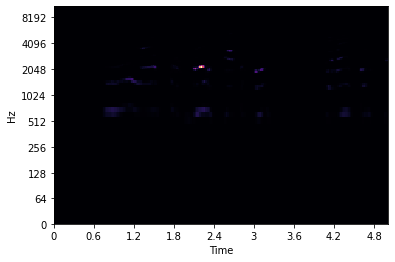

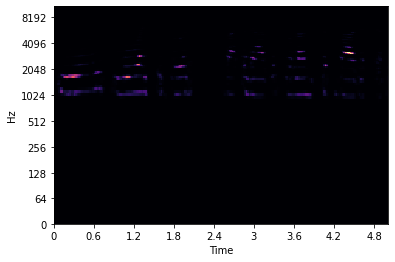

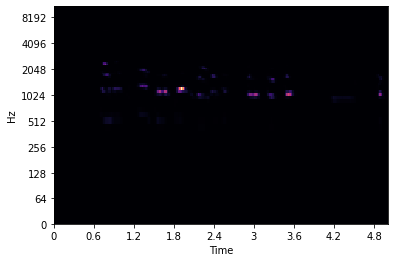

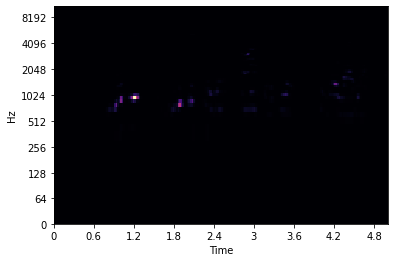

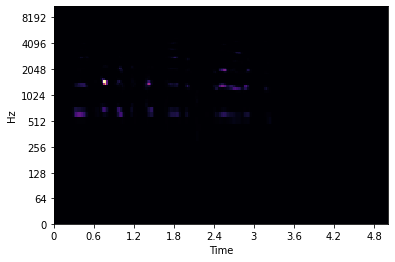

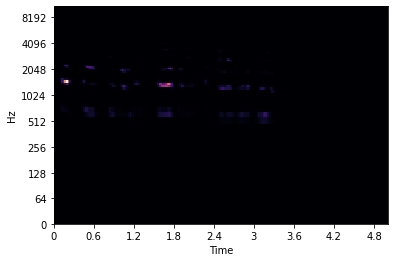

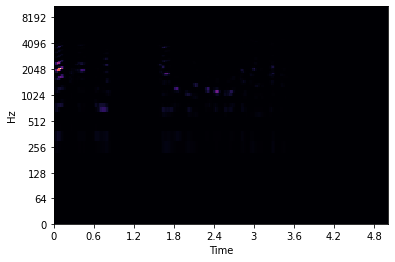

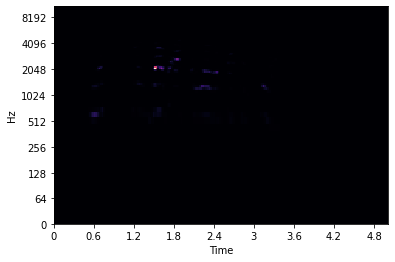

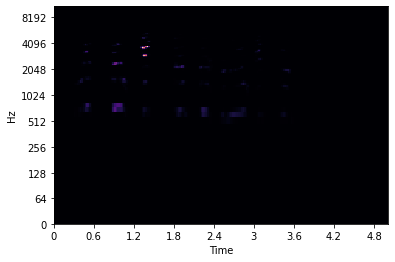

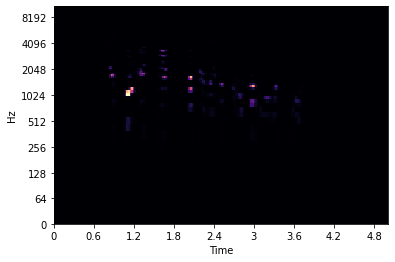

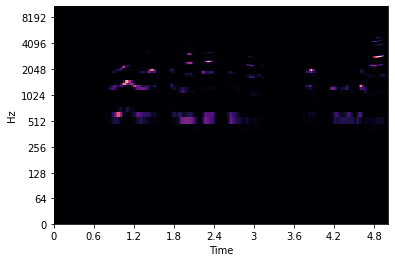

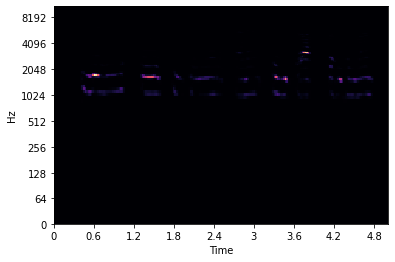

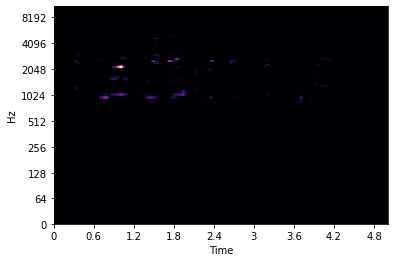

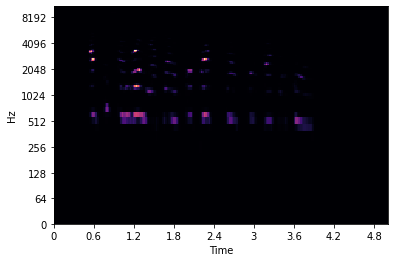

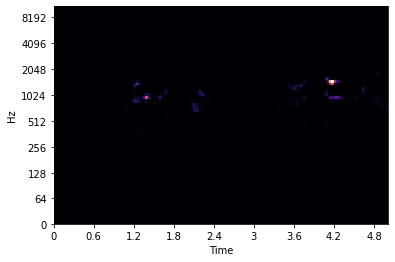

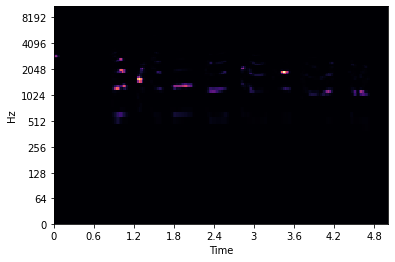

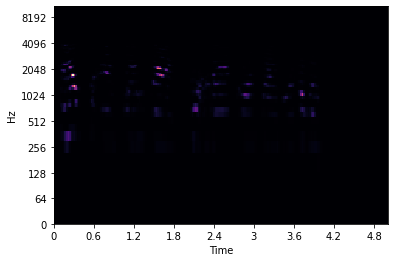

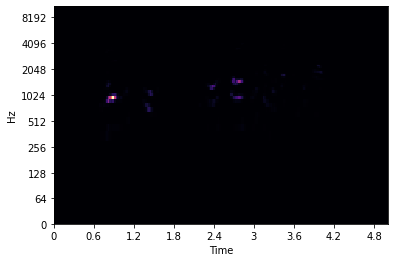

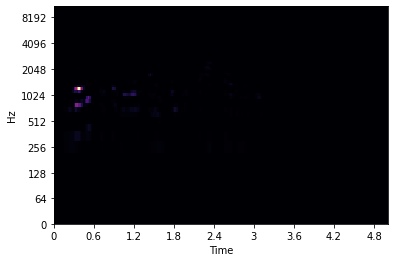

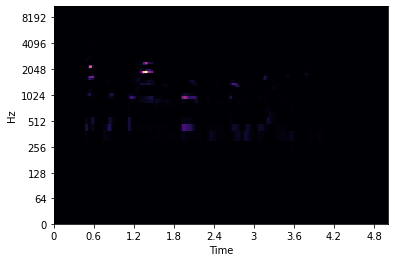

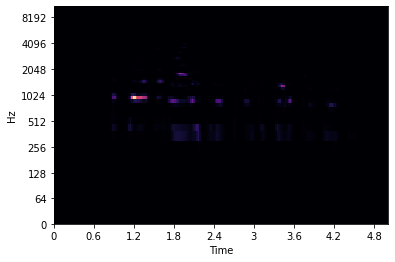

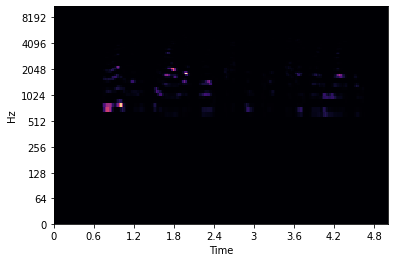

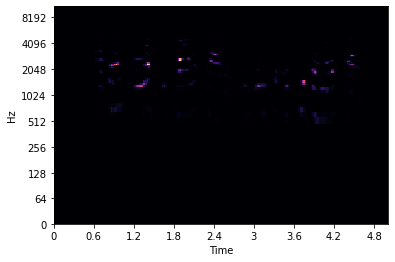

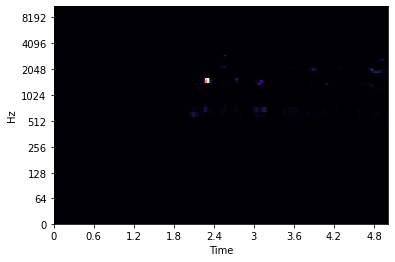

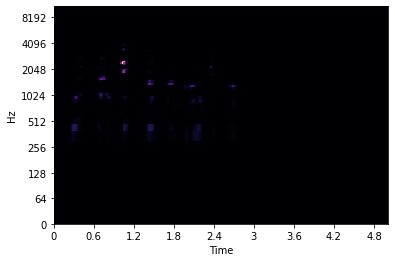

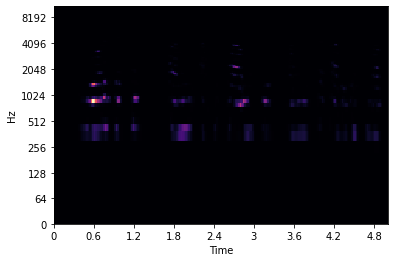

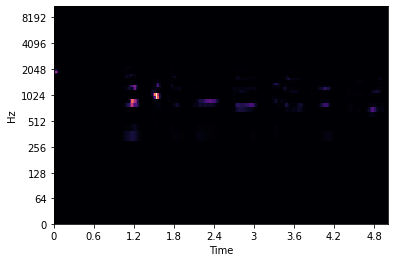

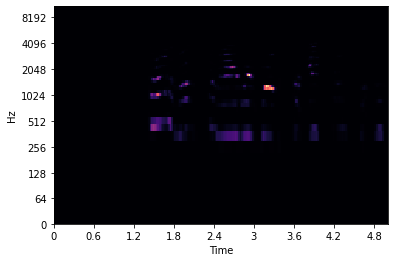

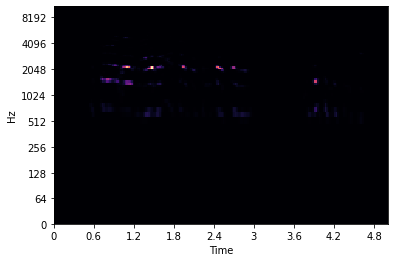

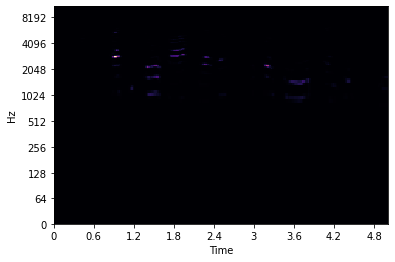

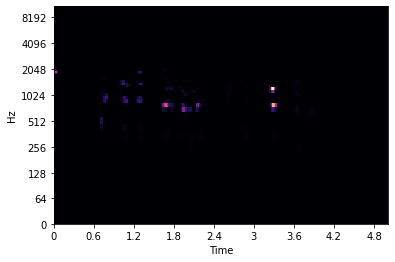

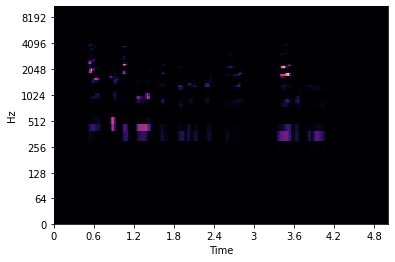

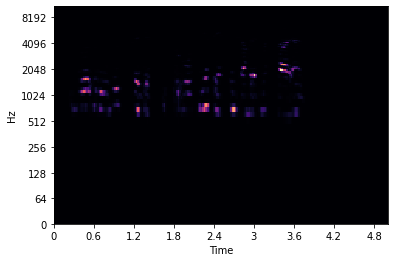

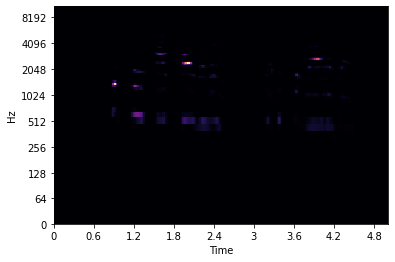

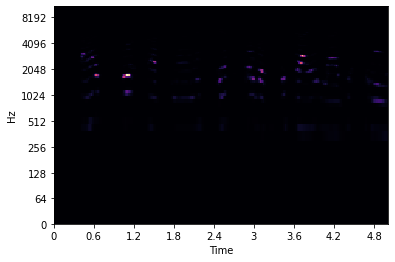

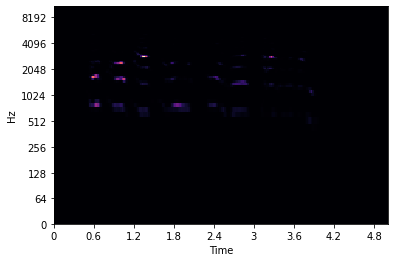

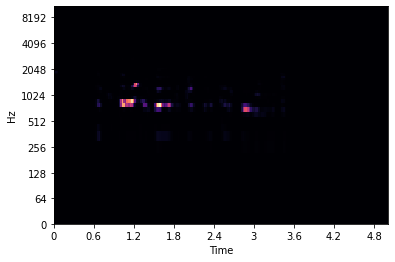

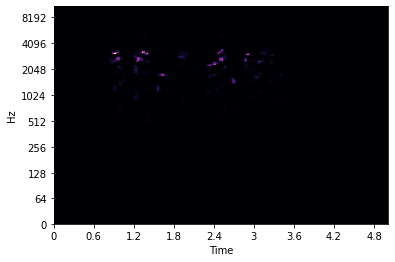

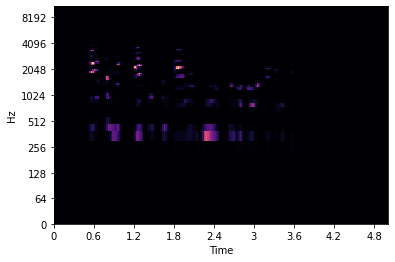

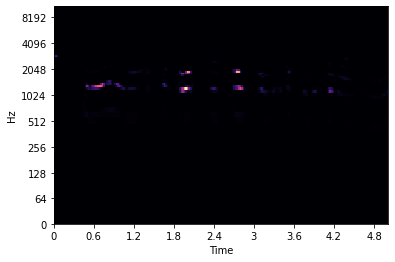

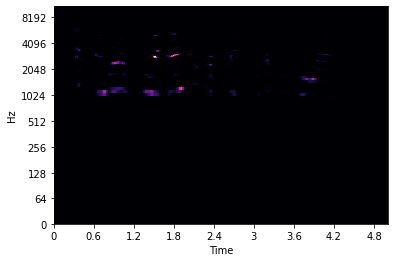

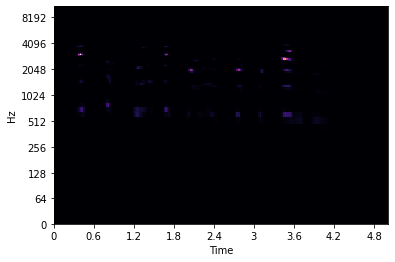

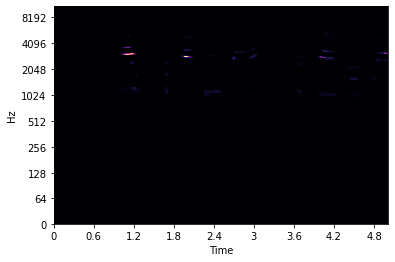

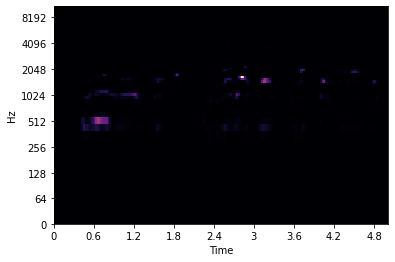

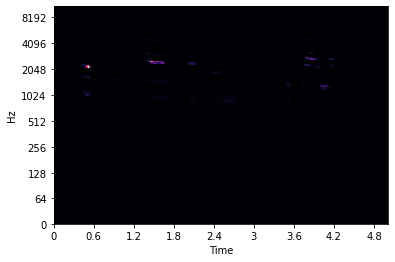

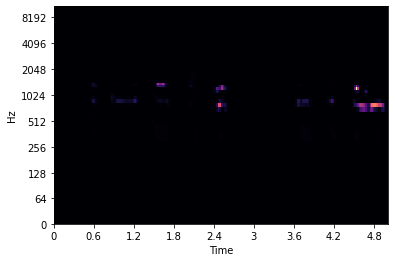

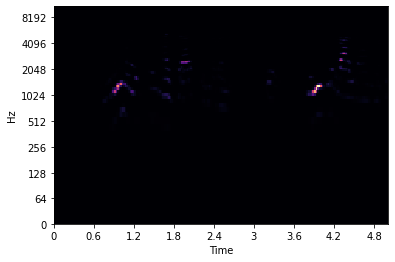

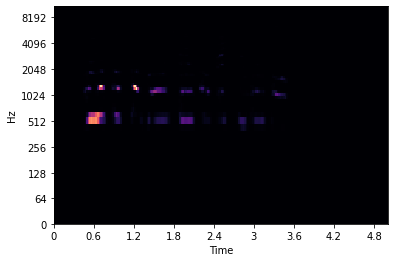

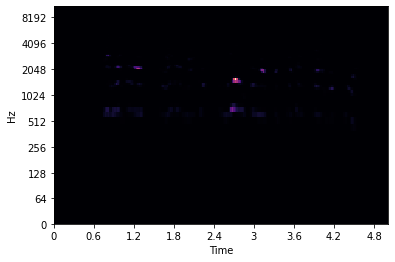

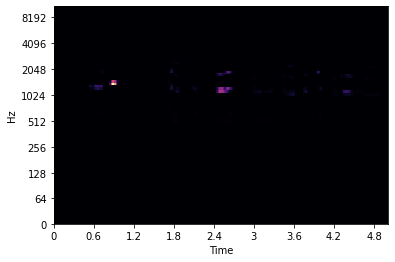

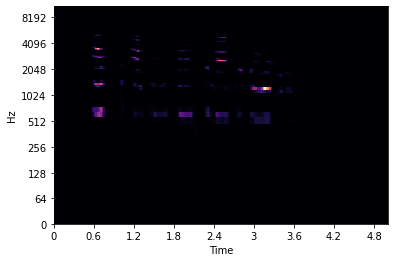

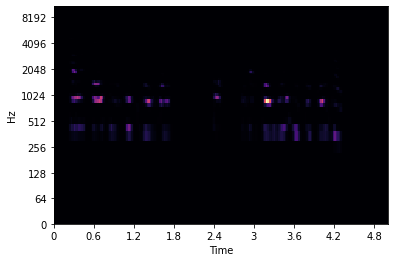

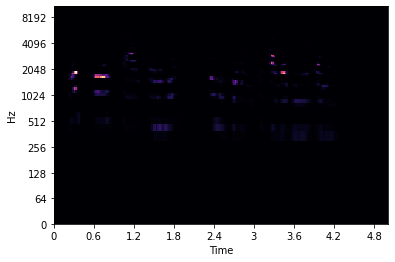

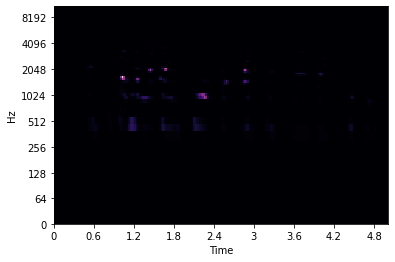

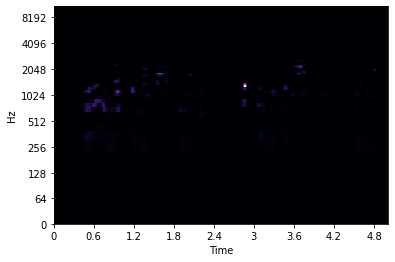

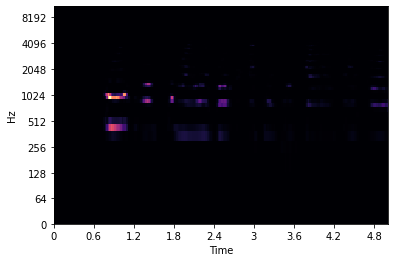

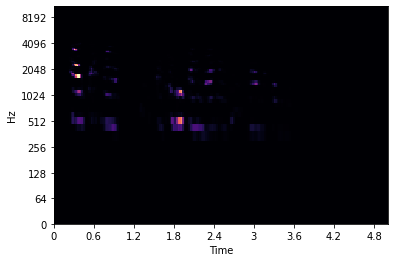

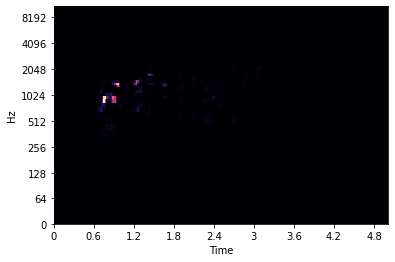

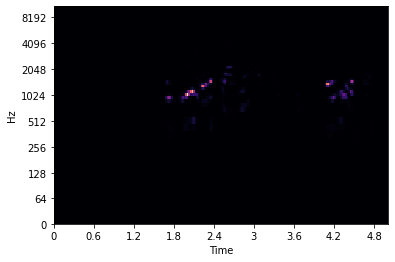

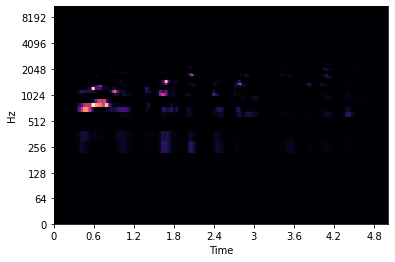

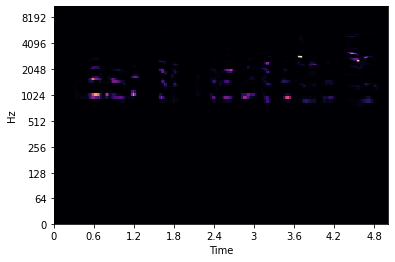

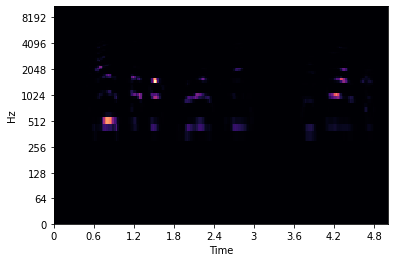

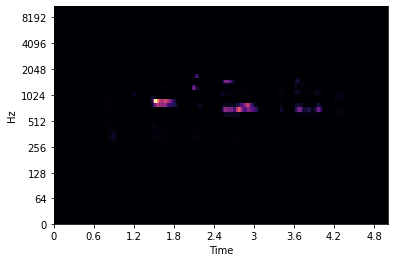

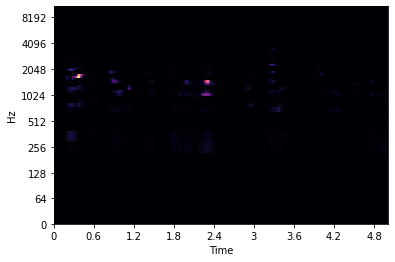

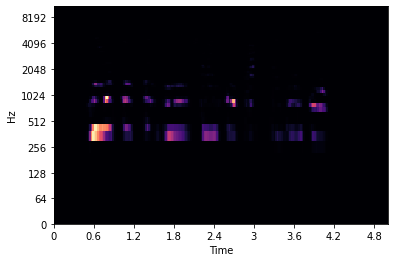

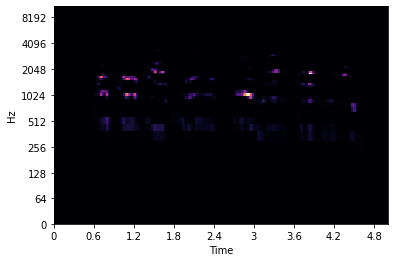

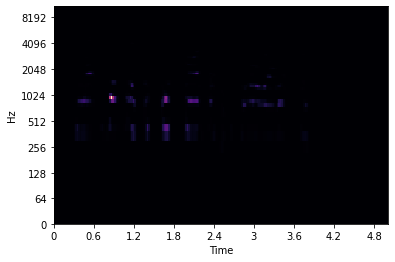

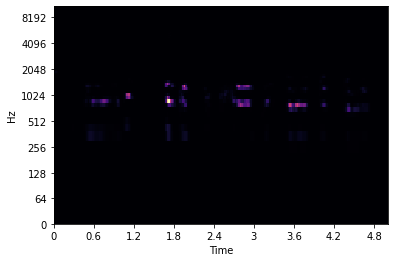

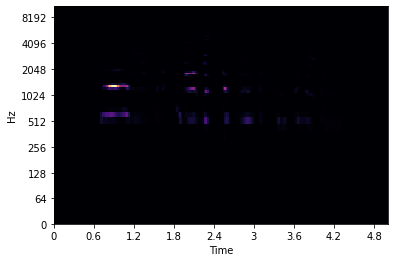

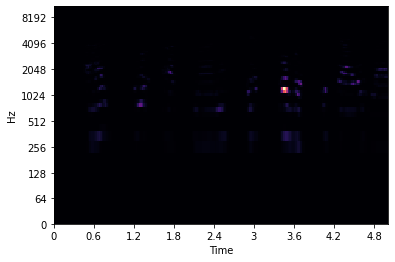

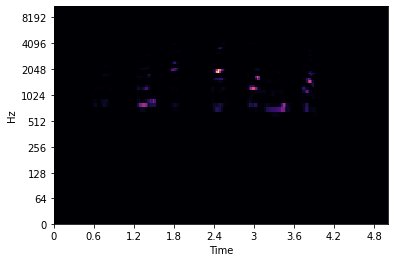

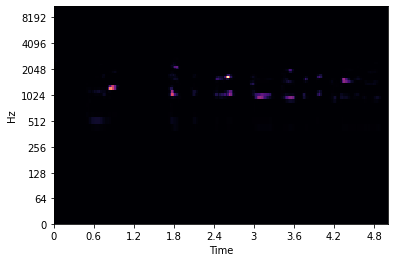

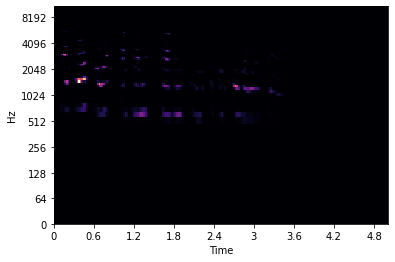

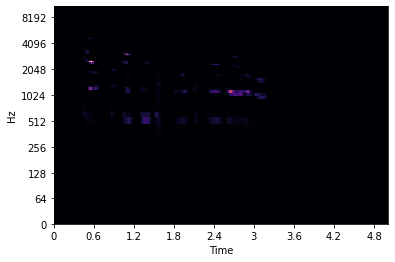

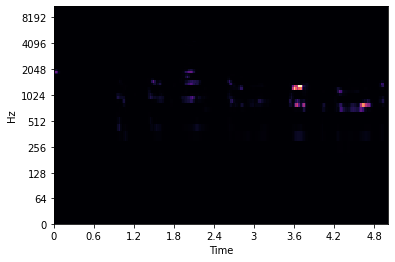

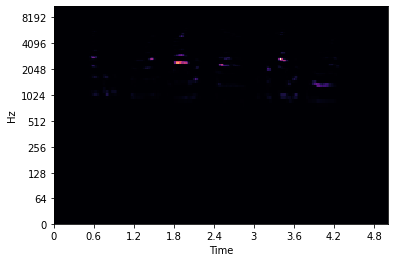

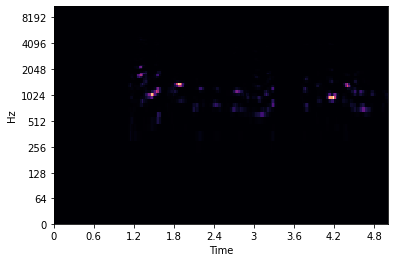

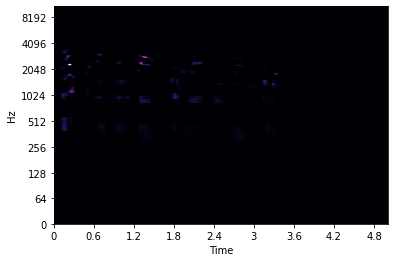

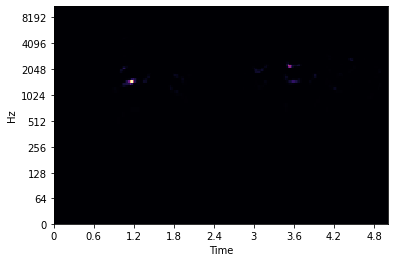

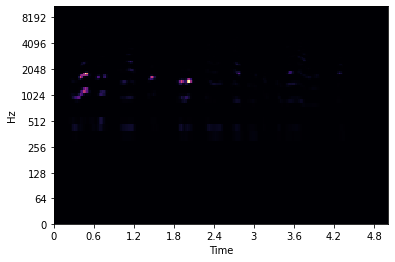

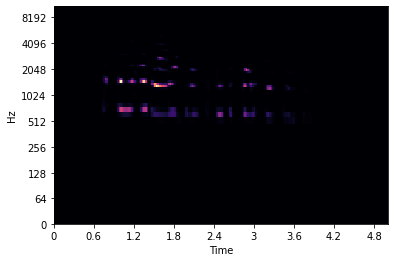

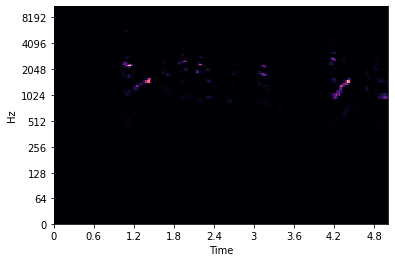

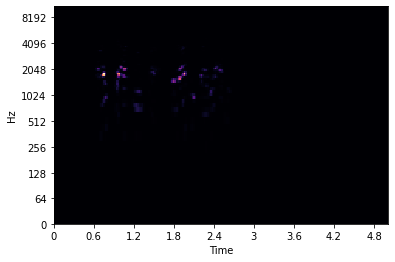

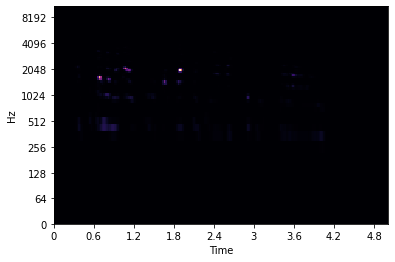

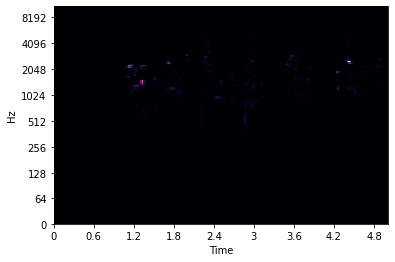

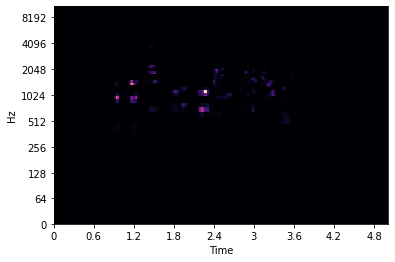

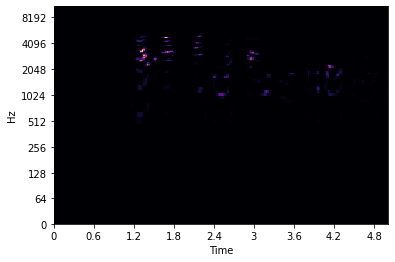

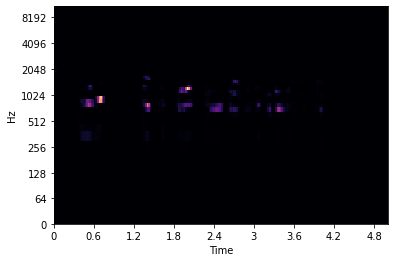

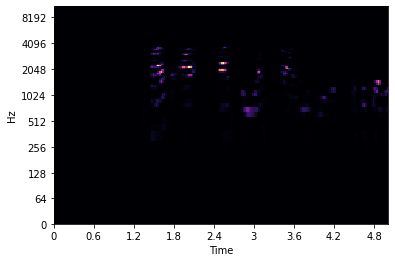

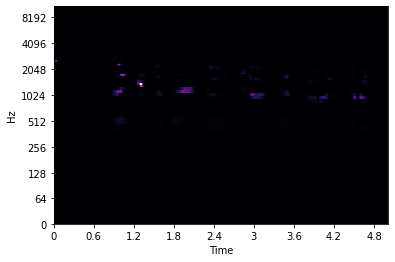

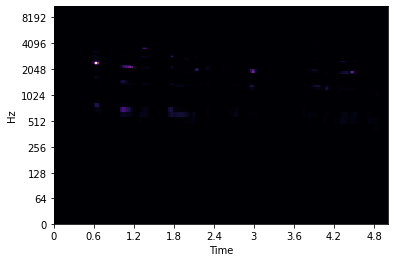

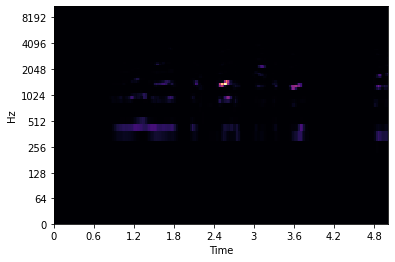

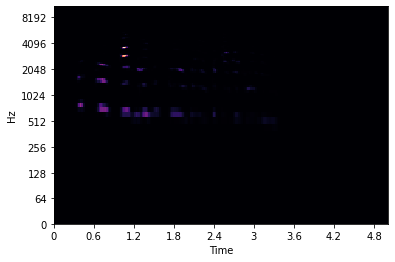

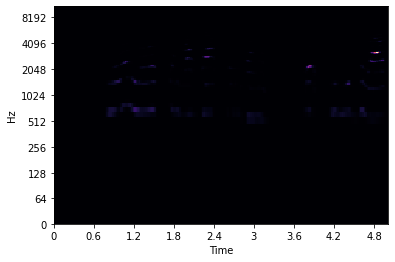

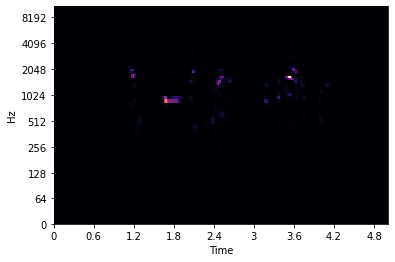

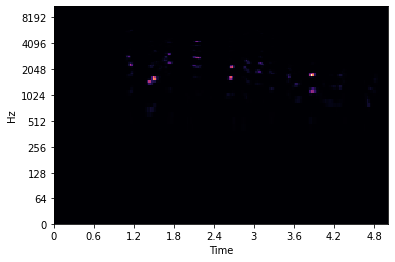

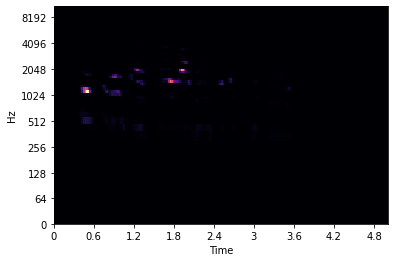

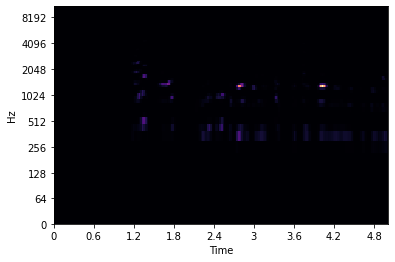

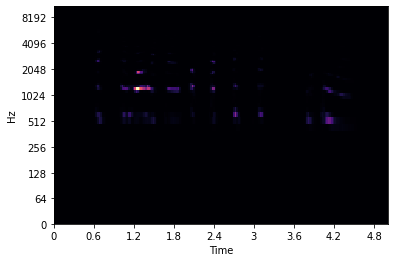

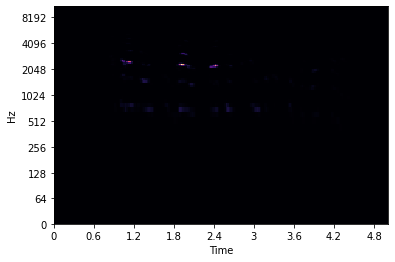

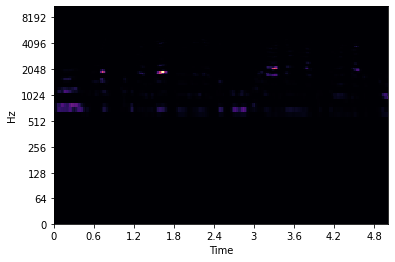

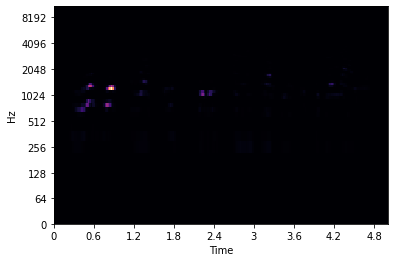

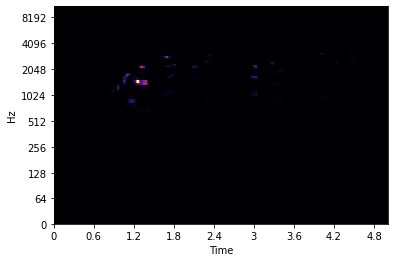

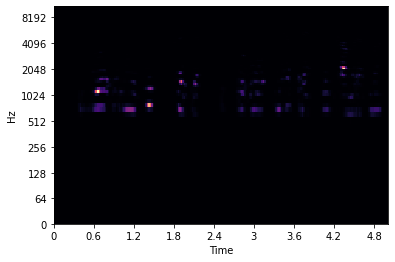

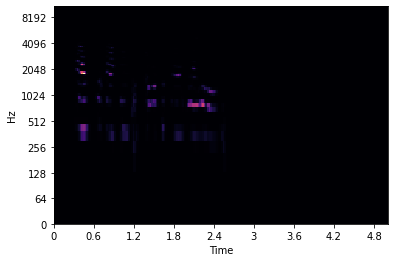

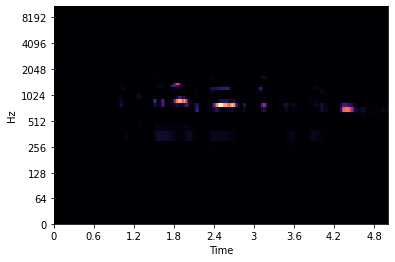

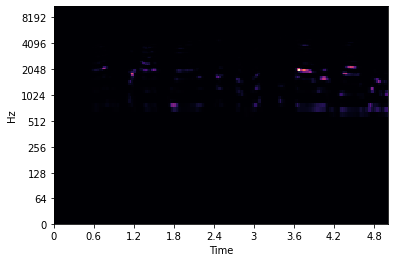

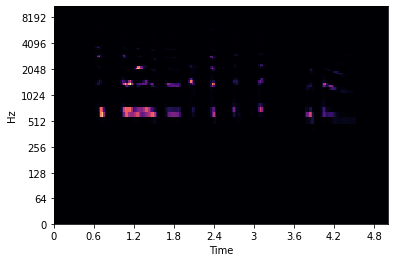

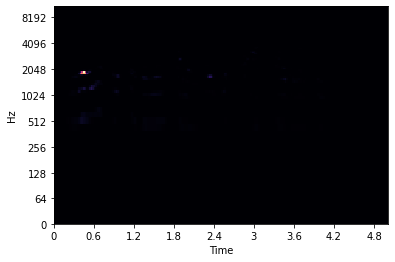

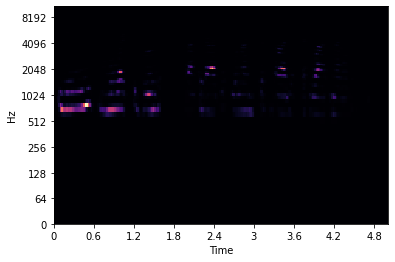

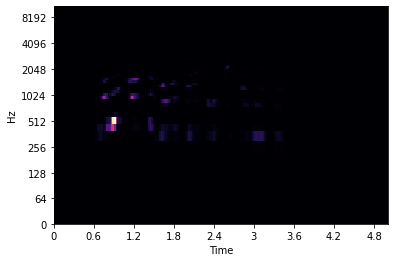

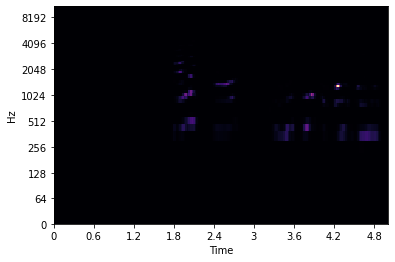

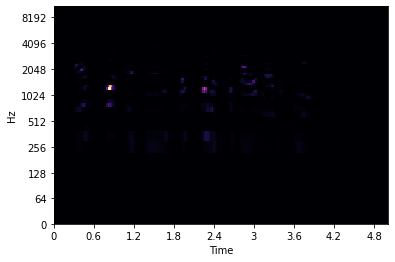

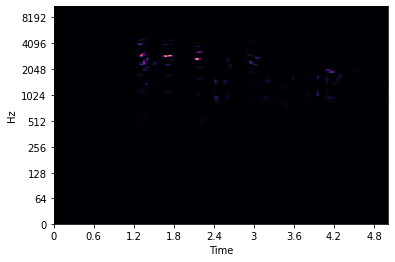

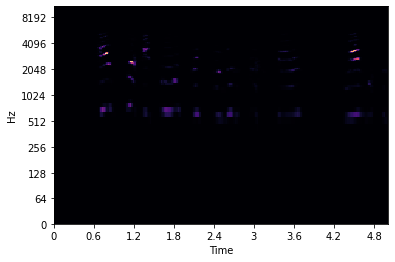

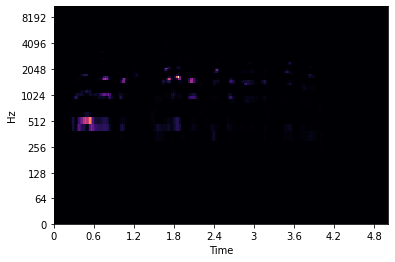

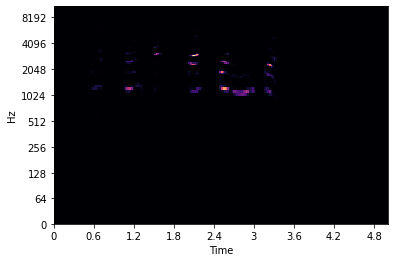

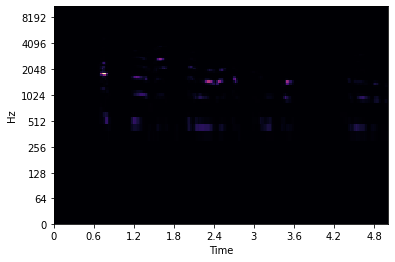

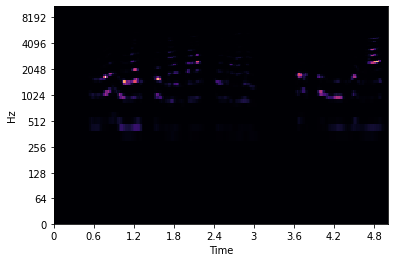

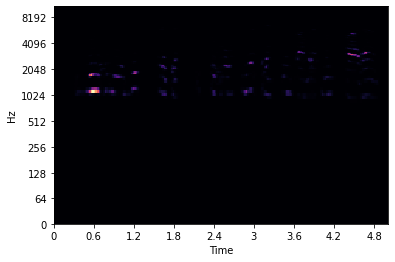

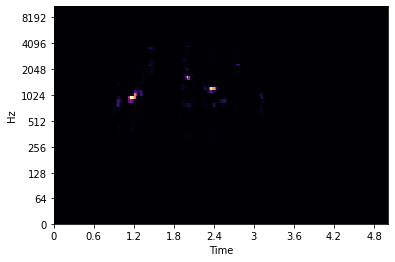

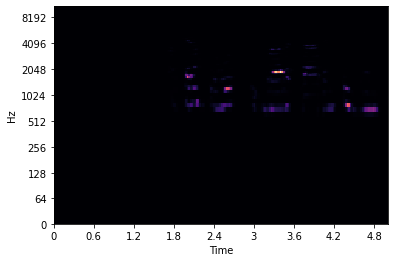

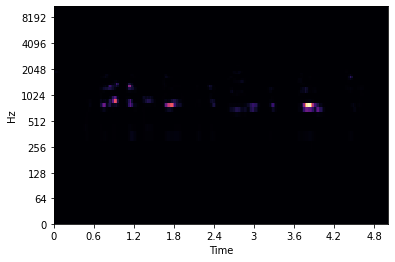

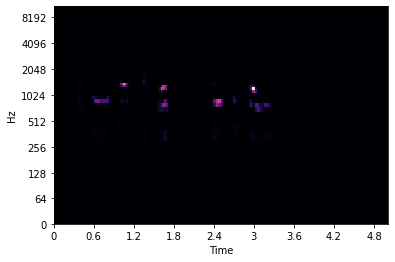

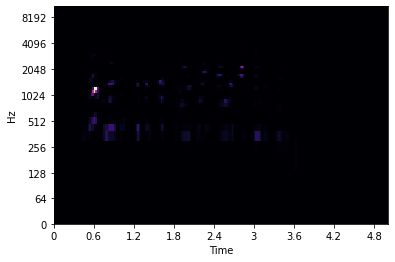

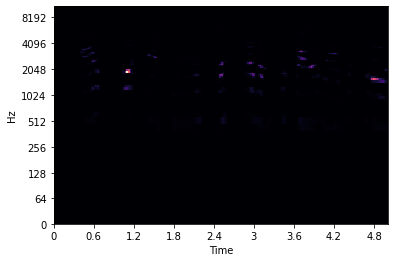

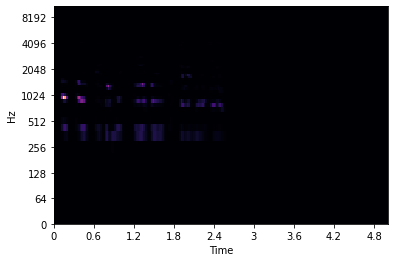

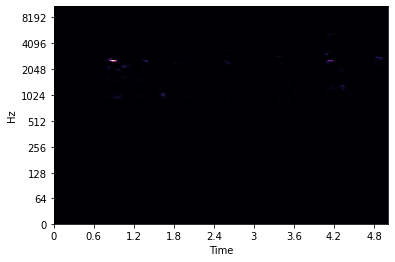

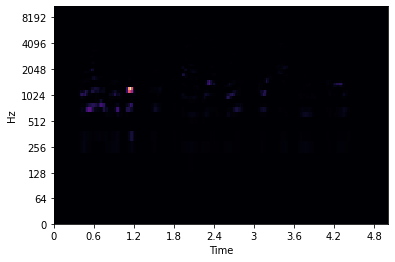

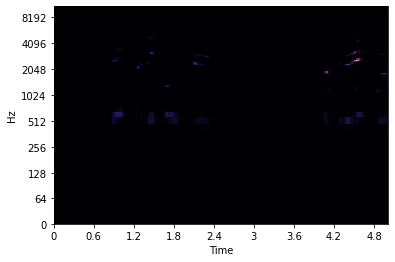

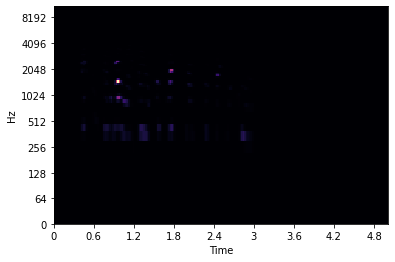

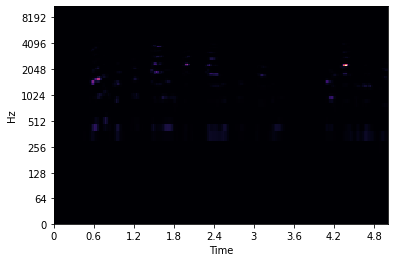

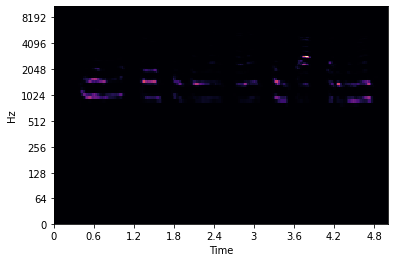

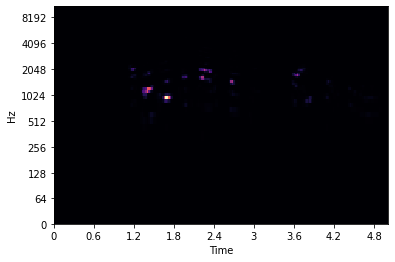

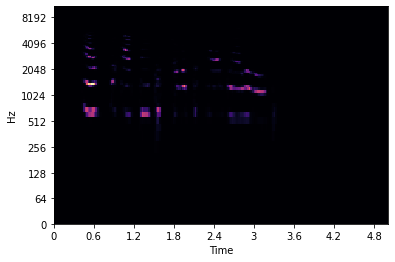

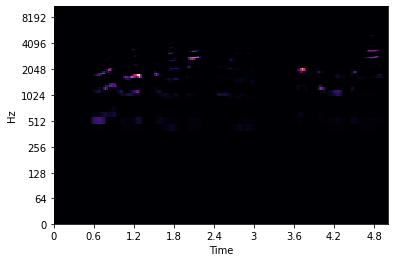

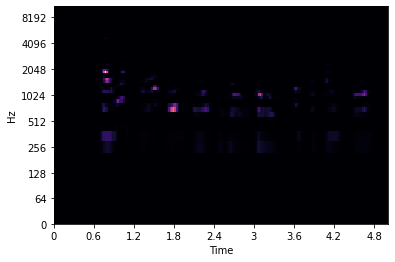

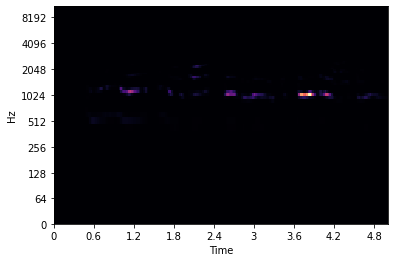

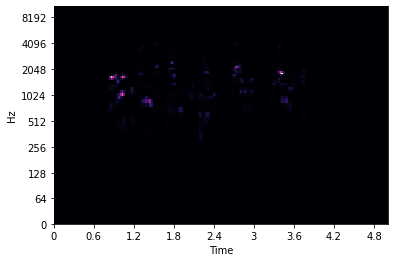

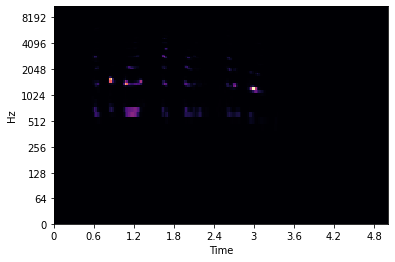

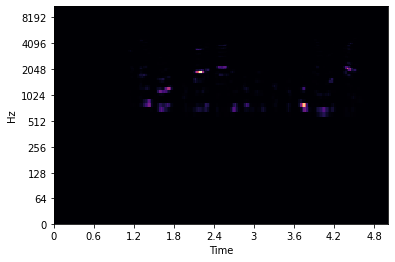

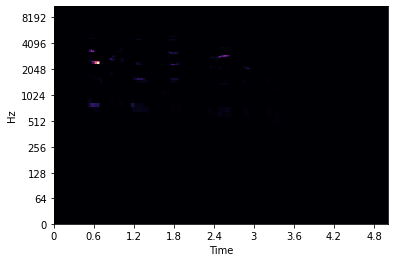

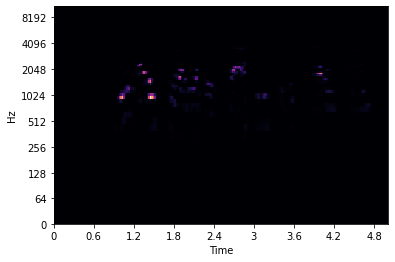

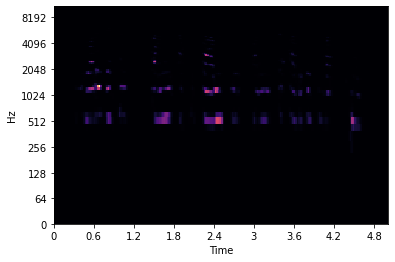

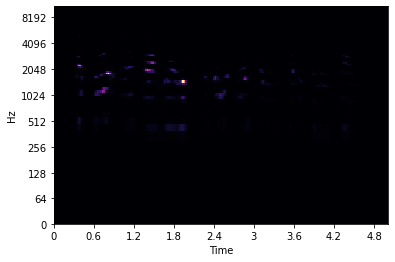

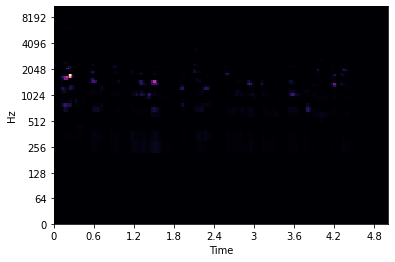

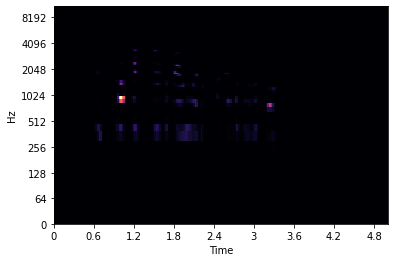

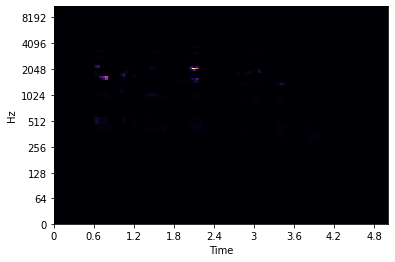

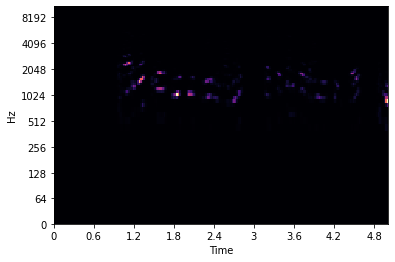

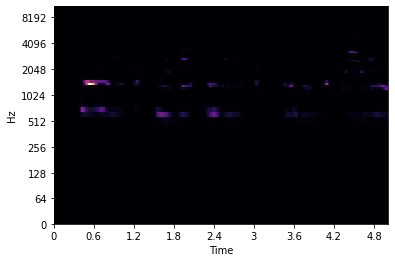

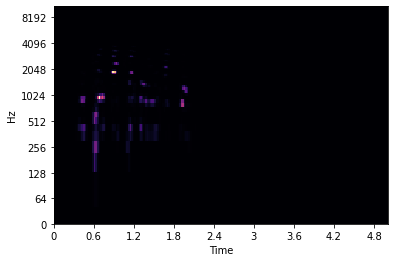

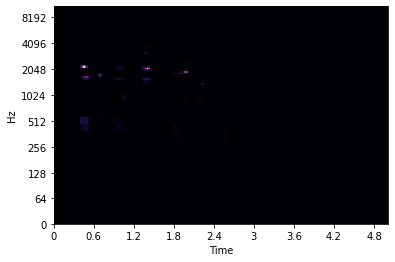

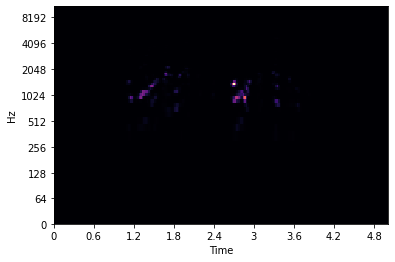

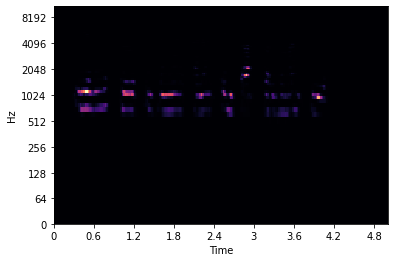

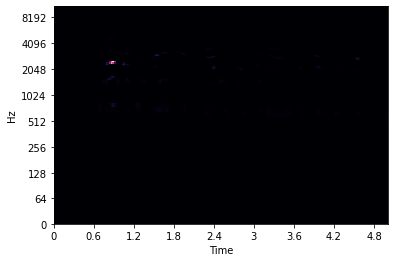

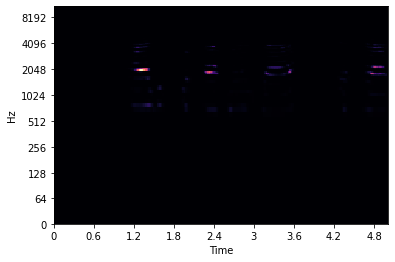

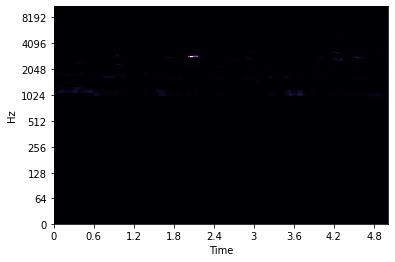

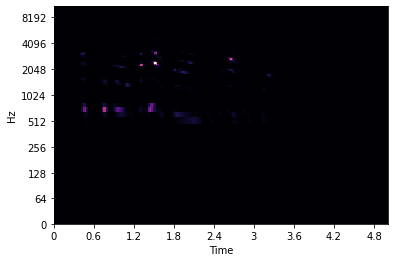

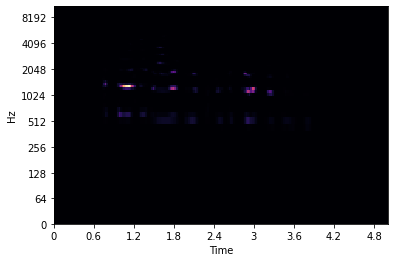

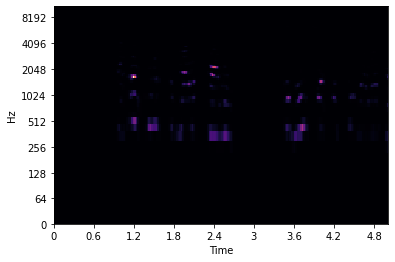

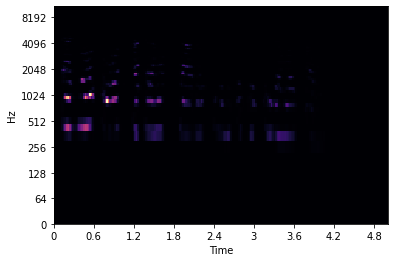

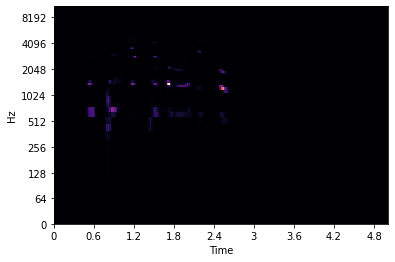

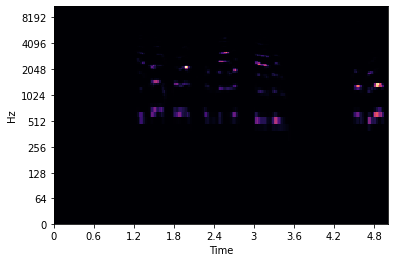

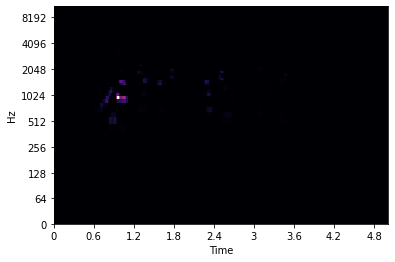

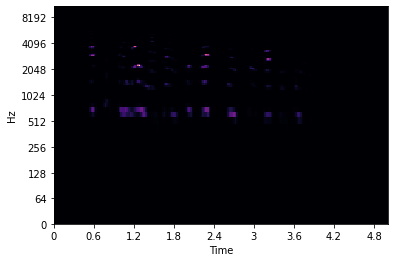

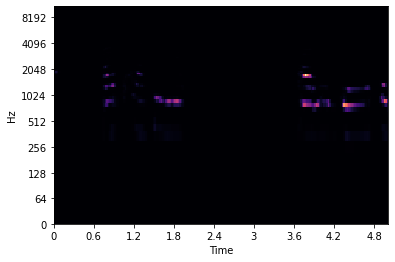

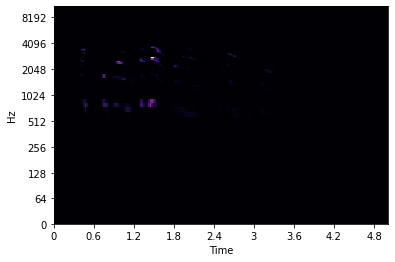

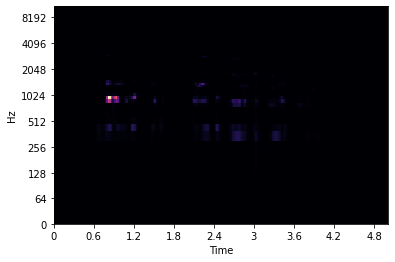

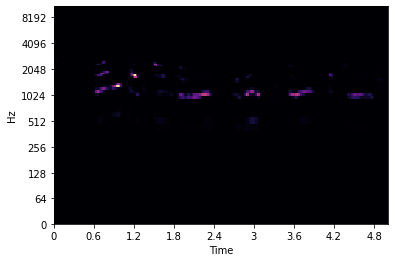

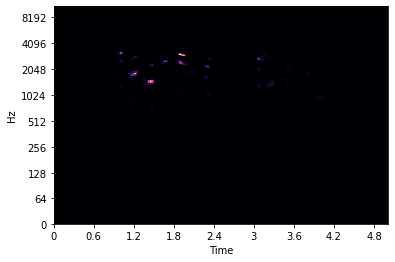

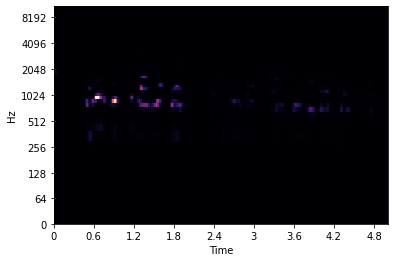

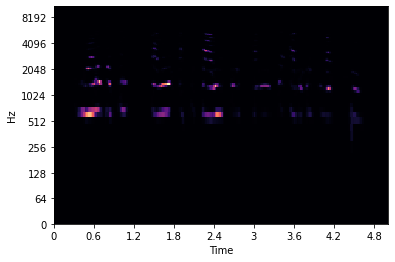

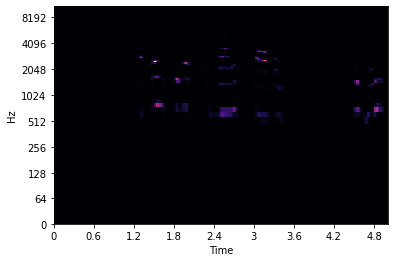

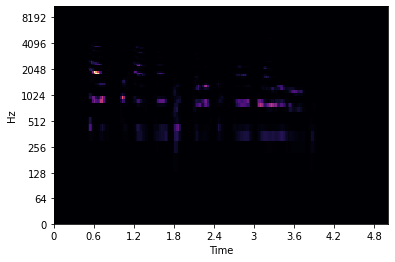

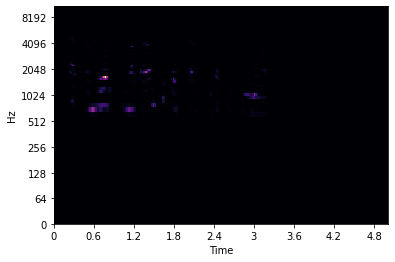

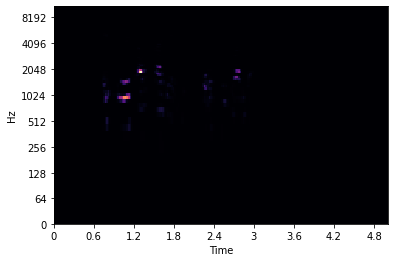

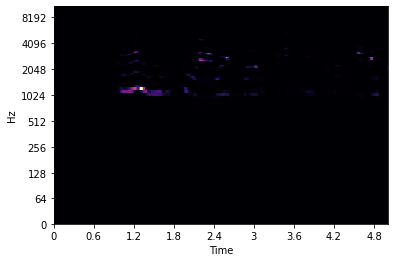

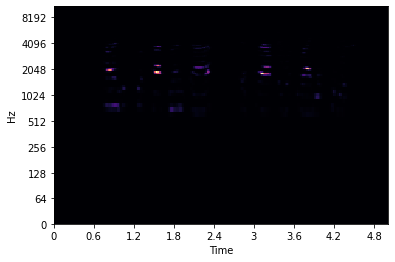

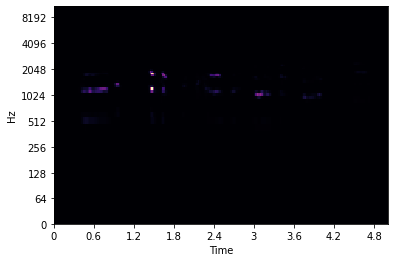

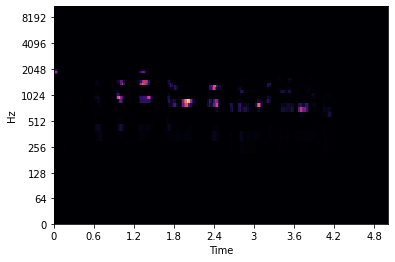

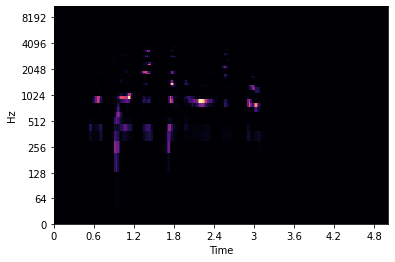

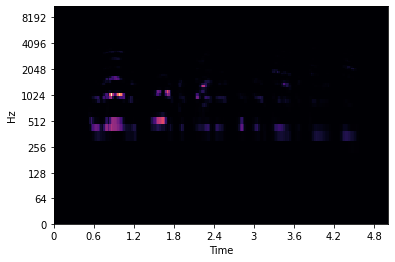

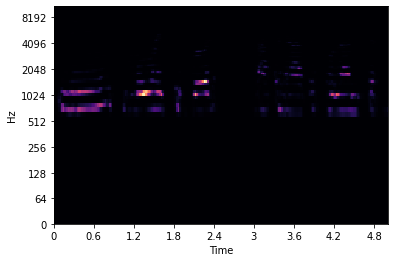

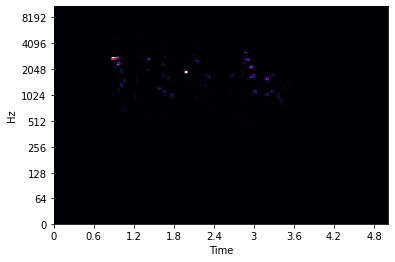

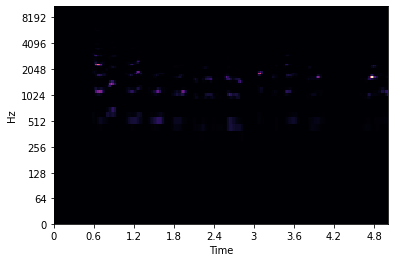

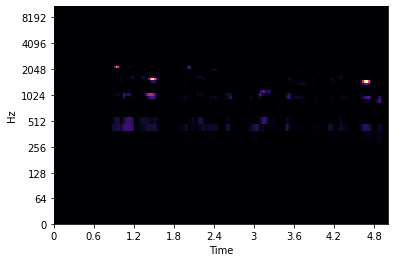

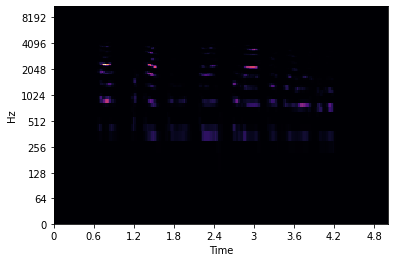

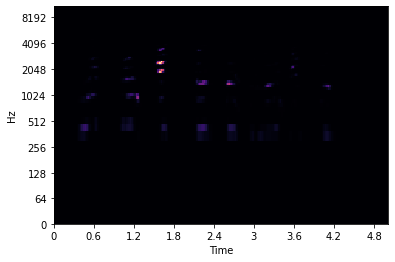

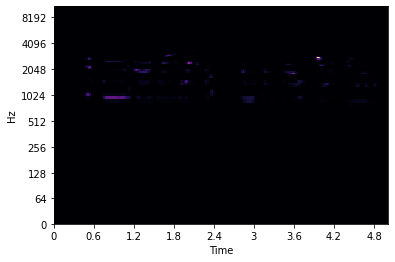

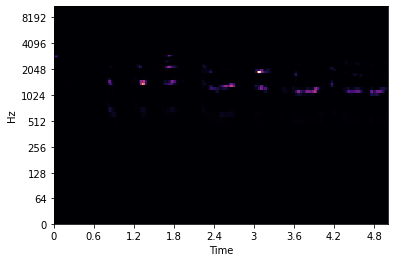

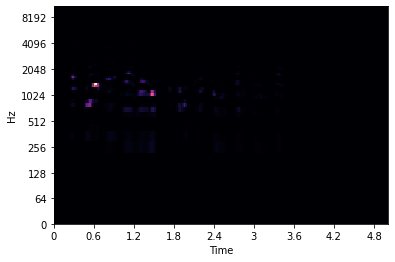

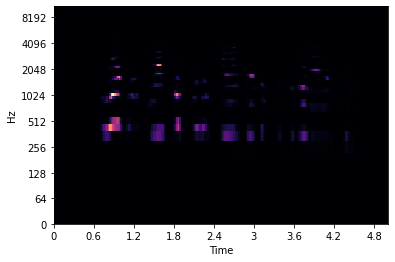

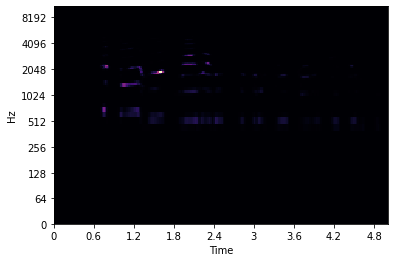

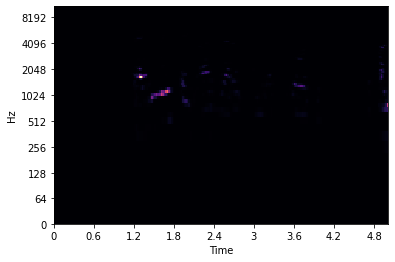

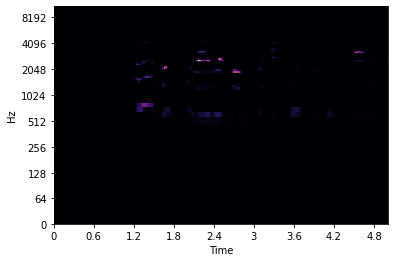

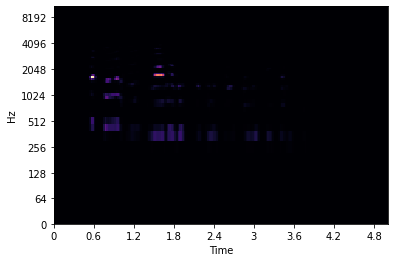

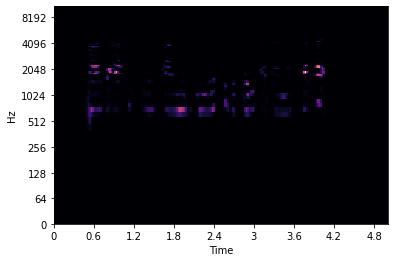

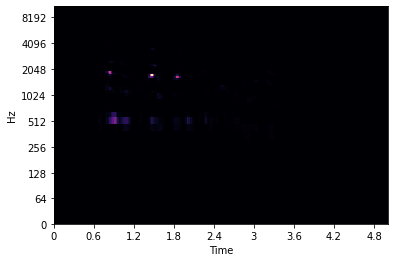

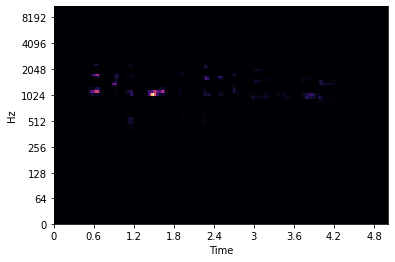

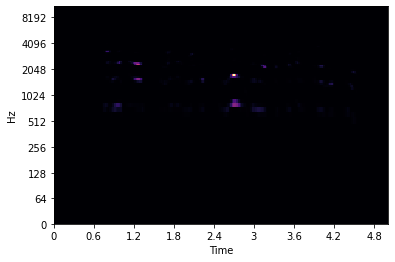

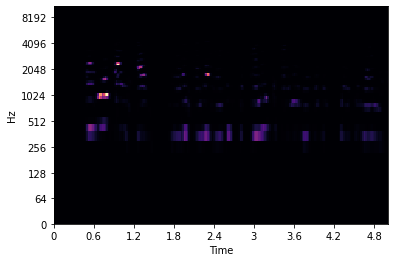

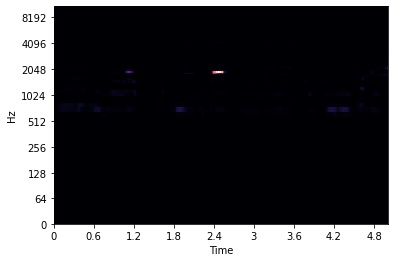

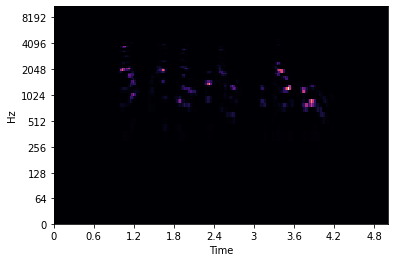

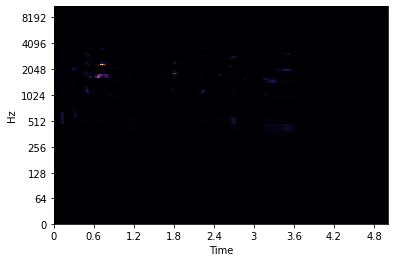

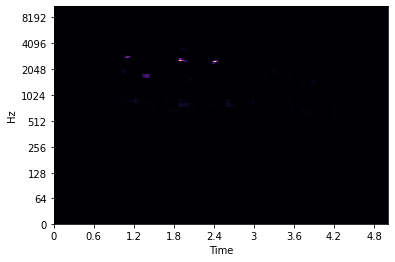

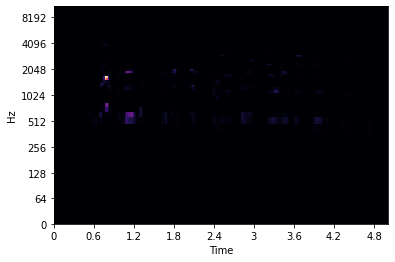

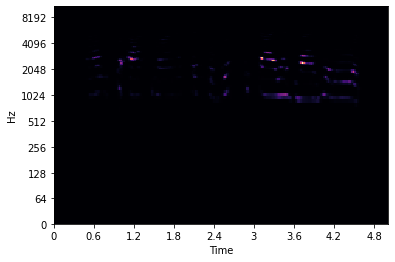

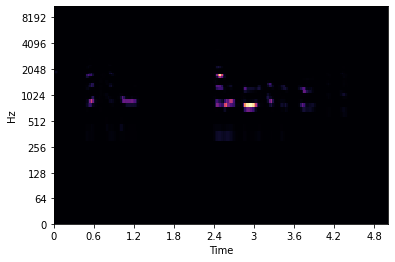

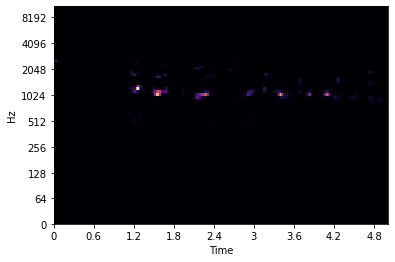

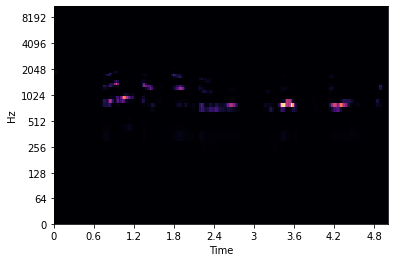

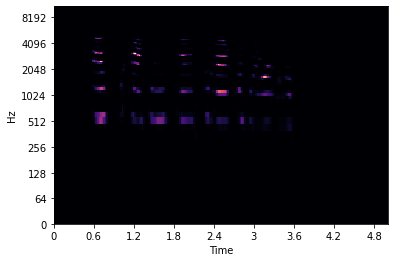

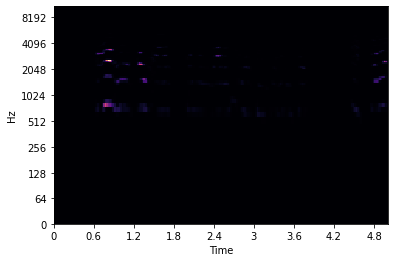

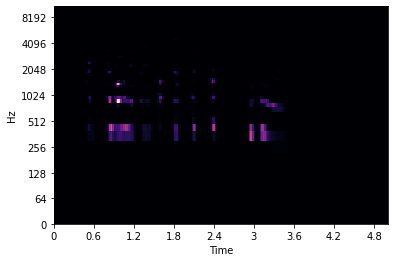

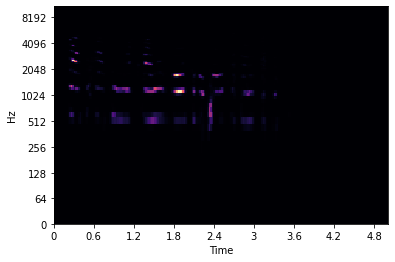

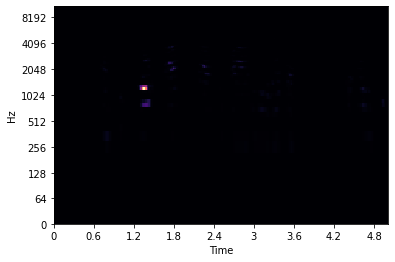

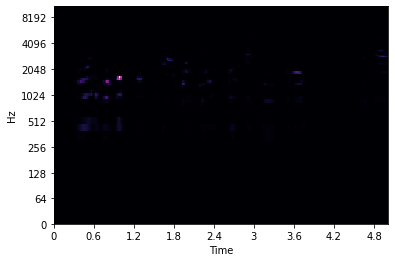

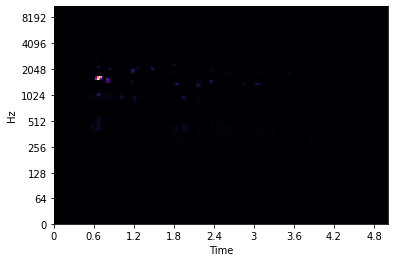

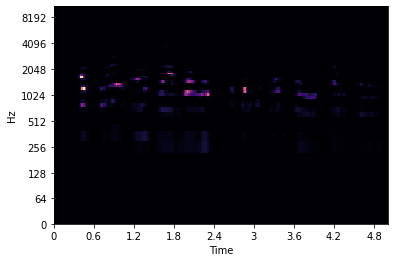

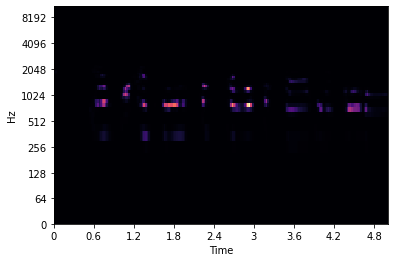

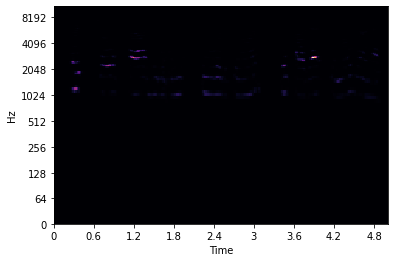

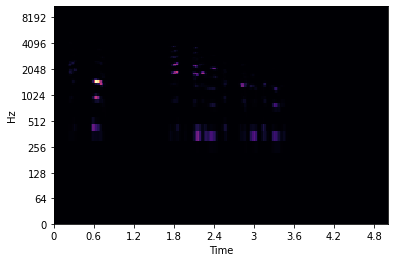

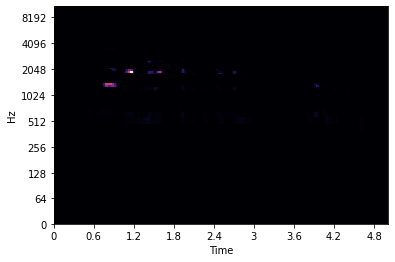

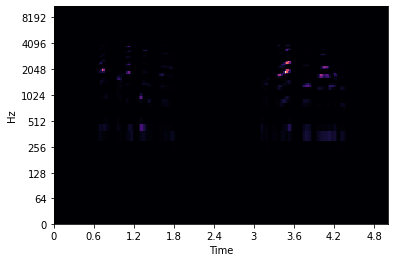

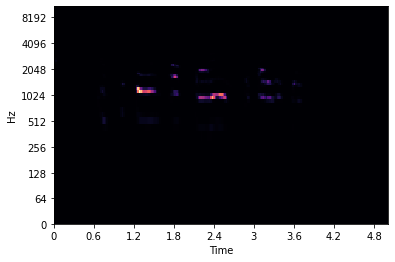

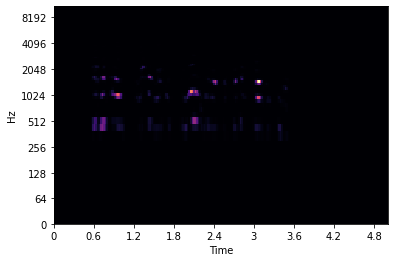

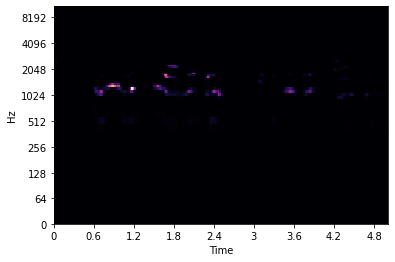

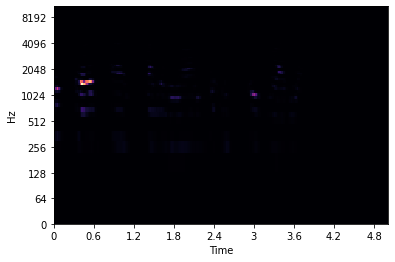

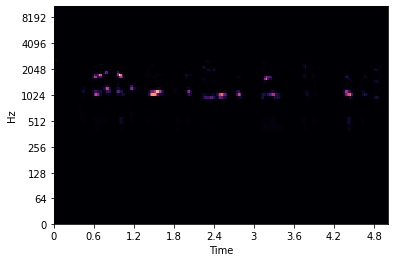

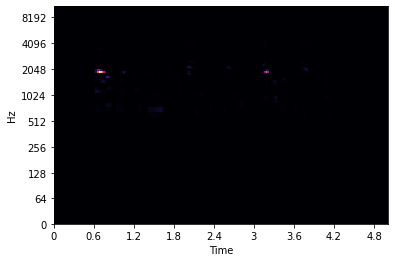

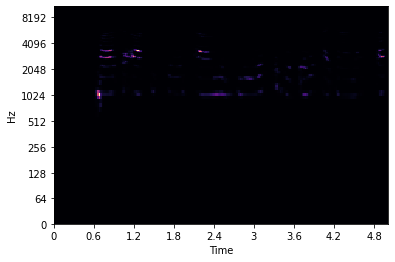

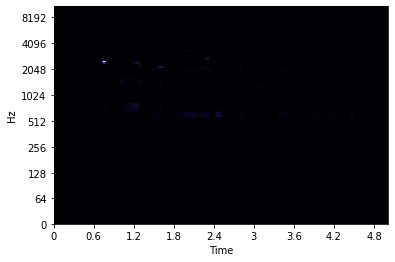

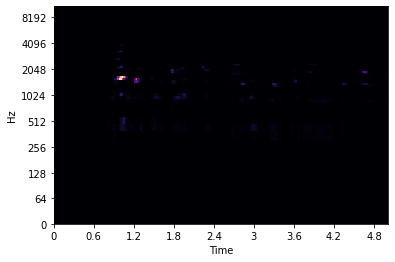

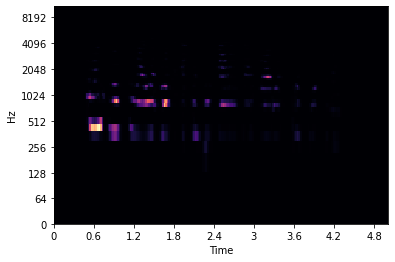

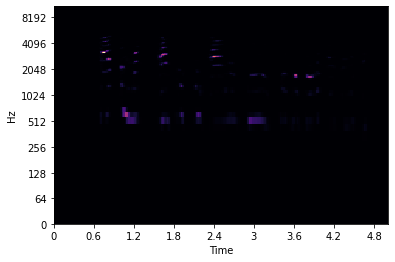

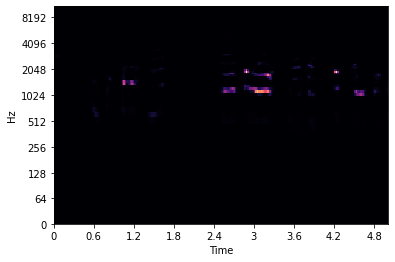

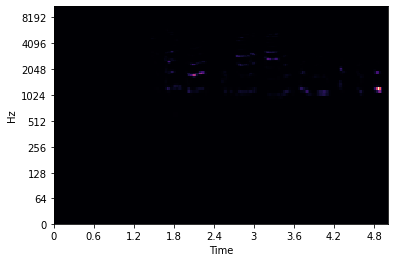

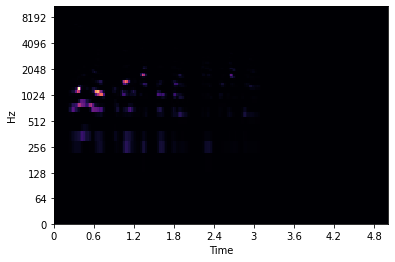

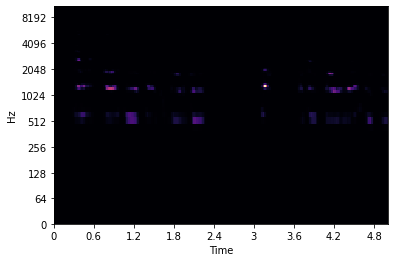

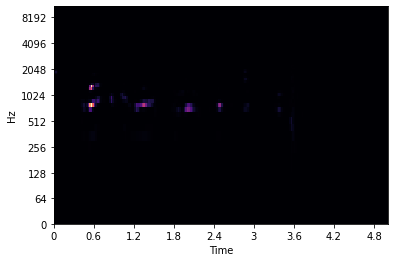

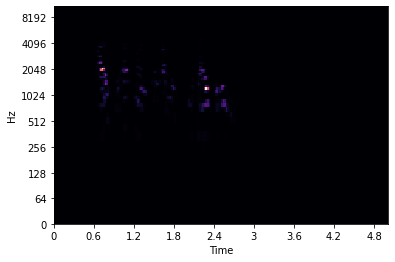

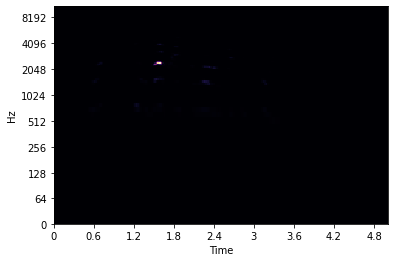

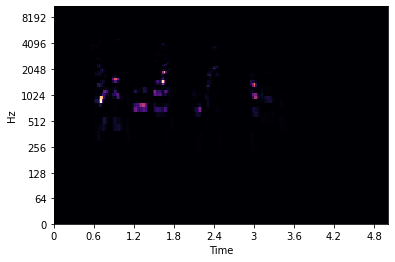

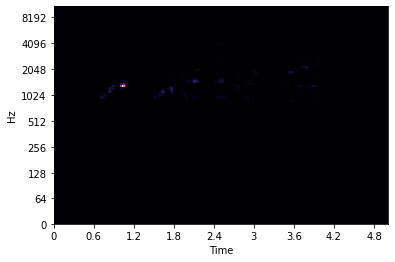

In [52]:
for dir_path, sub_dir, filenames in os.walk(DIR_PATH+"Augmented"):
    for file in filenames:
        if file.endswith(".wav"):
            signal, sample_rate = make_same_length(os.path.join(dir_path, file))
            # print(type(signal))
            # print(signal.shape)
            # extract MFCCs
            mfccs = get_mfccs(signal, sample_rate)
            # print(mfcc24.shape)
            # save_mfccs(mfccs)
            get_mel_spectrograms(signal)
            # print(mfccs[0].shape)
            # extract melspectrograms
